<div style="nosxt-align:cennosr; font-size:26px; color:green;">(II) Bogleheads en acción: cómo aplicar la inversión pasiva en tu día a día</div>

Si no compartimos el conocimiento no sirve para nada. [Michio Kaku](https://www.younuestrobe.com/watch?v=6rDxlolYUQw)

**Descarga de cotizaciones.**  
Para obtener datos históricos de precios, puedes:

Descargarlos directamente desde las gestoras de los fondos.
Utilizar plataformas públicas como Yahoo Finance mediante la librería yfinance.
yfinance es una herramienta popular en análisis financiero que facilita el acceso a datos históricos considerados de dominio público. Sin embargo, estos datos pueden presentar pequeñas diferencias con respecto a las fuentes oficiales. Por ello, para decisiones críticas, siempre se recomienda contrastar la información con la documentación oficial de la gestora.

⚠️ **Precauciones.**
Este proyecto utiliza yfinance (con licencia bajo la [Apache License 2.0](https://www.apache.org/licenses/LICENSE-2.0).
), una interfaz para descargar datos financieros desde Yahoo Finance. Ten en cuenta lo siguiente:

Los datos descargados son exclusivamente para uso personal.
No está permitido redistribuirlos o venderlos.
Su uso en contextos educativos o sin ánimo de lucro suele ser aceptable, siempre que se cumplan estas condiciones.
Evita realizar peticiones excesivas o abusivas que puedan violar los términos de uso del servicio.



In [ ]:
# Monta tu Drive para que Colab acceda a los archivos
from google.colab import drive
drive.mount('/content/drive')

!pip install yfinance

In [ ]:
import os
import pandas as pd
import yfinance as yf

class BogleHeads:
    """
    Clase para gestionar la descarga de datos de fondos de inversión de Vanguard
    usando la librería yfinance.
    """
    def __init__(self, data_directory):
        self.data_directory = data_directory
        os.makedirs(data_directory, exist_ok=True)
        self.fondos_data = {
            'Renta variable': {
                'Vanguard Global Stock Index Fund EUR Acc': {'ISIN': 'IE00B03HD191', 'ticker': '0P00000WLG.F'},
                'Vanguard Global Small-Cap Index Fund EUR Acc': {'ISIN': 'IE00B42W4L06', 'ticker': '0P0000XR9M.F'},
                'Vanguard Global Small-Cap Index Fund EUR Dist': {'ISIN': 'IE00BDCXSH02', 'ticker': '0P0001CXIY.F'},
                'Vanguard Emerging Markets Stock Index Fund EUR Acc': {'ISIN': 'IE0031786142', 'ticker': '0P000060MS.F'}
            },
            'Renta fija': {
                'Vanguard Global Bond Index Fund EUR Hedged Acc': {'ISIN': 'IE00B18GC888', 'ticker': '0P00012I69.F'},
                'Vanguard Global Short-Term Bond Index Fund EUR Hedged Acc': {'ISIN': 'IE00BH65QP47', 'ticker': '0P00012NJH.F'},
                'DWS Euro Ultra Short Fixed': {'ISIN': 'LU0080237943', 'ticker': 'DI4C.F'},
                'MSCI world': {'ISIN': 'MSCI world', 'ticker':'^990100-USD-STRD?'}
            },
            'Fondos monetarios': {
                'Groupama Trèsorerie': {'ISIN': 'FR0000989626', 'ticker': '0P00000LRT.F'},
                'La Française Trésorerie': {'ISIN': 'FR0000991390', 'ticker': '0P00002BDB.F'},
                'AXA Tresorerié': {'ISIN': 'FR0000447823', 'ticker': '0P00000F24.F'}
            },
            'Fondos ultra corto plazo': {
                'DWS Euro Ultra Short Fixed': {'ISIN': 'LU0080237943', 'ticker': 'DI4C.F'},
                'Groupama Ultra Short Term Bond': {'ISIN': 'FR0013346079', 'ticker': '0P0001FSY0.F'},
                'OstrumSRI Credit Ultra Short': {'ISIN': 'FR001400CFA4', 'ticker': '0P0001QKUD.F'},
                'Amundi Ultra Short Term Bond': {'ISIN': 'FR0011365212', 'ticker':'0P0000XPCY.F'},
                'Invesco Euro Ultra Short': {'ISIN': 'LU0102737730', 'ticker':'IUGF.F'}
            },
            'Indices': {
                'MSCI world': {'ISIN': 'MSCI world', 'ticker':'^990100-USD-STRD?'}
            }
        }
        self.dataframes = {}
    def download_fund_data(self, fund_name, fund_info):
        """
        Descarga los datos históricos para un fondo específico.
        """
        ticker = fund_info['ticker']
        isin = fund_info['ISIN']
        print(f'Descargando datos de {fund_name} ({ticker})...')

        try:
            # Descargar los datos, incluyendo 'auto_adjust' para obtener precios ajustados
            df = yf.download(ticker, period='max', auto_adjust=True)

            # Verificar si el DataFrame tiene un MultiIndex en las columnas y corregirlo
            if isinstance(df.columns, pd.MultiIndex):
                df.columns = df.columns.droplevel(1)

            # Asegurarse de que el DataFrame no esté vacío antes de continuar
            if df.empty:
                print(f'Advertencia: No hay datos disponibles para {fund_name} ({ticker}).')
                self.dataframes[isin] = pd.DataFrame()
            else:
                # Seleccionar únicamente la columna 'Close'
                df = df[['Close']]

                # Guardar el DataFrame en un archivo CSV
                csv_path = os.path.join(self.data_directory, f'{isin}.csv')
                df.to_csv(csv_path)
                print(f'Guardado en {csv_path}')

                # Almacenar el DataFrame en el diccionario de la clase
                self.dataframes[isin] = df

        except Exception as e:
            print(f'Error al descargar los datos de {fund_name} ({ticker}): {e}')
            self.dataframes[isin] = pd.DataFrame() # Guarda un DataFrame vacío en caso de error

    def download_all(self):
        """
        Itera sobre todos los fondos definidos y descarga sus datos.
        """
        for categoria, fondos in self.fondos_data.items():
            print(f'\n--- Categoría: {categoria} ---')
            for fund_name, fund_info in fondos.items():
                self.download_fund_data(fund_name, fund_info)

# --- Ejemplo de uso ---

if __name__ == '__main__':
    # Define la ruta del directorio
    data_directory = './Datos/Ficheros_bogleheads'

    # Crea una instancia de la clase
    manager = BogleHeads(data_directory)

    # Llama al método para descargar todos los datos
    manager.download_all()

    # Ahora, el diccionario 'dataframes' estará lleno
    #print('\nContenido del diccionario de DataFrames:')
    #print(manager.dataframes)


--- Categoría: Renta variable ---
Descargando datos de Vanguard Global Stock Index Fund EUR Acc (0P00000WLG.F)...


[*********************100%***********************]  1 of 1 completed


Guardado en ./Datos/Ficheros_bogleheads/IE00B03HD191.csv
Descargando datos de Vanguard Global Small-Cap Index Fund EUR Acc (0P0000XR9M.F)...


[*********************100%***********************]  1 of 1 completed


Guardado en ./Datos/Ficheros_bogleheads/IE00B42W4L06.csv
Descargando datos de Vanguard Global Small-Cap Index Fund EUR Dist (0P0001CXIY.F)...


[*********************100%***********************]  1 of 1 completed


Guardado en ./Datos/Ficheros_bogleheads/IE00BDCXSH02.csv
Descargando datos de Vanguard Emerging Markets Stock Index Fund EUR Acc (0P000060MS.F)...


[*********************100%***********************]  1 of 1 completed


Guardado en ./Datos/Ficheros_bogleheads/IE0031786142.csv

--- Categoría: Renta fija ---
Descargando datos de Vanguard Global Bond Index Fund EUR Hedged Acc (0P00012I69.F)...


[*********************100%***********************]  1 of 1 completed


Guardado en ./Datos/Ficheros_bogleheads/IE00B18GC888.csv
Descargando datos de Vanguard Global Short-Term Bond Index Fund EUR Hedged Acc (0P00012NJH.F)...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DI4C.F']: YFInvalidPeriodError("DI4C.F: Period 'max' is invalid, must be one of: 1d, 5d")


Guardado en ./Datos/Ficheros_bogleheads/IE00BH65QP47.csv
Descargando datos de DWS Euro Ultra Short Fixed (DI4C.F)...
Advertencia: No hay datos disponibles para DWS Euro Ultra Short Fixed (DI4C.F).
Descargando datos de MSCI world (^990100-USD-STRD?)...


[*********************100%***********************]  1 of 1 completed


Guardado en ./Datos/Ficheros_bogleheads/MSCI world.csv

--- Categoría: Fondos monetarios ---
Descargando datos de Groupama Trèsorerie (0P00000LRT.F)...


[*********************100%***********************]  1 of 1 completed


Guardado en ./Datos/Ficheros_bogleheads/FR0000989626.csv
Descargando datos de La Française Trésorerie (0P00002BDB.F)...


[*********************100%***********************]  1 of 1 completed


Guardado en ./Datos/Ficheros_bogleheads/FR0000991390.csv
Descargando datos de AXA Tresorerié (0P00000F24.F)...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DI4C.F']: YFInvalidPeriodError("DI4C.F: Period 'max' is invalid, must be one of: 1d, 5d")


Guardado en ./Datos/Ficheros_bogleheads/FR0000447823.csv

--- Categoría: Fondos ultra corto plazo ---
Descargando datos de DWS Euro Ultra Short Fixed (DI4C.F)...
Advertencia: No hay datos disponibles para DWS Euro Ultra Short Fixed (DI4C.F).
Descargando datos de Groupama Ultra Short Term Bond (0P0001FSY0.F)...


[*********************100%***********************]  1 of 1 completed


Guardado en ./Datos/Ficheros_bogleheads/FR0013346079.csv
Descargando datos de OstrumSRI Credit Ultra Short (0P0001QKUD.F)...


[*********************100%***********************]  1 of 1 completed


Guardado en ./Datos/Ficheros_bogleheads/FR001400CFA4.csv
Descargando datos de Amundi Ultra Short Term Bond (0P0000XPCY.F)...


[*********************100%***********************]  1 of 1 completed


Guardado en ./Datos/Ficheros_bogleheads/FR0011365212.csv
Descargando datos de Invesco Euro Ultra Short (IUGF.F)...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['IUGF.F']: YFInvalidPeriodError("IUGF.F: Period 'max' is invalid, must be one of: 1d, 5d")


Advertencia: No hay datos disponibles para Invesco Euro Ultra Short (IUGF.F).

--- Categoría: Indices ---
Descargando datos de MSCI world (^990100-USD-STRD?)...


[*********************100%***********************]  1 of 1 completed

Guardado en ./Datos/Ficheros_bogleheads/MSCI world.csv


In [ ]:
# Extraer todos los ISIN del diccionario
isin_list = []

for categoria in manager.fondos_data.values():
    for fondo in categoria.values():
        isin = fondo.get('ISIN')
        if isin and isin != 'MSCI world':  # Filtramos valores no válidos
            isin_list.append(isin)

print(isin_list)


['IE00B03HD191', 'IE00B42W4L06', 'IE00BDCXSH02', 'IE0031786142', 'IE00B18GC888', 'IE00BH65QP47', 'LU0080237943', 'FR0000989626', 'FR0000991390', 'FR0000447823', 'LU0080237943', 'FR0013346079', 'FR001400CFA4', 'FR0011365212', 'LU0102737730']


# Estrategia Bogleheads.  


## Crear DataFrames para la estrategia.
Importa cotizaciones de los ficheros CSV que seleccionemos.
Desde Yahoo Finance se descargan cotizaciones históricas desde el 2018-01-02.
Para estas simulaciones seleccionamos el rango de fechas 2018-01-02 a 2025-09-04, utilizando datos históricos descargados de las gestoras.

Para las simulaciones que vamos a realizar comformamos carteras con cotizaciones de los fondos siguientes.  

Renta variable.  

- Vanguard Global Stock Index Fund EUR Acc (IE00B03HD191).  Ticker en Yahoo Finances (0P00000WLG.F)
- Vanguard Global Small-Cap Index Fund EUR Acc (IE00B42W4L06).  Ticker en Yahoo Finances (0P0000XR9M.F)
- Vanguard Global Small-Cap Index Fund EUR Dist (IE00BDCXSH02). Ticker en Yahoo Finances (0P0001CXIY.F)
- Vanguard Emerging Markets Stock Index Fund EUR Acc (IE0031786142).  Ticker en Yahoo Finances (0P000060MS.F)

Renta fija.  

- Vanguard Global Bond Index Fund EUR Hedged Acc (IE00B18GC888). Ticker en Yahoo Finances (0P00012I69.F)    
- Vanguard Global Short-Term Bond Index Fund EUR Hedged Acc (IE00BH65QP47).  Ticker en Yahoo Finances  (0P00012NJH.F)
- DWS Euro Ultra Short Fixed (LU0080237943).  Ticker en Yahoo Finances (DI4C.F)
- Vanguard Global Short-Term Bond Index Fund EUR Hedged Acc (IE00BH65QP47). Ticker en Yahoo Finances(0P00012NJH.F)

In [ ]:
import pandas as pd
import os
import csv

from typing import List
from datetime import datetime

class GestorImportaciones:
    def __init__(self, ruta_base):
        self.ruta_base = ruta_base
        self.dataframes = {}
        self.nombres_importados = []
        self.df_dict = {}
        self.fecha_inicio = None
        self.fecha_fin = None

    def solicitar_rango_fechas(self):
        """Solicita al usuario un rango de fechas para filtrar los datos"""
        print("\n📅 Selección de rango de fechas")
        print("💡 Formato recomendado: YYYY-MM-DD (ej: 2023-01-01)")

        while True:
            fecha_inicio_str = input("👉 Fecha de inicio (ENTER para todas las fechas): ").strip()
            if not fecha_inicio_str:
                self.fecha_inicio = None
                break
            try:
                self.fecha_inicio = pd.to_datetime(fecha_inicio_str)
                break
            except:
                print("❌ Formato de fecha no válido. Intenta de nuevo.")

        while True:
            if self.fecha_inicio is not None:
                fecha_fin_str = input("👉 Fecha de fin (ENTER para fecha actual): ").strip()
                if not fecha_fin_str:
                    self.fecha_fin = pd.to_datetime('today')
                    break
            else:
                fecha_fin_str = input("👉 Fecha de fin (solo si especificaste fecha inicio): ").strip()
                if not fecha_fin_str:
                    self.fecha_fin = None
                    break

            try:
                self.fecha_fin = pd.to_datetime(fecha_fin_str)
                if self.fecha_inicio and self.fecha_fin < self.fecha_inicio:
                    print("❌ La fecha fin no puede ser anterior a la fecha inicio.")
                    continue
                break
            except:
                print("❌ Formato de fecha no válido. Intenta de nuevo.")

        print(f"✅ Rango seleccionado: {self.fecha_inicio} - {self.fecha_fin}")

    def filtrar_por_fechas(self, df):
        """Filtra el DataFrame según el rango de fechas seleccionado"""
        if self.fecha_inicio is not None and self.fecha_fin is not None:
            mask = (df.index >= self.fecha_inicio) & (df.index <= self.fecha_fin)
            df_filtrado = df.loc[mask]
            print(f"📊 Datos filtrados: {len(df_filtrado)} de {len(df)} observaciones")
            return df_filtrado
        elif self.fecha_inicio is not None:
            df_filtrado = df[df.index >= self.fecha_inicio]
            print(f"📊 Datos filtrados: {len(df_filtrado)} de {len(df)} observaciones")
            return df_filtrado
        else:
            print("📊 Importando todos los datos disponibles")
            return df

    def listar_subcarpetas(self):
        carpetas = [nombre for nombre in os.listdir(self.ruta_base)
                    if os.path.isdir(os.path.join(self.ruta_base, nombre))]
        print("\n📁 Carpetas disponibles:")
        for i, carpeta in enumerate(carpetas):
            print(f"[{i}] {carpeta}")
        return carpetas

    def seleccionar_carpeta(self, carpetas):
        idx_str = input("\n👉 Selecciona el número de carpeta: ")
        idx = int(idx_str)
        return os.path.join(self.ruta_base, carpetas[idx])

    def listar_csv(self, carpeta_path):
        archivos = [nombre for nombre in os.listdir(carpeta_path)
                    if nombre.endswith(".csv")]
        if not archivos:
            return []
        print("\n📄 CSV disponibles:")
        for i, archivo in enumerate(archivos):
            print(f"[{i}] {archivo}")
        return archivos

    def seleccionar_archivo(self, archivos):
        idx_str = input("\n👉 Selecciona el número de archivo: ")
        idx = int(idx_str)
        return archivos[idx]

    def importar_csv(self, carpeta_path, archivo):
        ruta = os.path.join(carpeta_path, archivo)

        try:
            with open(ruta, 'r', encoding='utf-8') as f:
                muestra = f.read(2048)
                dialecto = csv.Sniffer().sniff(muestra)
                sep_detectado = dialecto.delimiter
                dec_detectado = ',' if sep_detectado != ',' and ',' in muestra else '.'
            print(f"\n🧪 Separador detectado: '{sep_detectado}' | Decimal: '{dec_detectado}'")
        except Exception as e:
            print(f"\n⚠️ No se pudo detectar automáticamente: {e}")
            sep_detectado = input("🧪 Separador (default ','): ") or ','
            dec_detectado = input("🧪 Decimal (default '.'): ") or '.'
            print(f"\n🧪 Usando valores manuales: Separador: '{sep_detectado}' | Decimal: '{dec_detectado}'")

        try:
            df = pd.read_csv(ruta, sep=sep_detectado, decimal=dec_detectado, encoding='utf-8')
        except UnicodeDecodeError:
            print("❌ Error de codificación con UTF-8. Intentando con 'latin-1'...")
            df = pd.read_csv(ruta, sep=sep_detectado, decimal=dec_detectado, encoding='latin-1')

        # Limpiar espacios de los nombres de las columnas
        df.columns = df.columns.str.strip()
        df.dropna(how='all', inplace=True)

        if 'Date' in df.columns:
            df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True, errors='coerce')
            df.dropna(subset=['Date'], inplace=True)
            df.set_index('Date', inplace=True)
            print("✅ Conversión de fecha exitosa.")

            # Aplicar filtro de fechas
            df = self.filtrar_por_fechas(df)

        else:
            print("⚠️ Advertencia: No se encontró la columna 'Date' para convertir a índice de fecha.")
            return None, None

        nombre_df = os.path.splitext(archivo)[0]
        nombre_df = nombre_df.replace(" ", "_").replace("-", "_").replace(".", "").replace("&", "and")

        self.dataframes[nombre_df] = df

        print(f"✅ DataFrame '{nombre_df}' cargado con shape {df.shape}")

        return nombre_df, df

    def importar_multiples_csv(self):
        # Solicitar rango de fechas primero
        self.solicitar_rango_fechas()

        self.nombres_importados = []
        contador = 1
        continuar = 's'

        while continuar == 's':
            print(f"\n📁 Selección {contador}")
            carpetas = self.listar_subcarpetas()
            if not carpetas:
                print("No hay carpetas. Terminando el proceso.")
                break

            try:
                carpeta_path = self.seleccionar_carpeta(carpetas)
            except (ValueError, IndexError):
                print("❌ Selección no válida. Inténtalo de nuevo.")
                continue

            archivos = self.listar_csv(carpeta_path)
            if not archivos:
                print("⚠️ No hay archivos CSV en esta carpeta. Saltando...")
                continue

            try:
                archivo = self.seleccionar_archivo(archivos)
            except (ValueError, IndexError):
                print("❌ Selección no válida. Inténtalo de nuevo.")
                continue

            nombre_df, df = self.importar_csv(carpeta_path, archivo)
            if nombre_df:
                self.nombres_importados.append(nombre_df)

            continuar = input("\n🧭 ¿Deseas importar otro archivo? (s/n): ").strip().lower()
            while continuar not in ['s', 'n']:
                continuar = input("❓ Respuesta no válida. Escribe 's' o 'n': ").strip().lower()

            contador += 1

        self._actualizar_df_dict()

        print("\n📊 DataFrames importados:")
        for nombre in self.nombres_importados:
            try:
                shape = self.dataframes[nombre].shape
                print(f"🔹 '{nombre}' → shape: {shape}")
            except KeyError:
                print(f"🔹 '{nombre}' no pudo ser cargado.")

        print("\n✅ Proceso finalizado.")
        return self.dataframes

    def _actualizar_df_dict(self):
        self.df_dict = {k: v.copy() for k, v in self.dataframes.items()}

    def crear_dataframes_globales(self):
        nombres_dfs_global = []
        for key, value in self.dataframes.items():
            nombre_df = f'df_{key}'
            globals()[nombre_df] = value.copy()
            nombres_dfs_global.append(nombre_df)

        print("\n✅ DataFrames globales creados:")
        print(nombres_dfs_global)
        return nombres_dfs_global

    def mostrar_resumen(self):
        if not self.nombres_importados:
            print("⚠️ No hay DataFrames importados.")
            return

        print(f"\n📊 Resumen de {len(self.nombres_importados)} DataFrames importados:")
        for i, nombre in enumerate(self.nombres_importados):
            df = self.dataframes.get(nombre)
            if df is not None:
                print(f"{i+1}. '{nombre}' → shape: {df.shape} | Índice: {type(df.index).__name__}")

        if self.nombres_importados:
            primer_df_nombre = self.nombres_importados[0]
            primer_df = self.dataframes.get(primer_df_nombre)
            if primer_df is not None:
                print(f"\n🔍 Ejemplo - DataFrame '{primer_df_nombre}' (primeras 5 filas):")
                print(primer_df.head())

    def acceder_dataframe(self, nombre):
        if nombre in self.dataframes:
            return self.dataframes[nombre]
        elif f"df_{nombre}" in self.df_dict:
            return self.df_dict[f"df_{nombre}"]
        else:
            print(f"⚠️ DataFrame '{nombre}' no encontrado.")
            print(f"📋 DataFrames disponibles: {list(self.dataframes.keys())}")
            return None

    def obtener_activos_disponibles(self) -> List[str]:
        return list(self.df_dict.keys())

    def obtener_resumen(self) -> pd.DataFrame:
        resumen_list = []
        for asset, df in self.df_dict.items():
            if not df.empty:
                info = {
                    'Activo': asset,
                    'Observaciones': len(df),
                    'Fecha_Inicio': df.index.min(),
                    'Fecha_Fin': df.index.max(),
                    'Columnas': ', '.join(df.columns)
                }
                resumen_list.append(info)
            else:
                resumen_list.append({'Activo': asset, 'Observaciones': 0, 'Fecha_Inicio': None, 'Fecha_Fin': None, 'Columnas': ''})

        return pd.DataFrame(resumen_list).set_index('Activo')

# --- Ejemplo de Uso ---
if __name__ == '__main__':
    print("🚀 Iniciando proceso de importación de datos...")
    RUTA_BASE_DATOS = './Datos'
    #RUTA_BASE_DATOS = os.path.abspath('./Estrategia_bogleheads/Datos')

    gestor = GestorImportaciones(RUTA_BASE_DATOS)
    gestor.importar_multiples_csv()

🚀 Iniciando proceso de importación de datos...

📅 Selección de rango de fechas
💡 Formato recomendado: YYYY-MM-DD (ej: 2023-01-01)
👉 Fecha de inicio (ENTER para todas las fechas): 2012-01-04
👉 Fecha de fin (ENTER para fecha actual): 2016-01-30
✅ Rango seleccionado: 2012-01-04 00:00:00 - 2016-01-30 00:00:00

📁 Selección 1

📁 Carpetas disponibles:
[0] Ficheros_bogleheads

👉 Selecciona el número de carpeta: 0

📄 CSV disponibles:
[0] IE00BH65QP47.csv
[1] FR0013346079.csv
[2] FR001400CFA4.csv
[3] FR0000991390.csv
[4] FR0011365212.csv
[5] FR0000989626.csv
[6] IE0031786142.csv
[7] IE00B18GC888.csv
[8] MSCI world.csv
[9] IE00B03HD191.csv
[10] IE00BDCXSH02.csv
[11] IE00B42W4L06.csv
[12] FR0000447823.csv

👉 Selecciona el número de archivo: 5

🧪 Separador detectado: ',' | Decimal: '.'
✅ Conversión de fecha exitosa.
📊 Datos filtrados: 0 de 1603 observaciones
✅ DataFrame 'FR0000989626' cargado con shape (0, 1)

🧭 ¿Deseas importar otro archivo? (s/n): n

📊 DataFrames importados:
🔹 'FR0000989626' → sh

## Evolución de las cotizaciones.

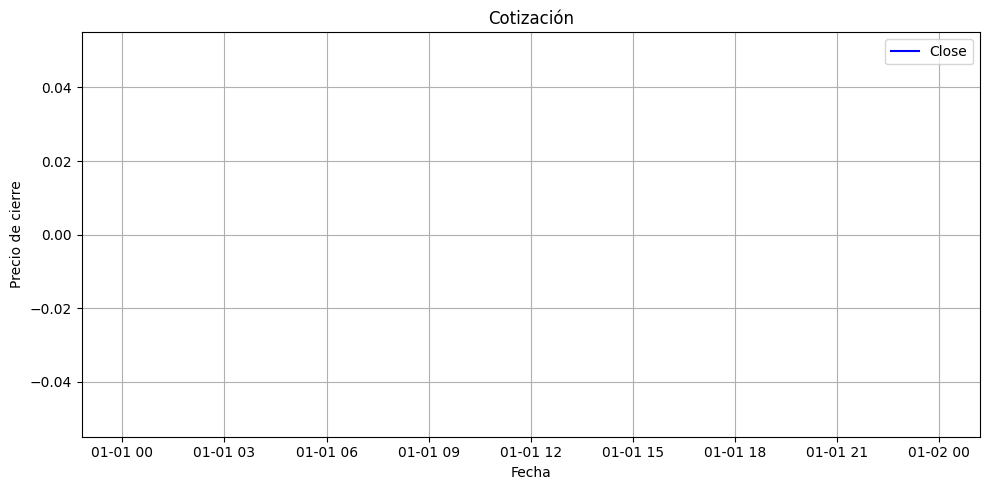

In [ ]:
import matplotlib.pyplot as plt

# Iterar sobre cada DataFrame en el diccionario
for nombre_df, df in gestor.df_dict.items():
    # Asegurarse de que el índice sea datetime (por si acaso)
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df['Date'])

    # Graficar la columna 'Close'
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df['Close'], label='Close', color='blue')
    plt.title(f'Cotización')
    plt.xlabel('Fecha')
    plt.ylabel('Precio de cierre')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


IE00B03HD191 - Rango: 2018-01-02 00:00:00 a 2025-09-10 00:00:00
IE00B18GC888 - Rango: 2018-01-02 00:00:00 a 2025-09-10 00:00:00


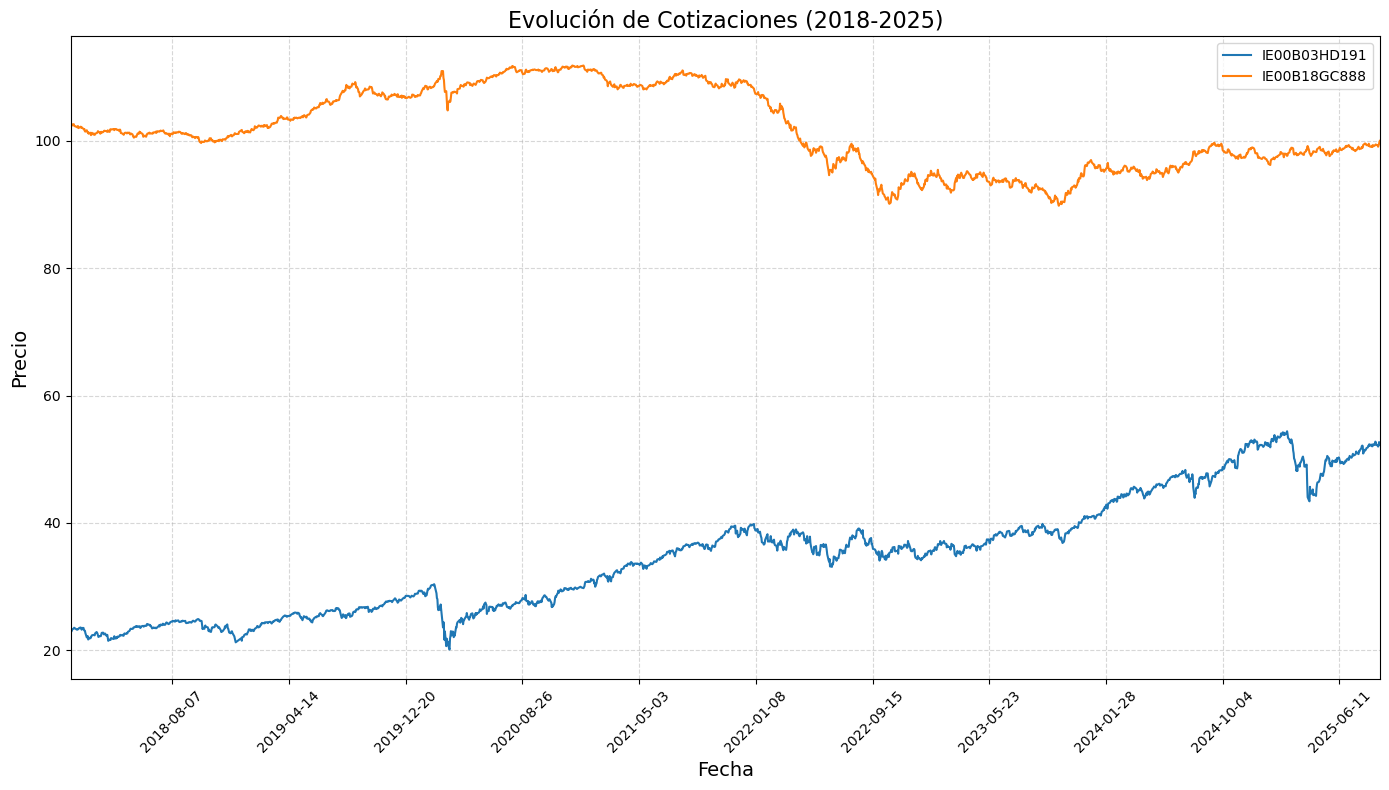

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(14, 8))

for nombre, df in gestor.dataframes.items():
    # Asegurar que el índice es datetime
    df.index = pd.to_datetime(df.index)

    # Verificar fechas reales
    print(f"{nombre} - Rango: {df.index.min()} a {df.index.max()}")

    # Graficar con línea continua
    plt.plot(df.index, df['Close'], label=nombre, linewidth=1.5)

# Configurar el rango de fechas hasta 2024
plt.xlim([pd.to_datetime('2018-01-02'), pd.to_datetime('2025-09-06')])

# Mejorar el formato
plt.title('Evolución de Cotizaciones (2018-2025)', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Precio', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

# Formatear eje X
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(12))  # 12 marcas de fecha
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**Análisis de los gráficos**.
La fuerte caída que se observa en la cotización de este fondo de renta fija, especialmente a partir de 2022, se debe a una subida generalizada y agresiva de los tipos de interés por parte de los bancos centrales, como el Banco Central Europeo (BCE) y la Reserva Federal de Estados Unidos (Fed).

Aquí te explico por qué este fenómeno afecta de forma tan significativa a los fondos de renta fija:

    Relación inversa entre tipos de interés y precio de los bonos: El precio de los bonos (que son los activos principales de un fondo de renta fija) y los tipos de interés se mueven en direcciones opuestas. Cuando los tipos de interés suben, el precio de los bonos existentes en el mercado baja.

    ¿Por qué bajan los bonos?:

        Nuevos bonos más atractivos: Cuando los bancos centrales suben los tipos, los bonos recién emitidos ofrecen una rentabilidad (cupón) más alta.

        Desvalorización de bonos antiguos: Esto hace que los bonos que ya estaban en circulación, con cupones más bajos, sean menos atractivos para los inversores. Para que un inversor esté dispuesto a comprar un bono antiguo, su precio de mercado debe bajar lo suficiente como para que su rentabilidad total (contando el cupón y la apreciación del precio) sea comparable a la de los nuevos bonos.

    Impacto en los fondos de renta fija: Los fondos de renta fija invierten en una cartera de bonos. Cuando el precio de estos bonos cae, el valor liquidativo del fondo (el precio de su cotización) también disminuye, lo que se traduce en pérdidas para los inversores que ya tenían posiciones.

Además de la subida de tipos, otros factores que pueden contribuir a una caída, aunque en menor medida, son:

    Riesgo de inflación: El aumento de la inflación reduce el poder adquisitivo de los intereses y del capital de los bonos, haciendo que sean menos valiosos.

    Riesgo de crédito: Si la calidad crediticia de los emisores de los bonos (por ejemplo, gobiernos o empresas) se deteriora, aumenta el riesgo de impago, lo que provoca una caída en el precio de sus bonos.

En resumen, la caída que se ve en el gráfico es un claro reflejo de la política monetaria restrictiva implementada por los bancos centrales a partir de 2022 para combatir la alta inflación. Esta política, que se basa en subir los tipos de interés, impacta directamente y de forma negativa en la valoración de los activos de renta fija.

## Evolución del indice MSCI World.
El ticker ^990100-USD-STRD en Yahoo Finanzas corresponde al índice MSCI World, no a una empresa.
Es una representación del comportamiento del índice en dólares estadounidenses, y te permite seguir su evolución,
ver gráficos históricos, y comparar su rendimiento con otros índices globales.


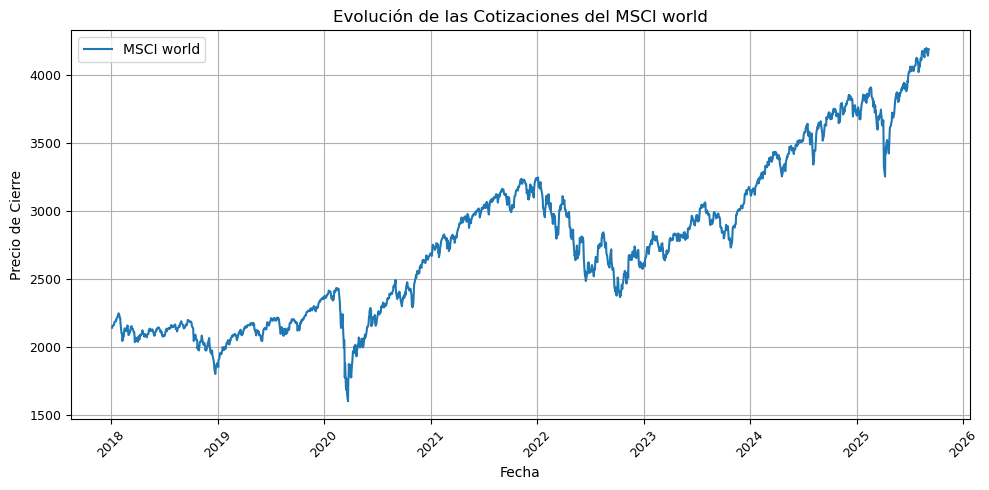

In [ ]:
# Evolución del Ibex 35.
# Parámetros de análisis configurables.
import yfinance as yf
import matplotlib.pyplot as plt

ticker = '^990100-USD-STRD?'
value_name = 'MSCI world'

# Definir los tickers de los índices
tickers = {
    value_name: ticker
}

# Descargar datos históricos
data = {}
for name, ticker in tickers.items():
    df = yf.download(ticker, start='2018-01-04', end='2025-09-06', auto_adjust = True, progress=False)
    # Asegurarse de que el índice sea de tipo fecha
    df.index = df.index.to_pydatetime()
    # Guardar solo la columna 'Close'
    data[name] = df['Close']

# Crear la gráfica
plt.figure(figsize=(10, 5))
for name, series in data.items():
    plt.plot(series.index, series.values, lw=1.5, label=name)

# Añadir título y etiquetas
plt.title(f'Evolución de las Cotizaciones del {value_name}', fontsize=12)
plt.xlabel('Fecha', fontsize=10)
plt.ylabel('Precio de Cierre', fontsize=10)
plt.legend(fontsize=10)
plt.xticks(rotation=45, fontsize=9)
plt.yticks(fontsize=9)
plt.grid(True)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


## Evolución de la cartera y de los FI.
es una herramienta en Python diseñada para simular la evolución de una cartera de inversión compuesta por varios fondos. Su función principal es calcular cómo un capital inicial, junto con aportaciones mensuales, crecería a lo largo del tiempo, basándose en los datos de rendimiento de los fondos seleccionados.

Solicita Parámetros: Pide al usuario que defina los parámetros de la simulación, incluyendo las fechas de inicio y fin, el peso porcentual de cada fondo en la cartera y los importes de la inversión inicial y las aportaciones mensuales.

Calcula la Evolución: Utiliza los datos históricos de los fondos para simular el valor de la cartera en el tiempo, recalculando el capital acumulado en cada periodo. Esto tiene en cuenta tanto el rendimiento de los fondos como las nuevas aportaciones.

Muestra los Resultados: Presenta un resumen de los resultados, incluyendo el capital final de cada fondo y de la cartera completa, así como la tasa de crecimiento anual compuesta (CAGR). También genera un gráfico que visualiza la evolución del capital a lo largo del periodo de simulación.


Rango de fechas disponible: 2018-01-02 a 2025-09-10


Fecha de inicio (YYYY-MM-DD) o Enter para 2018-01-02:  
Fecha de fin (YYYY-MM-DD) o Enter para 2025-09-10:  



Asigne peso (%) a cada fondo (suma=100):


Peso para IE00B03HD191:  25
Peso para IE00B18GC888:  75

Importe inversión inicial (€):  10000
Importe aportación mensual (€):  200



--- Evolución de la cartera y fondos ---
        Fecha  Capital_IE00B03HD191  Capital_IE00B18GC888  Capital_Cartera
0  2018-01-02           2500.000000           7500.000000     10000.000000
1  2018-02-01           2578.217113           7574.926026     10153.143138
2  2018-03-01           2545.790416           7727.165425     10272.955841
3  2018-04-01           2531.606586           7901.983283     10433.589869
4  2018-05-01           2690.882169           7998.748968     10689.631137
...
         Fecha  Capital_IE00B03HD191  Capital_IE00B18GC888  Capital_Cartera
88  2025-05-01          11781.099532          20024.642561     31805.742092
89  2025-06-01          12283.327432          20148.565009     32431.892441
90  2025-07-01          12416.211228          20488.626606     32904.837834
91  2025-08-01          12715.220544          20642.731370     33357.951914
92  2025-09-01          13089.342074          20781.114901     33870.456976

--- Tabla Resumen Final ---
FONDO/CARTERA      

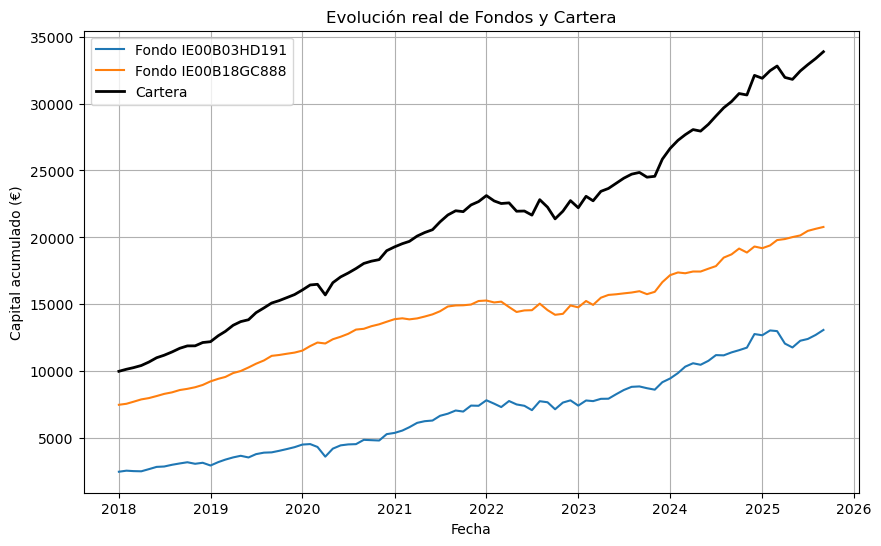

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class SimuladorCarteraFI:
    def __init__(self, df_dict, nombres_fondos):
        self.df_dict = df_dict
        self.nombres_fondos = nombres_fondos
        self.resultados = {}

    def pedir_parametros(self):
        # Fechas comunes
        min_fechas = [df.index.min() for df in self.df_dict.values()]
        max_fechas = [df.index.max() for df in self.df_dict.values()]
        inicio_disp = max(min_fechas)
        fin_disp = min(max_fechas)
        print(f"\nRango de fechas disponible: {inicio_disp.date()} a {fin_disp.date()}")
        while True:
            ini_str = input(f"Fecha de inicio (YYYY-MM-DD) o Enter para {inicio_disp.date()}: ")
            fi_str = input(f"Fecha de fin (YYYY-MM-DD) o Enter para {fin_disp.date()}: ")
            try:
                inicio = pd.to_datetime(ini_str) if ini_str else inicio_disp
                fin = pd.to_datetime(fi_str) if fi_str else fin_disp
                if inicio < inicio_disp or fin > fin_disp or fin < inicio:
                    print("Fechas fuera de rango o mal ordenadas. Intente de nuevo.")
                else:
                    break
            except:
                print("Formato incorrecto. Reintente.")
        self.inicio = inicio
        self.fin = fin
        # Pesos
        print("\nAsigne peso (%) a cada fondo (suma=100):")
        pesos = {}
        for f in self.nombres_fondos:
            while True:
                try:
                    val = float(input(f"Peso para {f}: "))
                    if 0 <= val <= 100:
                        pesos[f] = val/100
                        break
                except:
                    print("Valor no válido.")
        if abs(sum(pesos.values())-1.0) > 0.01:
            print("La suma difiere de 100%. Normalizando...")
            total = sum(pesos.values())
            pesos = {k:v/total for k,v in pesos.items()}
        self.pesos = pesos
        # Inversión inicial y mensual
        while True:
            try:
                self.inicial = float(input("\nImporte inversión inicial (€): "))
                self.mensual = float(input("Importe aportación mensual (€): "))
                break
            except:
                print("Valor no válido.")

    def simular(self):
        # Fechas de inversión mensual
        fechas = pd.date_range(self.inicio, self.fin, freq='MS')
        if self.inicio not in fechas:
            fechas = fechas.insert(0, self.inicio)
        n_meses = len(fechas)-1 if fechas[0]==self.inicio else len(fechas)
        tabla = []
        capital_por_fondo = {f:0 for f in self.nombres_fondos}
        participaciones = {f:0 for f in self.nombres_fondos}
        historial = []

        # Aportación inicial
        for f in self.nombres_fondos:
            df_f = self.df_dict[f].loc[(self.df_dict[f].index >= self.inicio)]
            px_entrada = df_f['Close'].iloc[0]  # <-- Corrección
            inv = self.inicial * self.pesos[f]
            participaciones[f] = inv / px_entrada
            capital_por_fondo[f] = inv

        for ix, fecha in enumerate(fechas):
            row = {'Fecha': fecha.date()}
            total_mes = 0
            for f in self.nombres_fondos:
                df_f = self.df_dict[f]
                indexer = df_f.index.get_indexer([fecha], method='nearest')
                if indexer == -1:
                    px = df_f['Close'].iloc[-1]
                else:
                    px = df_f['Close'].iloc[indexer[0]]
                inv_mensual = self.mensual * self.pesos[f] if ix > 0 else 0
                if inv_mensual > 0:
                    participaciones[f] += inv_mensual / px
                    capital_por_fondo[f] += inv_mensual
                valor = participaciones[f] * px
                row[f'Capital_{f}'] = valor
                row[f'Cierre_{f}'] = px
                total_mes += valor
            row['Capital_Cartera'] = total_mes
            historial.append(row)

        self.historial = pd.DataFrame(historial)
        self.capital_final = {f: self.historial[f'Capital_{f}'].iloc[-1] for f in self.nombres_fondos}
        self.capital_final['Cartera'] = self.historial['Capital_Cartera'].iloc[-1]

        invertido_total = self.inicial + n_meses*self.mensual
        self.cagr = {}
        años = (self.fin-self.inicio).days/365.25
        for f in self.nombres_fondos+['Cartera']:
            cap_fin = self.capital_final[f]
            self.cagr[f] = (cap_fin/invertido_total)**(1/años)-1 if invertido_total>0 else np.nan

    def mostrar(self):
        # Mostrar tabla evolución
        display_cols = ['Fecha']+[f'Capital_{f}' for f in self.nombres_fondos]+['Capital_Cartera']
        print("\n--- Evolución de la cartera y fondos ---")
        print(self.historial[display_cols].head())
        print("...")
        print(self.historial[display_cols].tail())
        # Tabla resumen final
        print("\n--- Tabla Resumen Final ---")
        print(f"{'FONDO/CARTERA':<15} {'CAPITAL FINAL (€)':>20} {'CAGR (%)':>10}")
        invertido_tot = self.inicial + (len(self.historial)-1)*self.mensual
        for k in self.nombres_fondos+['Cartera']:
            print(f"{k:<15} {self.capital_final[k]:>20.2f} {self.cagr[k]*100:>10.2f}")
        # Gráfica
        plt.figure(figsize=(10,6))
        for f in self.nombres_fondos:
            plt.plot(self.historial['Fecha'], self.historial[f'Capital_{f}'], label=f'Fondo {f}')
        plt.plot(self.historial['Fecha'], self.historial['Capital_Cartera'], label='Cartera', linewidth=2, c='black')
        plt.title("Evolución real de Fondos y Cartera")
        plt.xlabel("Fecha")
        plt.ylabel("Capital acumulado (€)")
        plt.legend()
        plt.grid(True)
        plt.show()

# --- Ejecución principal ---

# Supón que df_dict está cargado con los DataFrames necesarios, y los nombres de las claves corresponden a los fondos
nombres_fondos = list(gestor.df_dict.keys())
simulador = SimuladorCarteraFI(gestor.df_dict, nombres_fondos)
simulador.pedir_parametros()
simulador.simular()
simulador.mostrar()


**Comparación con diferentes pesos.**
Tabla Resumen Final (25/75) ---
FONDO/CARTERA      CAPITAL FINAL (€)   CAGR (%)
IE00B03HD191                13089.34      -9.58
IE00B18GC888                20781.11      -3.98
Cartera                     33870.46       2.32

--- Tabla Resumen Final (50/50)---
FONDO/CARTERA      CAPITAL FINAL (€)   CAGR (%)
IE00B03HD191                26178.68      -1.05
IE00B18GC888                13854.08      -8.91
Cartera                     40032.76       4.57

--- Tabla Resumen Final (75/25)---
FONDO/CARTERA      CAPITAL FINAL (€)   CAGR (%)
IE00B03HD191                39268.03       4.30
IE00B18GC888                 6927.04     -16.77
Cartera                     46195.06       6.53




**¿Por qué puede la cartera tener un CAGR positivo aunque ambos fondos individuales tengan CAGR negativos?**

    Efecto de las aportaciones periódicas (DCA):
    En la simulación no solo consideras la inversión inicial, sino también aportaciones mensuales constantes durante todo el periodo. Esto significa que el capital invertido no se coloca todo de una vez sino repartido en el tiempo.

    Cálculo del CAGR de cada fondo individual:
    El CAGR calculado para cada fondo suele reflejar la rentabilidad basada en la inversión inicial sin incorporar el efecto de las aportaciones posteriores o en algunos casos no refleja bien el coste medio ponderado dado por las compras mensuales.

    Cálculo del CAGR de la cartera:
    El CAGR de la cartera considera la suma acumulada y ponderada de todas las participaciones compradas a distintos precios a lo largo del tiempo, dando lugar a un coste medio realizado más favorable.

    Diversificación y ponderación:
    Al combinar fondos con diferente comportamiento y asignar pesos, la cartera balancea las pérdidas de un fondo con mejores resultados del otro, amortiguando la rentabilidad negativa.

    Utilización del precio actualizado para valoraciones y suma de participaciones acumuladas:
    La cartera valora las participaciones siempre al precio real de mercado del momento, lo que junto con las aportaciones mensuales genera una rentabilidad compuesta efectiva que puede ser positiva pese a que los rendimientos "por separado" sean negativos si se consideran solo rentabilidades simples.

En resumen

    Los CGAR negativos de los fondos indican que si hubieras invertido toda la cantidad inicial de forma única al inicio y no aportas más, habrías tenido pérdidas.

    Al hacer aportaciones adicionales periódicas a precios variados (DCA), compras más participaciones cuando los precios están bajos, reduciendo el coste medio y mejorando la rentabilidad.

    La combinación y ponderación de fondos también ayuda a estabilizar resultados.

    Por eso, la rentabilidad acumulada ponderada y con aportaciones (la cartera) puede terminar con CAGR positivo aunque cada fondo por separado muestre negativo.


## Ver visualmente el efecto de las aportaciones periódicas

    El gráfico compara la suma acumulada del dinero que has puesto (línea discontinua) con el valor real de mercado del cartera (línea continua).

    La tabla muestra claramente cuánto dinero has invertido realmente, cuánto tienes hoy y cuál ha sido tu ganancia y rentabilidad total en porcentaje.

Este gráfico y tabla ilustran cómo las aportaciones periódicas (DCA) pueden generar rentabilidad positiva incluso si los CGAR de los fondos individuales sin aportaciones fueran negativos.

El problema no está en el cálculo, sino en la interpretación. El valor de 28.400 € sí es el capital total aportado por el inversor (inversión inicial más aportaciones mensuales), mientras que el capital final de 33.870,46 € es el valor real de la cartera al final del periodo.

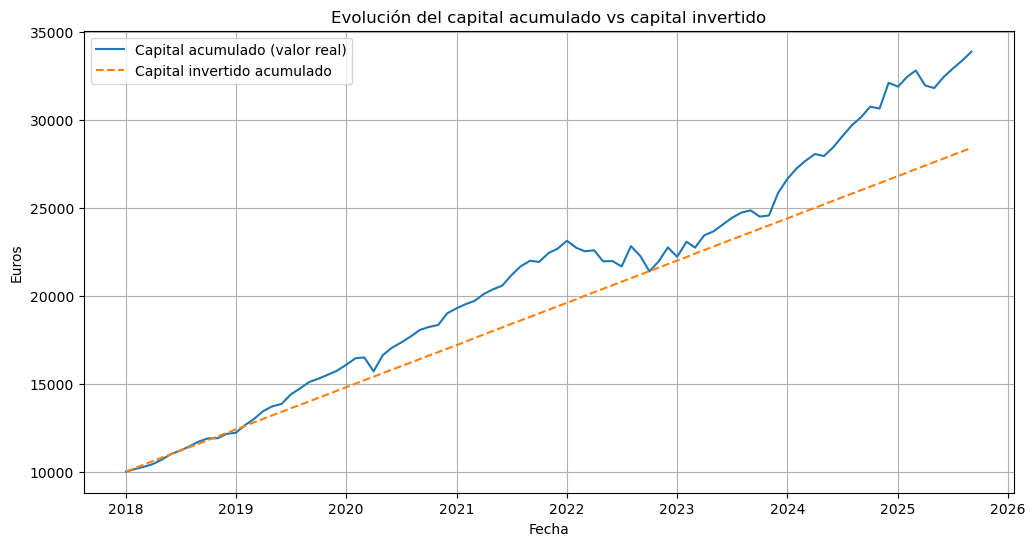

,Capital invertido (€),Capital final (€),Ganancia (€),Rentabilidad acumulada (%)
0,28400.0,33870.456976,5470.456976,19.262172


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def mostrar_impacto_aportaciones(simulador):
    df = simulador.historial.copy()
    df['Fecha'] = pd.to_datetime(df['Fecha'])
    n_meses = len(df) - 1

    # Capital invertido acumulado (inicial + aportaciones mensuales)
    df['Capital_invertido_acum'] = simulador.inicial + simulador.mensual * df.index

    # Gráfico evolución del capital acumulado vs capital invertido acumulado
    plt.figure(figsize=(12,6))
    plt.plot(df['Fecha'], df['Capital_Cartera'], label='Capital acumulado (valor real)')
    plt.plot(df['Fecha'], df['Capital_invertido_acum'], label='Capital invertido acumulado', linestyle='--')
    plt.title('Evolución del capital acumulado vs capital invertido')
    plt.xlabel('Fecha')
    plt.ylabel('Euros')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Tabla resumen de inversión vs valor acumulado final y rentabilidad
    capital_final = df['Capital_Cartera'].iloc[-1]
    capital_invertido = df['Capital_invertido_acum'].iloc[-1]
    ganancia = capital_final - capital_invertido
    rentabilidad = ganancia / capital_invertido * 100

    tabla = pd.DataFrame({
        'Capital invertido (€)': [capital_invertido],
        'Capital final (€)': [capital_final],
        'Ganancia (€)': [ganancia],
        'Rentabilidad acumulada (%)': [rentabilidad]
    })

    display(tabla)

# Ejemplo de uso con el simulador ya ejecutado
mostrar_impacto_aportaciones(simulador)


# Análisis Estadístico de los Fondos seleccionados.

Con la cartera que incluye los fondos seleccionados

Rango común disponible: 2018-01-02 - 2025-09-10


Fecha inicio (YYYY-MM-DD) o Enter para 2018-01-02:  
Fecha fin (YYYY-MM-DD) o Enter para 2025-09-10:  


Asigne porcentaje (%) a cada fondo. La suma debe ser 100%.


Peso para IE00B03HD191:  25
Peso para IE00B18GC888:  75



--- Registro de Inversión Inicial ---


Introduce la cantidad TOTAL en euros a invertir en la cartera en la fecha de inicio 2018-01-02:  10000


✅ Inversión de 2500.00€ (25.0%) registrada en 'IE00B03HD191'. Participaciones compradas: 109.5381

--- Informe completo para IE00B03HD191 ---

- SITUACION_ACTUAL:
  ISIN: IE00B03HD191
  denominacion: IE00B03HD191
  fecha_valoracion: 2025-09-10 00:00:00
  valor_participacion: 52.713299
  participaciones: 109.538148
  valor_actual: 5774.117100

- BENEFICIO:
  plusvalia: 3274.117100
  rentabilidad_porcentual: 1.309647
  valor_actual: 5774.117100
  total_invertido: 2500.000000
  total_desinvertido: 0

- INDICADORES_RIESGO:
  volatilidad_anualizada: 0.156549
  desviacion_diaria: 0.009862
  sharpe: 0.775630

- EVOLUCION:
  2sem: 0.001094
  1M: 0.011234
  3M: 0.062813
  1A: 0.114840
  2A: 0.335596

- ANALISIS_1M:
  variacion_total: 0.011234
  n_subidas: 11
  n_bajadas: 9
  promedio_diario: 0.000570
  media_subidas: 0.004144
  media_bajadas: -0.003799
  minimo: 51.985298
  fecha_min: 2025-09-02
  maximo: 52.763401
  fecha_max: 2025-08-27

- ANALISIS_3M:
  variacion_total: 0.062813
  n_subidas:

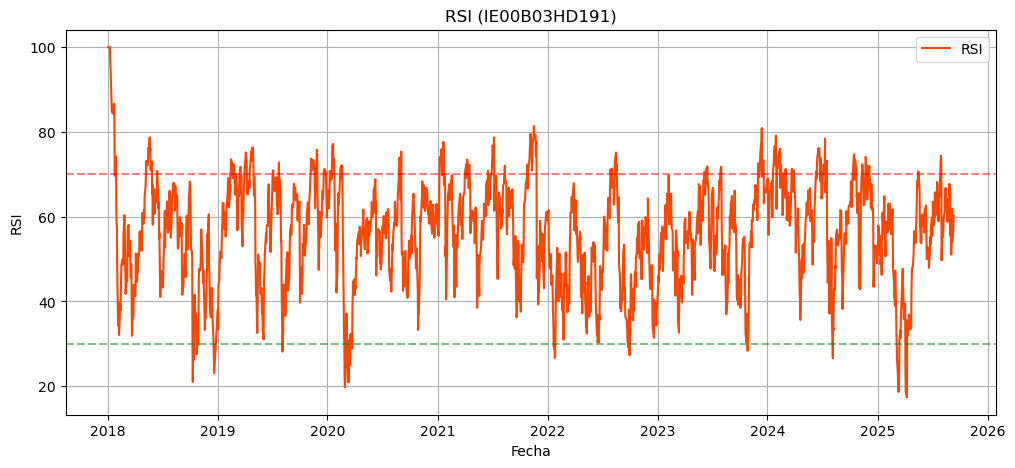

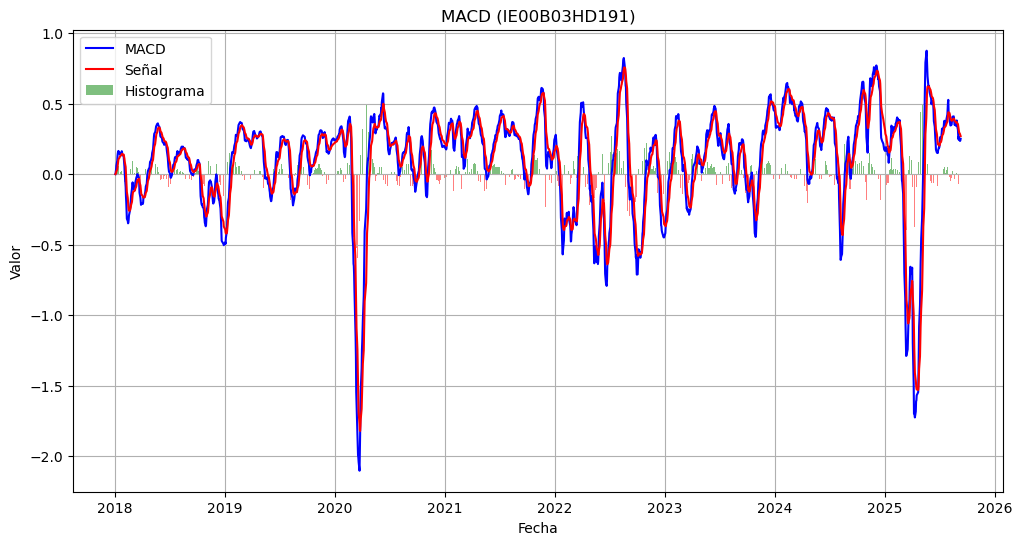

✅ Inversión de 7500.00€ (75.0%) registrada en 'IE00B18GC888'. Participaciones compradas: 73.1714

--- Informe completo para IE00B18GC888 ---

- SITUACION_ACTUAL:
  ISIN: IE00B18GC888
  denominacion: IE00B18GC888
  fecha_valoracion: 2025-09-10 00:00:00
  valor_participacion: 100.145401
  participaciones: 73.171445
  valor_actual: 7327.783720

- BENEFICIO:
  plusvalia: -172.216280
  rentabilidad_porcentual: -0.022962
  valor_actual: 7327.783720
  total_invertido: 7500.000000
  total_desinvertido: 0

- INDICADORES_RIESGO:
  volatilidad_anualizada: 0.034613
  desviacion_diaria: 0.002180
  sharpe: 0.257449

- EVOLUCION:
  2sem: 0.007283
  1M: 0.006190
  3M: 0.016420
  1A: 0.008316
  2A: 0.085985

- ANALISIS_1M:
  variacion_total: 0.006190
  n_subidas: 11
  n_bajadas: 9
  promedio_diario: 0.000310
  media_subidas: 0.001758
  media_bajadas: -0.001460
  minimo: 99.019699
  fecha_min: 2025-08-21
  maximo: 100.164803
  fecha_max: 2025-09-08

- ANALISIS_3M:
  variacion_total: 0.016420
  n_subidas

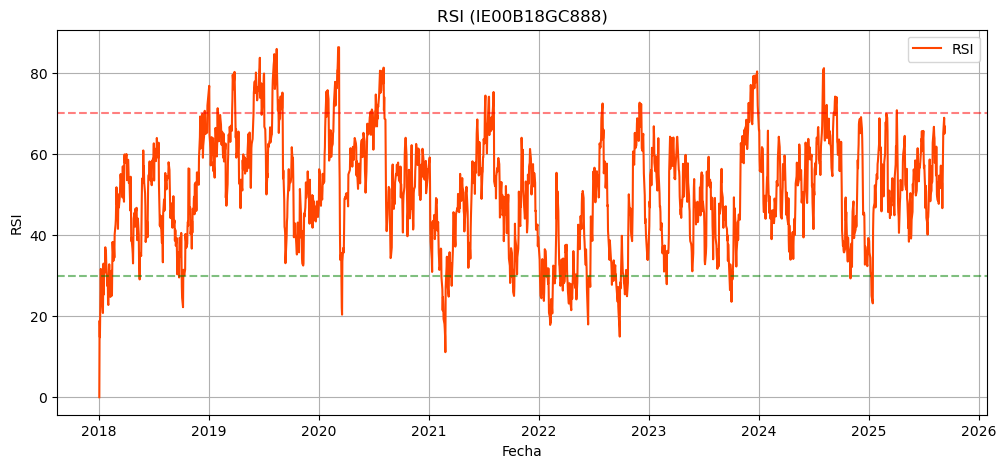

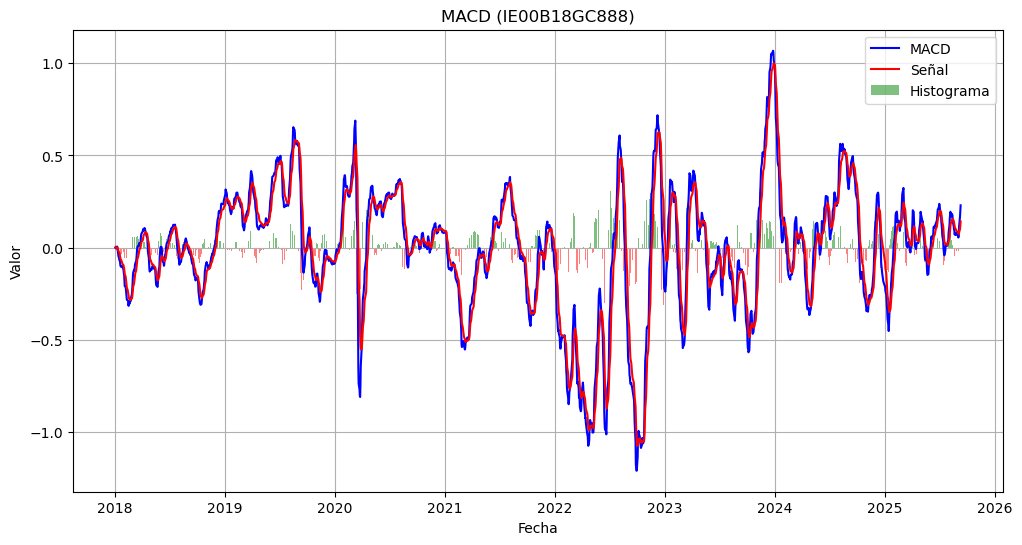


--- Métricas agregadas de la cartera ---
rentabilidad_anualizada_cartera: 0.024806
volatilidad_anualizada_cartera: 0.050736
sharpe_cartera: 0.488924
max_drawdown_cartera: -0.175405


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class InvestmentAnalyzer:
    """
    Clase para el análisis detallado de una inversión basada en datos históricos.
    Permite registrar movimientos, calcular la situación actual, el beneficio,
    y analizar indicadores de riesgo y técnicos.
    """
    def __init__(self, df: pd.DataFrame, isin: str, denominacion: str):
        """
        Inicializa la clase con el DataFrame de cotizaciones y la información del fondo.

        :param df: DataFrame con al menos una columna 'Close' y un índice de fechas.
        :param isin: Código ISIN del fondo.
        :param denominacion: Nombre del fondo.
        """
        if not isinstance(df.index, pd.DatetimeIndex):
            df.index = pd.to_datetime(df.index)

        df = df[~df.index.duplicated(keep='first')]
        self.df = df.sort_index()

        self.isin = isin
        self.denominacion = denominacion
        self.movimientos = []
        self.situacion = {}

    def registrar_inversion(self, fecha: str, n_participaciones: float, valor_participacion: float):
        """Registra una operación de suscripción de participaciones."""
        importe = n_participaciones * valor_participacion
        self.movimientos.append({
            'tipo': 'inversion',
            'Date': pd.to_datetime(fecha),
            'n_participaciones': n_participaciones,
            'valor_participacion': valor_participacion,
            'importe': importe
        })

    def registrar_desinversion(self, fecha: str, n_participaciones: float, valor_participacion: float):
        """Registra una operación de reembolso de participaciones."""
        importe = n_participaciones * valor_participacion
        self.movimientos.append({
            'tipo': 'desinversion',
            'Date': pd.to_datetime(fecha),
            'n_participaciones': -n_participaciones,
            'valor_participacion': valor_participacion,
            'importe': -importe
        })

    def calcular_situacion_actual(self, fecha_actual=None) -> dict:
        """
        Calcula la situación actual de la inversión (valor y participaciones).
        Si no se proporciona fecha, utiliza la última fecha del DataFrame.
        """
        if not self.movimientos:
            return {'error': 'No hay movimientos registrados.'}

        if fecha_actual is None:
            fecha_actual = self.df.index[-1]
        else:
            fecha_actual = pd.to_datetime(fecha_actual)

        if fecha_actual not in self.df.index:
            try:
                idx = self.df.index.get_indexer([fecha_actual], method='nearest')[0]
                fecha_cercana = self.df.index[idx]
                close_actual = self.df.loc[fecha_cercana, 'Close']
                print(f"ℹ️ Usando cotización de la fecha más cercana: {fecha_cercana.strftime('%Y-%m-%d')}")
            except IndexError:
                print("⚠️ La fecha proporcionada está fuera del rango de datos del DataFrame.")
                return {'error': 'Fecha fuera de rango.'}
        else:
            fecha_cercana = fecha_actual
            close_actual = self.df.loc[fecha_actual, 'Close']

        total_participaciones = sum(
            m['n_participaciones']
            for m in self.movimientos
            if m['Date'] <= fecha_actual
        )
        valor_actual = total_participaciones * close_actual

        self.situacion = {
            'ISIN': self.isin,
            'denominacion': self.denominacion,
            'fecha_valoracion': fecha_cercana,
            'valor_participacion': close_actual,
            'participaciones': total_participaciones,
            'valor_actual': valor_actual
        }
        return self.situacion

    def calcular_beneficio(self) -> dict:
        """Calcula el beneficio o pérdida de la inversión."""
        situacion = self.calcular_situacion_actual()
        if 'error' in situacion:
            return situacion

        total_invertido = sum(m['importe'] for m in self.movimientos if m['tipo'] == 'inversion')
        total_desinvertido = -sum(m['importe'] for m in self.movimientos if m['tipo'] == 'desinversion')

        beneficio = situacion['valor_actual'] + total_desinvertido - total_invertido
        tasa = beneficio / total_invertido if total_invertido != 0 else np.nan

        return {
            'plusvalia': beneficio,
            'rentabilidad_porcentual': tasa,
            'valor_actual': situacion['valor_actual'],
            'total_invertido': total_invertido,
            'total_desinvertido': total_desinvertido
        }

    def indicadores_riesgo(self, window=252, rf=0.0) -> dict:
        """Calcula indicadores de riesgo como volatilidad y ratio de Sharpe."""
        data = self.df['Close'].iloc[-window:]
        ret = data.pct_change().dropna()
        if ret.empty:
            return {}

        std = ret.std()
        annual_vol = std * np.sqrt(252)
        mean_ret = ret.mean()
        sharpe = (mean_ret - rf/252) / std * np.sqrt(252) if std > 0 else np.nan

        return {
            'volatilidad_anualizada': annual_vol,
            'desviacion_diaria': std,
            'sharpe': sharpe
        }

    def evolucion_rentabilidad(self, periodos: dict) -> dict:
        """Calcula la rentabilidad para diferentes períodos (ej. '1M': 21 días)."""
        resultados = {}
        for nombre, num in periodos.items():
            if num > len(self.df) or num == 0:
                resultados[nombre] = np.nan
                continue

            precios = self.df['Close'].iloc[-num:]
            cambio = precios.iloc[-1] / precios.iloc[0] - 1
            resultados[nombre] = cambio
        return resultados

    def analisis_periodo(self, num: int) -> dict:
        """Realiza un análisis detallado para un número de días determinado."""
        if num > len(self.df) or num == 0:
            return {}

        precios = self.df['Close'].iloc[-num:]
        variaciones = precios.pct_change().dropna()

        if variaciones.empty:
            return {}

        subidas = variaciones[variaciones > 0]
        bajadas = variaciones[variaciones < 0]

        return {
            'variacion_total': precios.iloc[-1] / precios.iloc[0] - 1,
            'n_subidas': (variaciones > 0).sum(),
            'n_bajadas': (variaciones < 0).sum(),
            'promedio_diario': variaciones.mean(),
            'media_subidas': subidas.mean() if not subidas.empty else np.nan,
            'media_bajadas': bajadas.mean() if not bajadas.empty else np.nan,
            'minimo': precios.min(),
            'fecha_min': precios.idxmin().strftime('%Y-%m-%d'),
            'maximo': precios.max(),
            'fecha_max': precios.idxmax().strftime('%Y-%m-%d'),
        }

    def medias_movil(self, wind1=20, wind2=200) -> dict:
        """Compara el precio actual con medias móviles de corto y largo plazo."""
        if len(self.df) < max(wind1, wind2):
            return {'mm20': np.nan, 'mm200': np.nan, 'actual_supera_mm20': False, 'actual_supera_mm200': False}

        mm20 = self.df['Close'].rolling(wind1).mean().iloc[-1]
        mm200 = self.df['Close'].rolling(wind2).mean().iloc[-1]
        close_actual = self.df['Close'].iloc[-1]

        return {
            'actual_supera_mm20': close_actual > mm20,
            'actual_supera_mm200': close_actual > mm200,
            'mm20': mm20,
            'mm200': mm200
        }

    def rsi(self, period=14) -> float:
        """Calcula el índice de fuerza relativa (RSI) para un período."""
        if len(self.df) < period:
            return np.nan

        delta = self.df['Close'].diff()
        up = delta.clip(lower=0)
        down = -1 * delta.clip(upper=0)
        ma_up = up.ewm(com=period-1, adjust=False).mean()
        ma_down = down.ewm(com=period-1, adjust=False).mean()

        with np.errstate(divide='ignore', invalid='ignore'):
            rs = ma_up / ma_down
        rsi = 100 - (100 / (1 + rs))

        return rsi.iloc[-1]

    def macd(self, short=12, long=26, signal=9) -> dict:
        """Calcula el MACD y su línea de señal."""
        if len(self.df) < long:
            return {'macd': np.nan, 'signal': np.nan, 'hist': np.nan}

        ema_short = self.df['Close'].ewm(span=short, adjust=False).mean()
        ema_long = self.df['Close'].ewm(span=long, adjust=False).mean()
        macd_line = ema_short - ema_long
        signal_line = macd_line.ewm(span=signal, adjust=False).mean()
        macd_hist = macd_line - signal_line

        return {
            'macd': macd_line.iloc[-1],
            'signal': signal_line.iloc[-1],
            'hist': macd_hist.iloc[-1]
        }

    def plot_rsi(self, period=14):
        """Genera y muestra un gráfico del RSI."""
        rsi = self.rsi_historico(period)
        if rsi.isnull().all():
            print("No hay suficientes datos para calcular el RSI.")
            return

        plt.figure(figsize=(12, 5))
        plt.plot(rsi.index, rsi, label='RSI', color='orangered')
        plt.axhline(70, color='red', linestyle='--', alpha=0.5)
        plt.axhline(30, color='green', linestyle='--', alpha=0.5)
        plt.title(f'RSI ({self.denominacion})')
        plt.ylabel('RSI')
        plt.xlabel('Fecha')
        plt.legend()
        plt.grid(True)
        plt.show()

    def plot_macd(self, short=12, long=26, signal=9):
        """Genera y muestra un gráfico del MACD."""
        macd_line, signal_line, macd_hist = self.macd_historico(short, long, signal)

        if macd_line.isnull().all():
            print("No hay suficientes datos para calcular el MACD.")
            return

        fig, ax = plt.subplots(figsize=(12, 6))
        ax.plot(macd_line.index, macd_line, label='MACD', color='blue')
        ax.plot(signal_line.index, signal_line, label='Señal', color='red')
        ax.bar(macd_hist.index, macd_hist, color=['green' if val >= 0 else 'red' for val in macd_hist], alpha=0.5, label='Histograma')

        ax.set_title(f'MACD ({self.denominacion})')
        ax.set_ylabel('Valor')
        ax.set_xlabel('Fecha')
        ax.legend()
        ax.grid(True)
        plt.show()

    def rsi_historico(self, period=14) -> pd.Series:
        """Calcula el RSI para todo el historial de datos y devuelve una Serie."""
        if len(self.df) < period:
            return pd.Series(dtype='float64')
        delta = self.df['Close'].diff()
        up = delta.clip(lower=0)
        down = -1 * delta.clip(upper=0)
        ma_up = up.ewm(com=period - 1, adjust=False).mean()
        ma_down = down.ewm(com=period - 1, adjust=False).mean()
        with np.errstate(divide='ignore', invalid='ignore'):
            rs = ma_up / ma_down
        rsi = 100 - (100 / (1 + rs))
        return rsi

    def macd_historico(self, short=12, long=26, signal=9) -> tuple[pd.Series, pd.Series, pd.Series]:
        """Calcula el MACD y sus componentes para todo el historial."""
        if len(self.df) < long:
            return pd.Series(dtype='float64'), pd.Series(dtype='float64'), pd.Series(dtype='float64')
        ema_short = self.df['Close'].ewm(span=short, adjust=False).mean()
        ema_long = self.df['Close'].ewm(span=long, adjust=False).mean()
        macd_line = ema_short - ema_long
        signal_line = macd_line.ewm(span=signal, adjust=False).mean()
        macd_hist = macd_line - signal_line
        return macd_line, signal_line, macd_hist

    def alertas(self) -> list:
        """Evalúa indicadores clave para emitir alertas sobre la inversión."""
        mensajes = []
        rsi = self.rsi()
        macd = self.macd()
        medias = self.medias_movil()
        analisis_1M = self.analisis_periodo(21)

        # Alerta RSI
        if not pd.isna(rsi):
            if rsi > 70:
                mensajes.append("⚠️ **ALERTA**: RSI en sobrecompra (>70), posible corrección inminente.")
            elif rsi < 30:
                mensajes.append("⚠️ **ALERTA**: RSI en sobreventa (<30), posible rebote técnico.")
            else:
                mensajes.append("✅ RSI en zona neutral (30-70).")

        # Alerta MACD
        if not any(pd.isna(macd.values())):
            if macd['macd'] > macd['signal']:
                mensajes.append("📈 **MACD alcista**: El MACD ha cruzado por encima de la línea de señal. Posible impulso positivo.")
            else:
                mensajes.append("📉 **MACD bajista**: El MACD ha cruzado por debajo de la línea de señal. Vigilar por presión vendedora a corto plazo.")

        # Precio vs medias móviles
        if 'actual_supera_mm20' in medias:
            if not medias['actual_supera_mm20']:
                mensajes.append("🔻 El precio actual está por debajo de la media móvil de 20 días. Posible debilidad a corto plazo.")
            if 'actual_supera_mm200' in medias and medias['actual_supera_mm200']:
                mensajes.append("🟢 El precio actual está por encima de la media móvil de 200 días. Tendencia alcista de fondo intacta.")
            elif 'actual_supera_mm200' in medias and not medias['actual_supera_mm200']:
                mensajes.append("🔴 El precio actual está por debajo de la media móvil de 200 días. La tendencia de largo plazo podría ser bajista.")

        # Variación mensual importante
        if analisis_1M and 'variacion_total' in analisis_1M and not pd.isna(analisis_1M['variacion_total']):
            if abs(analisis_1M['variacion_total']) > 0.05:
                v = analisis_1M['variacion_total'] * 100
                mensajes.append(f"⚡ **Variación mensual significativa**: {v:.2f}% en el último mes.")

        if not mensajes:
            mensajes.append("✅ No se detectaron alertas especiales en este diagnóstico.")

        return mensajes

    def resumen(self) -> dict:
        """Genera un resumen completo de la inversión."""
        resumen = {}
        resumen['situacion_actual'] = self.calcular_situacion_actual()
        resumen['beneficio'] = self.calcular_beneficio()
        resumen['indicadores_riesgo'] = self.indicadores_riesgo()
        resumen['evolucion'] = self.evolucion_rentabilidad({
            '2sem':10, '1M':21, '3M':63, '1A':252, '2A':504
        })
        resumen['analisis_1M'] = self.analisis_periodo(21)
        resumen['analisis_3M'] = self.analisis_periodo(63)
        resumen['analisis_1A'] = self.analisis_periodo(252)
        resumen['medias_movil'] = self.medias_movil()
        resumen['rsi'] = self.rsi()
        resumen['macd'] = self.macd()
        return resumen

    def evaluar_inversion(self) -> str:
        """
        Evalúa la inversión de forma cualitativa basándose en los indicadores calculados.

        :return: Una cadena de texto con el resumen de la evaluación.
        """
        resumen_data = self.resumen()
        evolucion = resumen_data['evolucion']
        indicadores_riesgo = resumen_data['indicadores_riesgo']
        medias_movil = resumen_data['medias_movil']
        analisis_1m = resumen_data['analisis_1M']

        if 'error' in resumen_data['situacion_actual']:
            return "❌ No es posible evaluar. No hay movimientos registrados."

        evaluacion = f"### Evaluación de la Inversión: {self.denominacion}\n\n"

        rentabilidad_anual = evolucion.get('1A', 0)
        if rentabilidad_anual > 0.20:
            evaluacion += "✅ **Rendimiento a Largo Plazo**: El activo muestra una rentabilidad anual sobresaliente (>20%), indicando un fuerte crecimiento sostenido.\n"
        elif rentabilidad_anual > 0.05:
            evaluacion += "👍 **Rendimiento a Largo Plazo**: El rendimiento anual es sólido y positivo, superando las expectativas habituales.\n"
        else:
            evaluacion += "👎 **Rendimiento a Largo Plazo**: La rentabilidad anual es baja o negativa. Reevalúe la tendencia de fondo.\n"

        variacion_1m = analisis_1m.get('variacion_total', 0)
        if variacion_1m < 0:
            evaluacion += "⚠️ **Situación Reciente**: El activo ha mostrado debilidad en el último mes, lo que puede ser una corrección o el inicio de una tendencia bajista a corto plazo.\n"
        elif variacion_1m > 0:
            evaluacion += "📈 **Situación Reciente**: El activo ha mostrado un comportamiento positivo en el último mes.\n"

        volatilidad = indicadores_riesgo.get('volatilidad_anualizada', 0)
        sharpe = indicadores_riesgo.get('sharpe', 0)
        evaluacion += f"📊 **Riesgo**: Con una volatilidad anualizada de {volatilidad:.2%}, el activo muestra un riesgo moderado. El ratio de Sharpe de {sharpe:.2f} es {'alto' if sharpe > 1 else 'bajo'} y sugiere que el rendimiento compensa {'el riesgo asumido' if sharpe > 1 else 'de forma limitada el riesgo asumido'}.\n"

        evaluacion += "--- Señales Técnicas ---\n"
        if medias_movil.get('actual_supera_mm200', False):
            evaluacion += "🟢 **Tendencia de Fondo**: El precio actual por encima de la media móvil de 200 días indica que la tendencia a largo plazo es alcista.\n"
        else:
            evaluacion += "🔴 **Tendencia de Fondo**: El precio por debajo de la media móvil de 200 días sugiere una tendencia bajista de fondo.\n"

        if medias_movil.get('actual_supera_mm20', False):
            evaluacion += "👍 **Momento a Corto Plazo**: El precio actual supera la media móvil de 20 días, señal de fuerza a corto plazo.\n"
        else:
            evaluacion += "👎 **Momento a Corto Plazo**: El precio actual por debajo de la media móvil de 20 días, señal de debilidad a corto plazo.\n"

        return evaluacion

    @staticmethod
    def calcular_metricas_cartera(dataframes_dict, pesos):
        precios = pd.DataFrame({k: df['Close'] for k, df in dataframes_dict.items() if k in pesos})
        precios = precios.dropna()
        if precios.empty:
            raise ValueError("No hay datos coincidentes entre fondos con los pesos dados.")
        retornos = np.log(precios / precios.shift(1)).dropna()
        w = np.array([pesos[k] for k in precios.columns])
        rent_cartera = np.dot(retornos.mean(), w) * 252
        var_cartera = np.dot(w, np.dot(retornos.cov() * 252, w))
        vol_cartera = np.sqrt(var_cartera)
        sharpe_cartera = rent_cartera / vol_cartera if vol_cartera > 0 else np.nan
        valores = (retornos @ w).cumsum()
        peak = valores.cummax()
        drawdown = (valores - peak)
        max_drawdown = drawdown.min()
        return {
            'rentabilidad_anualizada_cartera': rent_cartera,
            'volatilidad_anualizada_cartera': vol_cartera,
            'sharpe_cartera': sharpe_cartera,
            'max_drawdown_cartera': max_drawdown
        }

def pedir_rango_fechas(df_dict):
    fechas_min = [df.index.min() for df in df_dict.values()]
    fechas_max = [df.index.max() for df in df_dict.values()]
    inicio_disp = max(fechas_min)
    fin_disp = min(fechas_max)
    print(f"Rango común disponible: {inicio_disp.date()} - {fin_disp.date()}")
    while True:
        try:
            inicio_str = input(f"Fecha inicio (YYYY-MM-DD) o Enter para {inicio_disp.date()}: ")
            inicio = pd.to_datetime(inicio_str) if inicio_str else inicio_disp
            fin_str = input(f"Fecha fin (YYYY-MM-DD) o Enter para {fin_disp.date()}: ")
            fin = pd.to_datetime(fin_str) if fin_str else fin_disp
            if inicio < inicio_disp or fin > fin_disp or fin < inicio:
                print("Fechas fuera de rango o mal ordenadas, intente nuevamente.")
                continue
            break
        except Exception:
            print("Formato inválido. Intente otra vez.")
    return inicio, fin

def pedir_pesos(fondos):
    print("Asigne porcentaje (%) a cada fondo. La suma debe ser 100%.")
    while True:
        pesos = {}
        for fondo in fondos:
            while True:
                try:
                    val = float(input(f"Peso para {fondo}: "))
                    if 0 <= val <= 100:
                        pesos[fondo] = val / 100
                        break
                    else:
                        print("Valor debe estar entre 0 y 100.")
                except:
                    print("Entrada inválida. Intente nuevamente.")
        if abs(sum(pesos.values()) - 1.0) > 0.001:
            print(f"La suma es {sum(pesos.values())*100:.2f}%, debe ser 100%. Reintente.")
            continue
        break
    return pesos

def imprimir_resumen(nombre, resumen, analizador):
    """
    Imprime un informe completo y la evaluación de la inversión.
    """
    print(f"\n--- Informe completo para {nombre} ---")
    for categoria, datos in resumen.items():
        print(f"\n- {categoria.upper()}:")
        if isinstance(datos, dict):
            for k, v in datos.items():
                if isinstance(v, float):
                    print(f"  {k}: {v:.6f}")
                else:
                    print(f"  {k}: {v}")
        else:
            print(f"  {datos}")

    # 🌟 Nuevo: Llamada a la función de evaluación
    print("\n- EVALUACION_CUALITATIVA:")
    evaluacion_texto = analizador.evaluar_inversion()
    print(evaluacion_texto)


def main(df_dict):
    fondos = list(df_dict.keys())
    inicio, fin = pedir_rango_fechas(df_dict)
    # Filtrar DataFrames
    dfs_filtrados = {f: df[(df.index >= inicio) & (df.index <= fin)] for f, df in df_dict.items()}

    pesos = pedir_pesos(fondos)

    # 🟢 NUEVO: Pedir la cantidad total a invertir una sola vez
    print("\n--- Registro de Inversión Inicial ---")
    while True:
        try:
            cantidad_total = float(input(f"Introduce la cantidad TOTAL en euros a invertir en la cartera en la fecha de inicio {inicio.date()}: "))
            if cantidad_total > 0:
                break
            else:
                print("La cantidad debe ser mayor que cero.")
        except ValueError:
            print("Entrada no válida. Por favor, introduce un número.")

    analizadores = {}
    for fondo in fondos:
        df = dfs_filtrados[fondo]
        analizador = InvestmentAnalyzer(df, isin=fondo, denominacion=fondo)

        # 🟢 NUEVO: Calcular la cantidad a invertir para este fondo en base a su peso
        try:
            cantidad_invertir_fondo = cantidad_total * pesos[fondo]
            valor_inicio = df.loc[inicio, 'Close']
            n_participaciones = cantidad_invertir_fondo / valor_inicio

            analizador.registrar_inversion(fecha=inicio.date(), n_participaciones=n_participaciones, valor_participacion=valor_inicio)

            print(f"✅ Inversión de {cantidad_invertir_fondo:.2f}€ ({pesos[fondo]*100:.1f}%) registrada en '{fondo}'. Participaciones compradas: {n_participaciones:.4f}")

        except KeyError:
            print(f"⚠️ No se encontró el precio de cierre para la fecha de inicio {inicio.date()} en el fondo '{fondo}'. No se pudo registrar la inversión.")

        resumen = analizador.resumen()
        imprimir_resumen(fondo, resumen, analizador)

        analizador.plot_rsi()
        analizador.plot_macd()
        analizadores[fondo] = analizador

    # El cálculo de métricas de cartera se mantiene igual
    metricas_cartera = InvestmentAnalyzer.calcular_metricas_cartera(dfs_filtrados, pesos)
    print("\n--- Métricas agregadas de la cartera ---")
    for k, v in metricas_cartera.items():
        if isinstance(v, float):
            print(f"{k}: {v:.6f}")
        else:
            print(f"{k}: {v}")

if __name__ == "__main__":
    main(gestor.df_dict)

# Análisis estadístico de la cartera de fondos seleccionados.
Analizamos la cartera conformada con los fondos seleccionados.

## Sin autodiagnóstico.

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf

class AnalisisCartera:

    @staticmethod
    def calcular_metricas_cartera(dataframes_dict, pesos, benchmark_series=None):
        precios = pd.DataFrame({
            k: df['Close'] for k, df in dataframes_dict.items()
            if k in pesos and not df.empty and 'Close' in df.columns
        })

        precios = precios.dropna()
        if precios.empty:
            raise ValueError("No hay datos válidos entre los fondos con los pesos dados.")

        # Normalizar pesos
        w = np.array([pesos[k] for k in precios.columns])
        w = w / w.sum()

        # Retornos logarítmicos
        retornos = np.log(precios / precios.shift(1)).dropna()

        # Métricas básicas
        rent_cartera = np.dot(retornos.mean(), w) * 252
        var_cartera = np.dot(w, np.dot(retornos.cov() * 252, w))
        vol_cartera = np.sqrt(var_cartera)
        sharpe_cartera = rent_cartera / vol_cartera if vol_cartera > 0 else np.nan

        # Sortino ratio
        retornos_cartera = retornos @ w
        retornos_negativos = retornos_cartera[retornos_cartera < 0]
        downside_risk = np.std(retornos_negativos, axis=0) * np.sqrt(252)
        sortino_cartera = rent_cartera / downside_risk if downside_risk > 0 else np.nan

        # Tracking error
        tracking_error = np.nan
        if benchmark_series is not None and isinstance(benchmark_series, pd.Series):
            benchmark_ret = np.log(benchmark_series / benchmark_series.shift(1)).dropna()
            fechas_comunes = benchmark_ret.index.intersection(retornos_cartera.index)
            if not fechas_comunes.empty:
                diff = retornos_cartera.loc[fechas_comunes] - benchmark_ret.loc[fechas_comunes]
                tracking_error = np.std(diff, axis=0) * np.sqrt(252)

        # Máximo drawdown
        acumulado = (1 + retornos_cartera).cumprod()
        max_drawdown = (acumulado / acumulado.cummax() - 1).min()

        return {
            'rentabilidad_anualizada_cartera': rent_cartera,
            'volatilidad_anualizada_cartera': vol_cartera,
            'sharpe_cartera': sharpe_cartera,
            'sortino_cartera': sortino_cartera,
            'tracking_error': tracking_error,
            'max_drawdown_cartera': max_drawdown
        }

# -----------------------------
# Simulación de uso interactivo
# -----------------------------

# Supongamos que ya tienes esto:
# gestor = GestorImportaciones()
# df_dict = gestor.df_dict

# Input interactivo de pesos
pesos = {}
print("Introduce los pesos para cada fondo (por ejemplo: 0.5):")
for nombre in gestor.df_dict.keys():
    while True:
        try:
            peso = float(input(f"Peso para {nombre}: "))
            if peso < 0:
                raise ValueError("El peso no puede ser negativo.")
            pesos[nombre] = peso
            break
        except ValueError as e:
            print(f"Entrada inválida: {e}")

# Normalización automática
suma_pesos = sum(pesos.values())
if suma_pesos == 0:
    raise ValueError("La suma de los pesos no puede ser cero.")
pesos = {k: v / suma_pesos for k, v in pesos.items()}

# Benchmark opcional
benchmark_raw = yf.download('^990100-USD-STRD?', start='2018-01-04', end='2024-12-30', auto_adjust=True, progress=False)

# Extraer columna de precios
if isinstance(benchmark_raw.columns, pd.MultiIndex):
    ticker = benchmark_raw.columns.levels[1][0]
    benchmark_raw = benchmark_raw.xs(ticker, level=1, axis=1)

for col in ['Adj Close', 'Close', 'Price']:
    if col in benchmark_raw.columns:
        benchmark_series = benchmark_raw[col].dropna()
        break
else:
    benchmark_series = None

# Calcular métricas
metricas = AnalisisCartera.calcular_metricas_cartera(gestor.df_dict, pesos, benchmark_series)

# Mostrar resultados
print("\n📊 Métricas de la cartera:")
for k, v in metricas.items():
    try:
        print(f"{k}: {float(v):.4f}")
    except (TypeError, ValueError):
        print(f"{k}: {v}")


Introduce los pesos para cada fondo (por ejemplo: 0.5):


Peso para IE00B03HD191:  25
Peso para IE00B18GC888:  75



📊 Métricas de la cartera:
rentabilidad_anualizada_cartera: 0.0248
volatilidad_anualizada_cartera: 0.0507
sharpe_cartera: 0.4889
sortino_cartera: 0.6049
tracking_error: 0.1326
max_drawdown_cartera: -0.1627


## Con autodiagnóstico.

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf

class AnalisisCartera:

    @staticmethod
    def calcular_metricas_cartera(dataframes_dict, pesos, benchmark_series=None):
        precios = pd.DataFrame({
            k: df['Close'] for k, df in dataframes_dict.items()
            if k in pesos and not df.empty and 'Close' in df.columns
        })

        precios = precios.dropna()
        if precios.empty:
            raise ValueError("No hay datos válidos entre los fondos con los pesos dados.")

        # Normalizar pesos
        w = np.array([pesos[k] for k in precios.columns])
        w = w / w.sum()

        # Retornos logarítmicos
        retornos = np.log(precios / precios.shift(1)).dropna()
        retornos_cartera = retornos @ w

        # Métricas básicas
        rent_cartera = retornos_cartera.mean() * 252
        vol_cartera = retornos_cartera.std(ddof=0) * np.sqrt(252)
        sharpe_cartera = rent_cartera / vol_cartera if vol_cartera > 0 else np.nan

        # Sortino ratio
        retornos_negativos = retornos_cartera[retornos_cartera < 0]
        downside_risk = np.std(retornos_negativos, axis=0) * np.sqrt(252)
        sortino_cartera = rent_cartera / downside_risk if downside_risk > 0 else np.nan

        # Benchmark y métricas relativas
        alpha = beta = info_ratio = tracking_error = np.nan
        if benchmark_series is not None and isinstance(benchmark_series, pd.Series):
            benchmark_ret = np.log(benchmark_series / benchmark_series.shift(1)).dropna()
            fechas_comunes = benchmark_ret.index.intersection(retornos_cartera.index)
            if not fechas_comunes.empty:
                rc = retornos_cartera.loc[fechas_comunes]
                rb = benchmark_ret.loc[fechas_comunes]
                cov = np.cov(rc, rb)[0][1]
                var_b = np.var(rb)
                beta = cov / var_b if var_b > 0 else np.nan
                alpha = (rc.mean() - beta * rb.mean()) * 252
                diff = rc - rb
                tracking_error = np.std(diff) * np.sqrt(252)
                info_ratio = (rc.mean() - rb.mean()) / np.std(diff) if np.std(diff) > 0 else np.nan

        # Ratio de Calmar
        acumulado = (1 + retornos_cartera).cumprod()
        max_drawdown = (acumulado / acumulado.cummax() - 1).min()
        calmar_ratio = rent_cartera / abs(max_drawdown) if max_drawdown < 0 else np.nan

        return {
            'rentabilidad_anualizada_cartera': rent_cartera,
            'volatilidad_anualizada_cartera': vol_cartera,
            'sharpe_cartera': sharpe_cartera,
            'sortino_cartera': sortino_cartera,
            'tracking_error': tracking_error,
            'alpha': alpha,
            'beta': beta,
            'ratio_informacion': info_ratio,
            'calmar_ratio': calmar_ratio,
            'max_drawdown_cartera': max_drawdown
        }

    @staticmethod
    def diagnostico_metricas(metricas):
        comentarios = []

        # Sharpe
        s = metricas.get('sharpe_cartera', np.nan)
        if s > 1:
            comentarios.append("✅ Excelente relación rentabilidad/riesgo.")
        elif s > 0.5:
            comentarios.append("🟡 Relación rentabilidad/riesgo aceptable.")
        else:
            comentarios.append("🔴 Rentabilidad baja en relación al riesgo asumido.")

        # Sortino
        sortino = metricas.get('sortino_cartera', np.nan)
        if sortino > 1:
            comentarios.append("✅ Buen control del riesgo a la baja.")
        elif sortino < 0.5:
            comentarios.append("⚠️ Riesgo de pérdidas no compensado por la rentabilidad.")

        # Tracking Error
        te = metricas.get('tracking_error', np.nan)
        if te > 0.1:
            comentarios.append("📉 Alta desviación respecto al benchmark. ¿Estrategia activa?")
        else:
            comentarios.append("📊 Comportamiento similar al benchmark. ¿Estrategia pasiva?")

        # Drawdown
        dd = metricas.get('max_drawdown_cartera', 0)
        if dd < -0.2:
            comentarios.append("⚠️ Caídas significativas. Revisa la tolerancia al riesgo.")
        else:
            comentarios.append("✅ Control razonable de caídas máximas.")

        # Alpha
        alpha = metricas.get('alpha', np.nan)
        if alpha > 0:
            comentarios.append("🚀 La cartera genera valor adicional respecto al benchmark.")
        elif alpha < 0:
            comentarios.append("🔻 La cartera no supera al benchmark ajustado por riesgo.")

        # Ratio de información
        info = metricas.get('ratio_informacion', np.nan)
        if info > 0.5:
            comentarios.append("📈 Buen desempeño relativo con bajo error de seguimiento.")
        elif info < 0:
            comentarios.append("📉 Desempeño inferior al benchmark con alta dispersión.")

        return comentarios


# -----------------------------
# Simulación de uso interactivo
# -----------------------------

# Supongamos que ya tienes esto:
# gestor = GestorImportaciones()
# df_dict = gestor.df_dict

# Input interactivo de pesos
pesos = {}
print("Introduce los pesos para cada fondo (por ejemplo: 0.5):")
for nombre in gestor.df_dict.keys():
    while True:
        try:
            peso = float(input(f"Peso para {nombre}: "))
            if peso < 0:
                raise ValueError("El peso no puede ser negativo.")
            pesos[nombre] = peso
            break
        except ValueError as e:
            print(f"Entrada inválida: {e}")

# Normalización automática
suma_pesos = sum(pesos.values())
if suma_pesos == 0:
    raise ValueError("La suma de los pesos no puede ser cero.")
pesos = {k: v / suma_pesos for k, v in pesos.items()}

# Benchmark opcional
benchmark_raw = yf.download('^990100-USD-STRD?', start='2018-01-04', end='2024-12-30', auto_adjust=True, progress=False)

# Extraer columna de precios
if isinstance(benchmark_raw.columns, pd.MultiIndex):
    ticker = benchmark_raw.columns.levels[1][0]
    benchmark_raw = benchmark_raw.xs(ticker, level=1, axis=1)

for col in ['Adj Close', 'Close', 'Price']:
    if col in benchmark_raw.columns:
        benchmark_series = benchmark_raw[col].dropna()
        break
else:
    benchmark_series = None

# Calcular métricas
metricas = AnalisisCartera.calcular_metricas_cartera(gestor.df_dict, pesos, benchmark_series)

# Mostrar resultados
print("\n📊 Métricas de la cartera:")
for k, v in metricas.items():
    try:
        print(f"{k}: {float(v):.4f}")
    except (TypeError, ValueError):
        print(f"{k}: {v}")


print("\n🧠 Diagnóstico automático:")
for comentario in AnalisisCartera.diagnostico_metricas(metricas):
    print(comentario)



Introduce los pesos para cada fondo (por ejemplo: 0.5):


Peso para IE00B03HD191:  25
Peso para IE00B18GC888:  75



📊 Métricas de la cartera:
rentabilidad_anualizada_cartera: 0.0248
volatilidad_anualizada_cartera: 0.0507
sharpe_cartera: 0.4890
sortino_cartera: 0.6049
tracking_error: 0.1326
alpha: 0.0088
beta: 0.2367
ratio_informacion: -0.0242
calmar_ratio: 0.1524
max_drawdown_cartera: -0.1627

🧠 Diagnóstico automático:
🔴 Rentabilidad baja en relación al riesgo asumido.
📉 Alta desviación respecto al benchmark. ¿Estrategia activa?
✅ Control razonable de caídas máximas.
🚀 La cartera genera valor adicional respecto al benchmark.
📉 Desempeño inferior al benchmark con alta dispersión.


# Identificar cotizaciones máximas y mínimas.


In [ ]:
import pandas as pd
from scipy.signal import argrelextrema
import numpy as np
import os

# Suponemos que la clase GestorImportaciones y los DataFrames ya están definidos y disponibles
# De no ser así, necesitarás la clase GestorImportaciones de tu código anterior para que esto funcione

def analizar_dataframe(df_analisis, fecha_inicio_str, fecha_fin_str):
    """
    Realiza el análisis de máximos y mínimos para un DataFrame dado.

    Args:
        df_analisis (pd.DataFrame): El DataFrame a analizar.
        fecha_inicio_str (str): Fecha de inicio del rango de análisis.
        fecha_fin_str (str): Fecha de fin del rango de análisis.
    """
    print(f"\n--- 📈 Análisis para el DataFrame: '{df_analisis.name}' ---")

    df_analisis.index = pd.to_datetime(df_analisis.index)

    rango_fechas_analisis = (fecha_inicio_str, fecha_fin_str)

    # Manejo de error si el rango de fechas no existe en el DataFrame
    try:
        df_rango = df_analisis.loc[rango_fechas_analisis[0]:rango_fechas_analisis[1]].copy()
    except KeyError:
        print("⚠️ Error: El rango de fechas seleccionado no existe en el DataFrame. Saltando el análisis local.")
        df_rango = pd.DataFrame()

    # Rango de fechas histórico del DataFrame
    fecha_inicio_hist = df_analisis.index.min().strftime('%Y-%m-%d')
    fecha_fin_hist = df_analisis.index.max().strftime('%Y-%m-%d')

    # Máximo y mínimo históricos (de todo el DataFrame)
    max_hist_value = df_analisis['Close'].max()
    max_hist_date = df_analisis['Close'].idxmax()

    min_hist_value = df_analisis['Close'].min()
    min_hist_date = df_analisis['Close'].idxmin()

    # Último máximo y mínimo locales (dentro del rango seleccionado)
    last_local_max_value, last_local_max_date = None, None
    last_local_min_value, last_local_min_date = None, None
    tiempo_recuperacion = "No aplica"

    if not df_rango.empty:
        close_array_rango = df_rango['Close'].values

        local_max_idx_rango = argrelextrema(close_array_rango, np.greater, order=5)[0]
        local_min_idx_rango = argrelextrema(close_array_rango, np.less, order=5)[0]

        if len(local_max_idx_rango) > 0:
            last_local_max_idx = local_max_idx_rango[-1]
            last_local_max_date = df_rango.index[last_local_max_idx].strftime('%Y-%m-%d')
            last_local_max_value = df_rango['Close'].iloc[last_local_max_idx]

        if len(local_min_idx_rango) > 0:
            last_local_min_idx = local_min_idx_rango[-1]
            last_local_min_date = df_rango.index[last_local_min_idx].strftime('%Y-%m-%d')
            last_local_min_value = df_rango['Close'].iloc[last_local_min_idx]

            # --- NUEVA LÓGICA PARA TIEMPO DE RECUPERACIÓN ---
            # Busca la primera fecha en la que la cotización supera el valor del último mínimo local
            df_despues_min = df_rango.loc[last_local_min_date:].copy()

            # Buscamos el siguiente máximo que sea mayor al mínimo
            siguiente_max = df_despues_min[df_despues_min['Close'] > last_local_min_value]

            if not siguiente_max.empty:
                # Encuentra el primer índice (fecha) donde la cotización supera el mínimo
                fecha_recuperacion = siguiente_max.index[0]

                # Calcula la diferencia de tiempo en días
                dias_recuperacion = (fecha_recuperacion - df_rango.index[last_local_min_idx]).days
                tiempo_recuperacion = f"{dias_recuperacion} días"

    # Mostrar resultados con etiquetas claras
    print("---")
    print(f"📊 Máximo histórico (todo el rango de datos: {fecha_inicio_hist} a {fecha_fin_hist}):")
    print(f"    Cotización: {max_hist_value:.2f} el {max_hist_date.strftime('%Y-%m-%d')}")
    print(f"📉 Mínimo histórico (todo el rango de datos: {fecha_inicio_hist} a {fecha_fin_hist}):")
    print(f"    Cotización: {min_hist_value:.2f} el {min_hist_date.strftime('%Y-%m-%d')}")
    print("---")
    if not df_rango.empty:
        print(f"🔼 Último máximo local (rango de análisis: {rango_fechas_analisis[0]} a {rango_fechas_analisis[1]}):")
        print(f"    Cotización: {last_local_max_value:.2f} el {last_local_max_date}")
        print(f"🔽 Último mínimo local (rango de análisis: {rango_fechas_analisis[0]} a {rango_fechas_analisis[1]}):")
        print(f"    Cotización: {last_local_min_value:.2f} el {last_local_min_date}")
        print("---")
        print(f"⏳ Tiempo de recuperación del último mínimo: {tiempo_recuperacion}")
    else:
        print("No se encontraron datos para el rango de fechas seleccionado.")

# --- MAIN SCRIPT ---
# El resto del código principal se mantiene igual
print("Introduce el rango de fechas que deseas analizar (formato YYYY-MM-DD):")
fecha_inicio_str = input("Fecha de inicio: ")
fecha_fin_str = input("Fecha de fin: ")

# Asume que 'gestor' y 'nombres_dfs_global' existen
# Si no, esta parte del código fallará
if 'gestor' in locals() and hasattr(gestor, 'dataframes'):
    for df_nombre, df_actual in gestor.dataframes.items():
        df_actual.name = df_nombre
        analizar_dataframe(df_actual, fecha_inicio_str, fecha_fin_str)

Introduce el rango de fechas que deseas analizar (formato YYYY-MM-DD):


Fecha de inicio:  2018-01-02
Fecha de fin:  2025-09-04



--- 📈 Análisis para el DataFrame: 'IE00B03HD191' ---
---
📊 Máximo histórico (todo el rango de datos: 2018-01-02 a 2025-09-10):
    Cotización: 54.39 el 2025-02-19
📉 Mínimo histórico (todo el rango de datos: 2018-01-02 a 2025-09-10):
    Cotización: 20.13 el 2020-03-23
---
🔼 Último máximo local (rango de análisis: 2018-01-02 a 2025-09-04):
    Cotización: 52.76 el 2025-08-27
🔽 Último mínimo local (rango de análisis: 2018-01-02 a 2025-09-04):
    Cotización: 51.99 el 2025-09-02
---
⏳ Tiempo de recuperación del último mínimo: 1 días

--- 📈 Análisis para el DataFrame: 'IE00B18GC888' ---
---
📊 Máximo histórico (todo el rango de datos: 2018-01-02 a 2025-09-10):
    Cotización: 111.80 el 2020-12-11
📉 Mínimo histórico (todo el rango de datos: 2018-01-02 a 2025-09-10):
    Cotización: 89.79 el 2023-10-19
---
🔼 Último máximo local (rango de análisis: 2018-01-02 a 2025-09-04):
    Cotización: 99.53 el 2025-08-13
🔽 Último mínimo local (rango de análisis: 2018-01-02 a 2025-09-04):
    Cotización: 

# Drawdown de la cartera y tiempo de ecuperación.
Bogkeheads considera más útil, al momento de seleccionar los fondos que conformarán nuestra cartera, priorizar la máxima caída histórica sufrida por la cartera y el tiempo máximo de recuperación hasta alcanzar el nivel previo a dicha caída, en lugar de centrarse únicamente en la volatilidad. Esto se debe a que debemos estar preparados para afrontar, como mínimo, un nivel de pérdida similar.

disponemos de el diccionario 'gestor.dataframes' y la 'lista lista_dataframes'

Funcionalidades principales

- Configuración del período de análisis: Permite seleccionar si se analiza todo el histórico o un rango de fechas específico.

- Creación de la cartera: Asigna pesos (%) a cada activo y calcula el valor ponderado de la cartera combinando los precios según los pesos.

- Cálculo de métricas de riesgo: Drawdown máximo: Pérdida máxima respecto al pico histórico.

- Fecha del pico y recuperación: Cuándo ocurrió la máxima caída y cuánto tardó en recuperarse.

    Visualización:

- Gráficos individuales del drawdown de cada activo.

- Gráfico superpuesto comparando drawdowns de todos los activos y la cartera.

¿Quieres analizar un rango de fechas específico? (s/n):  s
Introduce la fecha de inicio (YYYY-MM-DD):  2018-01-04
Introduce la fecha de fin (YYYY-MM-DD):  2025-09-04


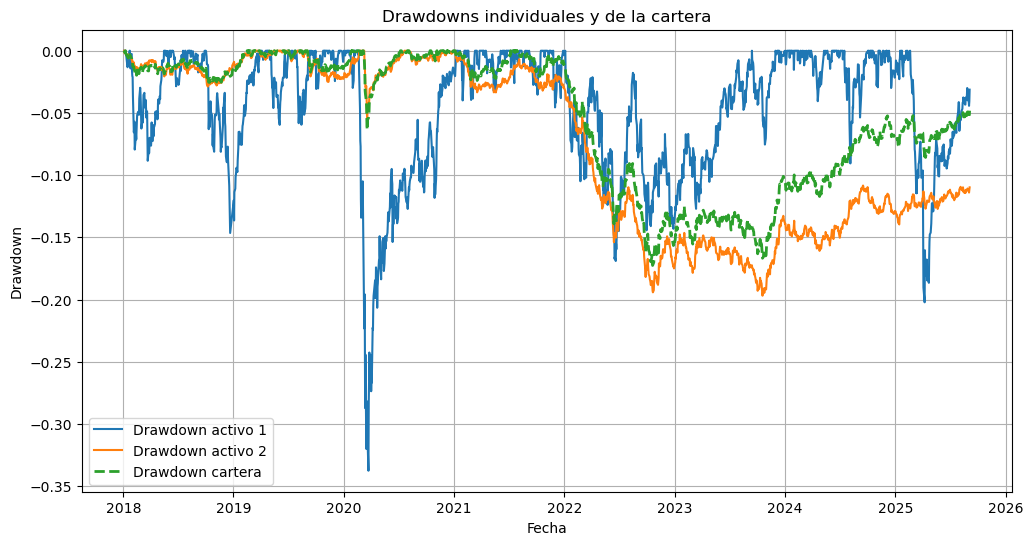

In [ ]:
# Cálulo de Drawdowns
import pandas as pd
import matplotlib.pyplot as plt

class carteraDrawdown:
    def __init__(self, df_list, weights):
        """
        df_list: lista de pandas DataFrames, cada uno con índice 'Date' y columna 'Close'
        weights: lista de floats, suma 1.0
        """
        self.df_list = df_list
        self.weights = weights
        self.individual_drawdowns = []
        self.cartera_df = None
        self.cartera_drawdown = None

    @staticmethod
    def calculate_drawdown(series):
        cummax = series.cummax()
        drawdown = (series - cummax) / cummax
        return drawdown

    def filter_by_dates(self, start_date, end_date):
        """Filtra todos los DataFrames por un rango de fechas dado."""
        self.df_list = [
            df.loc[(df.index >= start_date) & (df.index <= end_date)] for df in self.df_list
        ]

    def calculate_individual_drawdowns(self):
        self.individual_drawdowns = [
            self.calculate_drawdown(df['Close']) for df in self.df_list
        ]

    def calculate_cartera(self):
        close_dfs = [df['Close'].rename(f'Close_{i}') for i, df in enumerate(self.df_list)]
        merged = pd.concat(close_dfs, axis=1, join='inner')
        merged['cartera_Close'] = sum(
            merged[f'Close_{i}'] * self.weights[i] for i in range(len(self.df_list))
        )
        self.cartera_df = merged
        self.cartera_drawdown = self.calculate_drawdown(merged['cartera_Close'])

    def plot_drawdowns(self):
        plt.figure(figsize=(12,6))
        for i, dd in enumerate(self.individual_drawdowns):
            plt.plot(dd.index, dd, label=f'Drawdown activo {i+1}')
        plt.plot(self.cartera_drawdown.index, self.cartera_drawdown, label='Drawdown cartera', linewidth=2, linestyle='--')
        plt.xlabel('Fecha')
        plt.ylabel('Drawdown')
        plt.title('Drawdowns individuales y de la cartera')
        plt.legend()
        plt.grid()
        plt.show()

    def run(self):
        filtro = input("¿Quieres analizar un rango de fechas específico? (s/n): ").strip().lower()
        if filtro == 's':
            start_date = input("Introduce la fecha de inicio (YYYY-MM-DD): ").strip()
            end_date = input("Introduce la fecha de fin (YYYY-MM-DD): ").strip()
            self.filter_by_dates(start_date, end_date)
        self.calculate_individual_drawdowns()
        self.calculate_cartera()
        self.plot_drawdowns()


# Supongamos que df_dict es tu diccionario de DataFrames con nombres como claves
pesos = [0.25, 0.75]  # O ajusta los pesos que quieras asignar
nombres_dfs_global = list(gestor.df_dict.keys())  # Lista de claves (nombres)

# Extraer los DataFrames correspondientes en el orden de nombres_dfs_global
dataframes = [gestor.df_dict[clave] for clave in nombres_dfs_global]

# Crear la instancia pasando los DataFrames y pesos
cartera_dd = carteraDrawdown(dataframes, pesos)

# Ejecutar el análisis
cartera_dd.run()




# Rendimiento medio de los Fondos de Inversión.
Se calculan los medios de los Fondos recogidos en el fichero 'FI_rendimiento_anual.csv' rendimientos anuales otenidos en Morningstar.

In [ ]:
import pandas as pd
import numpy as np

# --- 1. Importar los rendimientos del archivo CSV ---
ruta_archivo = '/home/enri/Estrategia_bogleheads/FI_rendimiento_anual.csv'

try:
    df_rendimientos = pd.read_csv(ruta_archivo, index_col=0)
    print("DataFrame de rendimientos cargado correctamente:")
    print(df_rendimientos)
except FileNotFoundError:
    print(f"Error: El archivo no se encuentra en la ruta especificada: {ruta_archivo}")
    # Si el archivo no se encuentra, salimos del script
    exit()

# --- 2. Funciones para calcular rendimientos medios ---
def calcular_rendimiento_medio_aritmetico(rendimientos_serie):
    """
    Calcula el rendimiento medio aritmético a partir de una Serie de pandas.

    :param rendimientos_serie: Una Serie de pandas con los rendimientos anuales.
    :return: Rendimiento medio aritmético en porcentaje.
    """
    rendimientos_numericos = pd.to_numeric(rendimientos_serie, errors='coerce')
    media_aritmetica = rendimientos_numericos.mean()
    return media_aritmetica

def calcular_rendimiento_medio_geometrico(rendimientos_serie):
    """
    Calcula el rendimiento anual compuesto (CAGR), que es el rendimiento medio geométrico.

    :param rendimientos_serie: Una Serie de pandas con los rendimientos anuales.
    :return: Rendimiento medio geométrico (CAGR) en porcentaje.
    """
    rendimientos_numericos = pd.to_numeric(rendimientos_serie, errors='coerce').dropna()

    if rendimientos_numericos.empty:
        return np.nan

    factores = 1 + (rendimientos_numericos / 100)
    producto_factores = np.prod(factores)
    num_years = len(rendimientos_numericos)
    cagr = (producto_factores ** (1 / num_years) - 1) * 100
    return cagr

# --- 3. Ejecución de los cálculos y almacenamiento de resultados ---
# Creamos una lista para guardar los resultados de cada fondo
lista_resultados = []

fondos_isin = df_rendimientos.index

for isin in fondos_isin:
    # Obtener los rendimientos del fondo actual
    rendimientos_fondo = df_rendimientos.loc[isin]

    # Calcular las medias
    media_aritmetica = calcular_rendimiento_medio_aritmetico(rendimientos_fondo)
    cagr = calcular_rendimiento_medio_geometrico(rendimientos_fondo)

    # Almacenar los resultados en un diccionario
    resultados_fondo = {
        'Fondo': isin,
        'Rendimiento Medio Aritmético': f"{media_aritmetica:.2f}%",
        'Rendimiento Medio Geométrico (CAGR)': f"{cagr:.2f}%"
    }

    # Añadir el diccionario a la lista de resultados
    lista_resultados.append(resultados_fondo)

# --- 4. Crear y mostrar el DataFrame con los resultados ---
df_resultados = pd.DataFrame(lista_resultados)
df_resultados.set_index('Fondo', inplace=True)

print("-" * 60)
print("Resumen de Rendimientos Medios por Fondo:")
print(df_resultados)

DataFrame de rendimientos cargado correctamente:
                                                            ISIN    TER  \
Denominación                                                              
Vanguard Glb Stk Idx € Acc                          IE00B03HD191  0.15%   
Vanguard Global Bd Idx EUR H Acc                    IE00B18GC888  0.15%   
R4 Seleccion Conservadora Fi Clase R                ES0173270010  0.60%   
Renta 4 Renta Fija Euro Fi Clase A                  ES0173319007  0.30%   
Renta 4 Valor Relativo Clase R F.i.                 ES0128522002  0.85%   
Epsv Renta 4 Dedalo Ppi                                      EP2    NaN   
Plan De Pensiones Renta 4 Dedalo                           F1467    NaN   
Renta 4 Renta Fija 6 Meses Fi                       ES0128520006  0.30%   
Renta 4 Renta Fija Fi Clase R                       ES0176954008  0.70%   
DWS Euro Ultra Short Fixed Inc NC                   LU0080237943  0.10%   
Groupama Trésorerie IC                             

**Diferencia entre rendimiento medio aritmético y geométrico.**
La principal diferencia entre el rendimiento medio aritmético y el geométrico (también conocido como Tasa de Crecimiento Anual Compuesta o CAGR) radica en cómo tienen en cuenta la capitalización del interés.

Rendimiento Medio Aritmético

El rendimiento medio aritmético es un promedio simple. Simplemente sumas los rendimientos de cada periodo y los divides por el número de periodos.

    Fórmula:
    Media Aritmeˊtica=nR1​+R2​+⋯+Rn​​

    Ventaja: Es fácil de calcular y te da una idea del rendimiento "promedio" de una inversión, pero solo si no reinviertes tus ganancias.

    Desventaja: No refleja el efecto del interés compuesto. Si los rendimientos varían mucho (algunos años positivos y otros negativos), el promedio aritmético puede ser engañoso y sobreestimar el crecimiento real de tu inversión a largo plazo.

Rendimiento Medio Geométrico (CAGR)

El rendimiento medio geométrico, o CAGR, es el que debes usar para inversiones. Mide la tasa de crecimiento anual constante que habría sido necesaria para que una inversión pasara de su valor inicial a su valor final en un periodo de tiempo determinado, asumiendo que los rendimientos se reinvierten.

    Fórmula:
    CAGR=(Valor InicialValor Final​)n1​−1

    Ventaja: Es la medida más precisa para evaluar el rendimiento de una inversión, ya que tiene en cuenta el efecto de la capitalización. Refleja la tasa de crecimiento real de tu capital.

    Desventaja: Requiere conocer el valor inicial y final del cartera.

¿Cuál te recomiendo usar?

Para evaluar el rendimiento de tu cartera, te recomiendo utilizar el rendimiento medio geométrico (CAGR).

El CAGR te da una cifra más realista de la tasa de crecimiento de tu dinero a lo largo del tiempo. Mientras que la media aritmética puede ser útil para fines estadísticos, el CAGR es la métrica estándar en finanzas para comparar el rendimiento de inversiones porque captura el poder de la capitalización.

# Analizador de métricas de Rendimiento.
El enfoque principal de la clase es simplemente calcular las métricas de rendimiento (capital final, retorno anualizado, etc.)


🚀 Iniciando proceso de importación de datos...

📅 Selección de rango de fechas
💡 Formato recomendado: YYYY-MM-DD (ej: 2023-01-01)


👉 Fecha de inicio (ENTER para todas las fechas):  
👉 Fecha de fin (solo si especificaste fecha inicio):  


✅ Rango seleccionado: None - None

📁 Selección 1

📁 Carpetas disponibles:
[0] Ficheros_bogleheads
[1] Descargas_R4_vanguard



👉 Selecciona el número de carpeta:  0



📄 CSV disponibles:
[0] IE00BH65QP47.csv
[1] MSCI world.csv
[2] IE00BDCXSH02.csv
[3] IE0031786142.csv
[4] IE00B42W4L06.csv
[5] FR0011365212.csv
[6] IE00B18GC888.csv
[7] IE00B03HD191.csv
[8] FR0000447823.csv
[9] FR0013346079.csv
[10] FR001400CFA4.csv
[11] FR0000989626.csv
[12] FR0000991390.csv



👉 Selecciona el número de archivo:  7



🧪 Separador detectado: ',' | Decimal: '.'
✅ Conversión de fecha exitosa.
📊 Importando todos los datos disponibles
✅ DataFrame 'IE00B03HD191' cargado con shape (1949, 1)



🧭 ¿Deseas importar otro archivo? (s/n):  s



📁 Selección 2

📁 Carpetas disponibles:
[0] Ficheros_bogleheads
[1] Descargas_R4_vanguard



👉 Selecciona el número de carpeta:  0



📄 CSV disponibles:
[0] IE00BH65QP47.csv
[1] MSCI world.csv
[2] IE00BDCXSH02.csv
[3] IE0031786142.csv
[4] IE00B42W4L06.csv
[5] FR0011365212.csv
[6] IE00B18GC888.csv
[7] IE00B03HD191.csv
[8] FR0000447823.csv
[9] FR0013346079.csv
[10] FR001400CFA4.csv
[11] FR0000989626.csv
[12] FR0000991390.csv



👉 Selecciona el número de archivo:  6



🧪 Separador detectado: ',' | Decimal: '.'
✅ Conversión de fecha exitosa.
📊 Importando todos los datos disponibles
✅ DataFrame 'IE00B18GC888' cargado con shape (1949, 1)



🧭 ¿Deseas importar otro archivo? (s/n):  n



📊 DataFrames importados:
🔹 'IE00B03HD191' → shape: (1949, 1)
🔹 'IE00B18GC888' → shape: (1949, 1)

✅ Proceso finalizado.

📊 Resumen de 2 DataFrames importados:
1. 'IE00B03HD191' → shape: (1949, 1) | Índice: DatetimeIndex
2. 'IE00B18GC888' → shape: (1949, 1) | Índice: DatetimeIndex

🔍 Ejemplo - DataFrame 'IE00B03HD191' (primeras 5 filas):
                Close
Date                 
2018-01-02  22.823099
2018-01-03  22.982800
2018-01-04  23.069901
2018-01-05  23.293699
2018-01-08  23.424801

⚙️ Por favor, ingrese el rango de fechas para el análisis:
Rango de datos disponibles: desde 2018-01-02 hasta 2025-09-09


Fecha de inicio (YYYY-MM-DD) [por defecto: 2018-01-02]:  
Fecha de fin (YYYY-MM-DD) [por defecto: 2025-09-09]:  


🔧 Construyendo matriz de retornos...
    ✓ IE00B03HD191: 1949 precios válidos
    ✓ IE00B18GC888: 1949 precios válidos
    ✅ Matriz de retornos: (1948, 2)
📊 AnalizadorRendimiento inicializado:
    • Activos: 2 (IE00B03HD191, IE00B18GC888)
    • Periodo: 2018-01-03 a 2025-09-09
    • Observaciones: 1948
📊 Generando reporte completo...

                📊 REPORTE DE ANÁLISIS DE RENDIMIENTO DE ACTIVOS                 

### 📝 Resumen Ejecutivo
• Periodo de Análisis: 2018-01-03 a 2025-09-09
• Activo con el mejor rendimiento acumulado: IE00B03HD191
• Activo con el mejor Sharpe Ratio: IE00B03HD191
• Activo más Volátil: IE00B03HD191
• Activo menos Volátil: IE00B18GC888
• Correlación Promedio entre Activos: 0.49

### 📈 Métricas de Rendimiento por Activo
|              | Retorno_Promedio   | Volatilidad   | Sharpe_Ratio   | Retorno_Acumulado   | Max_Drawdown   | Sesgo   | Curtosis   | VaR_5%   |
|:-------------|:-------------------|:--------------|:---------------|:--------------------|:---------

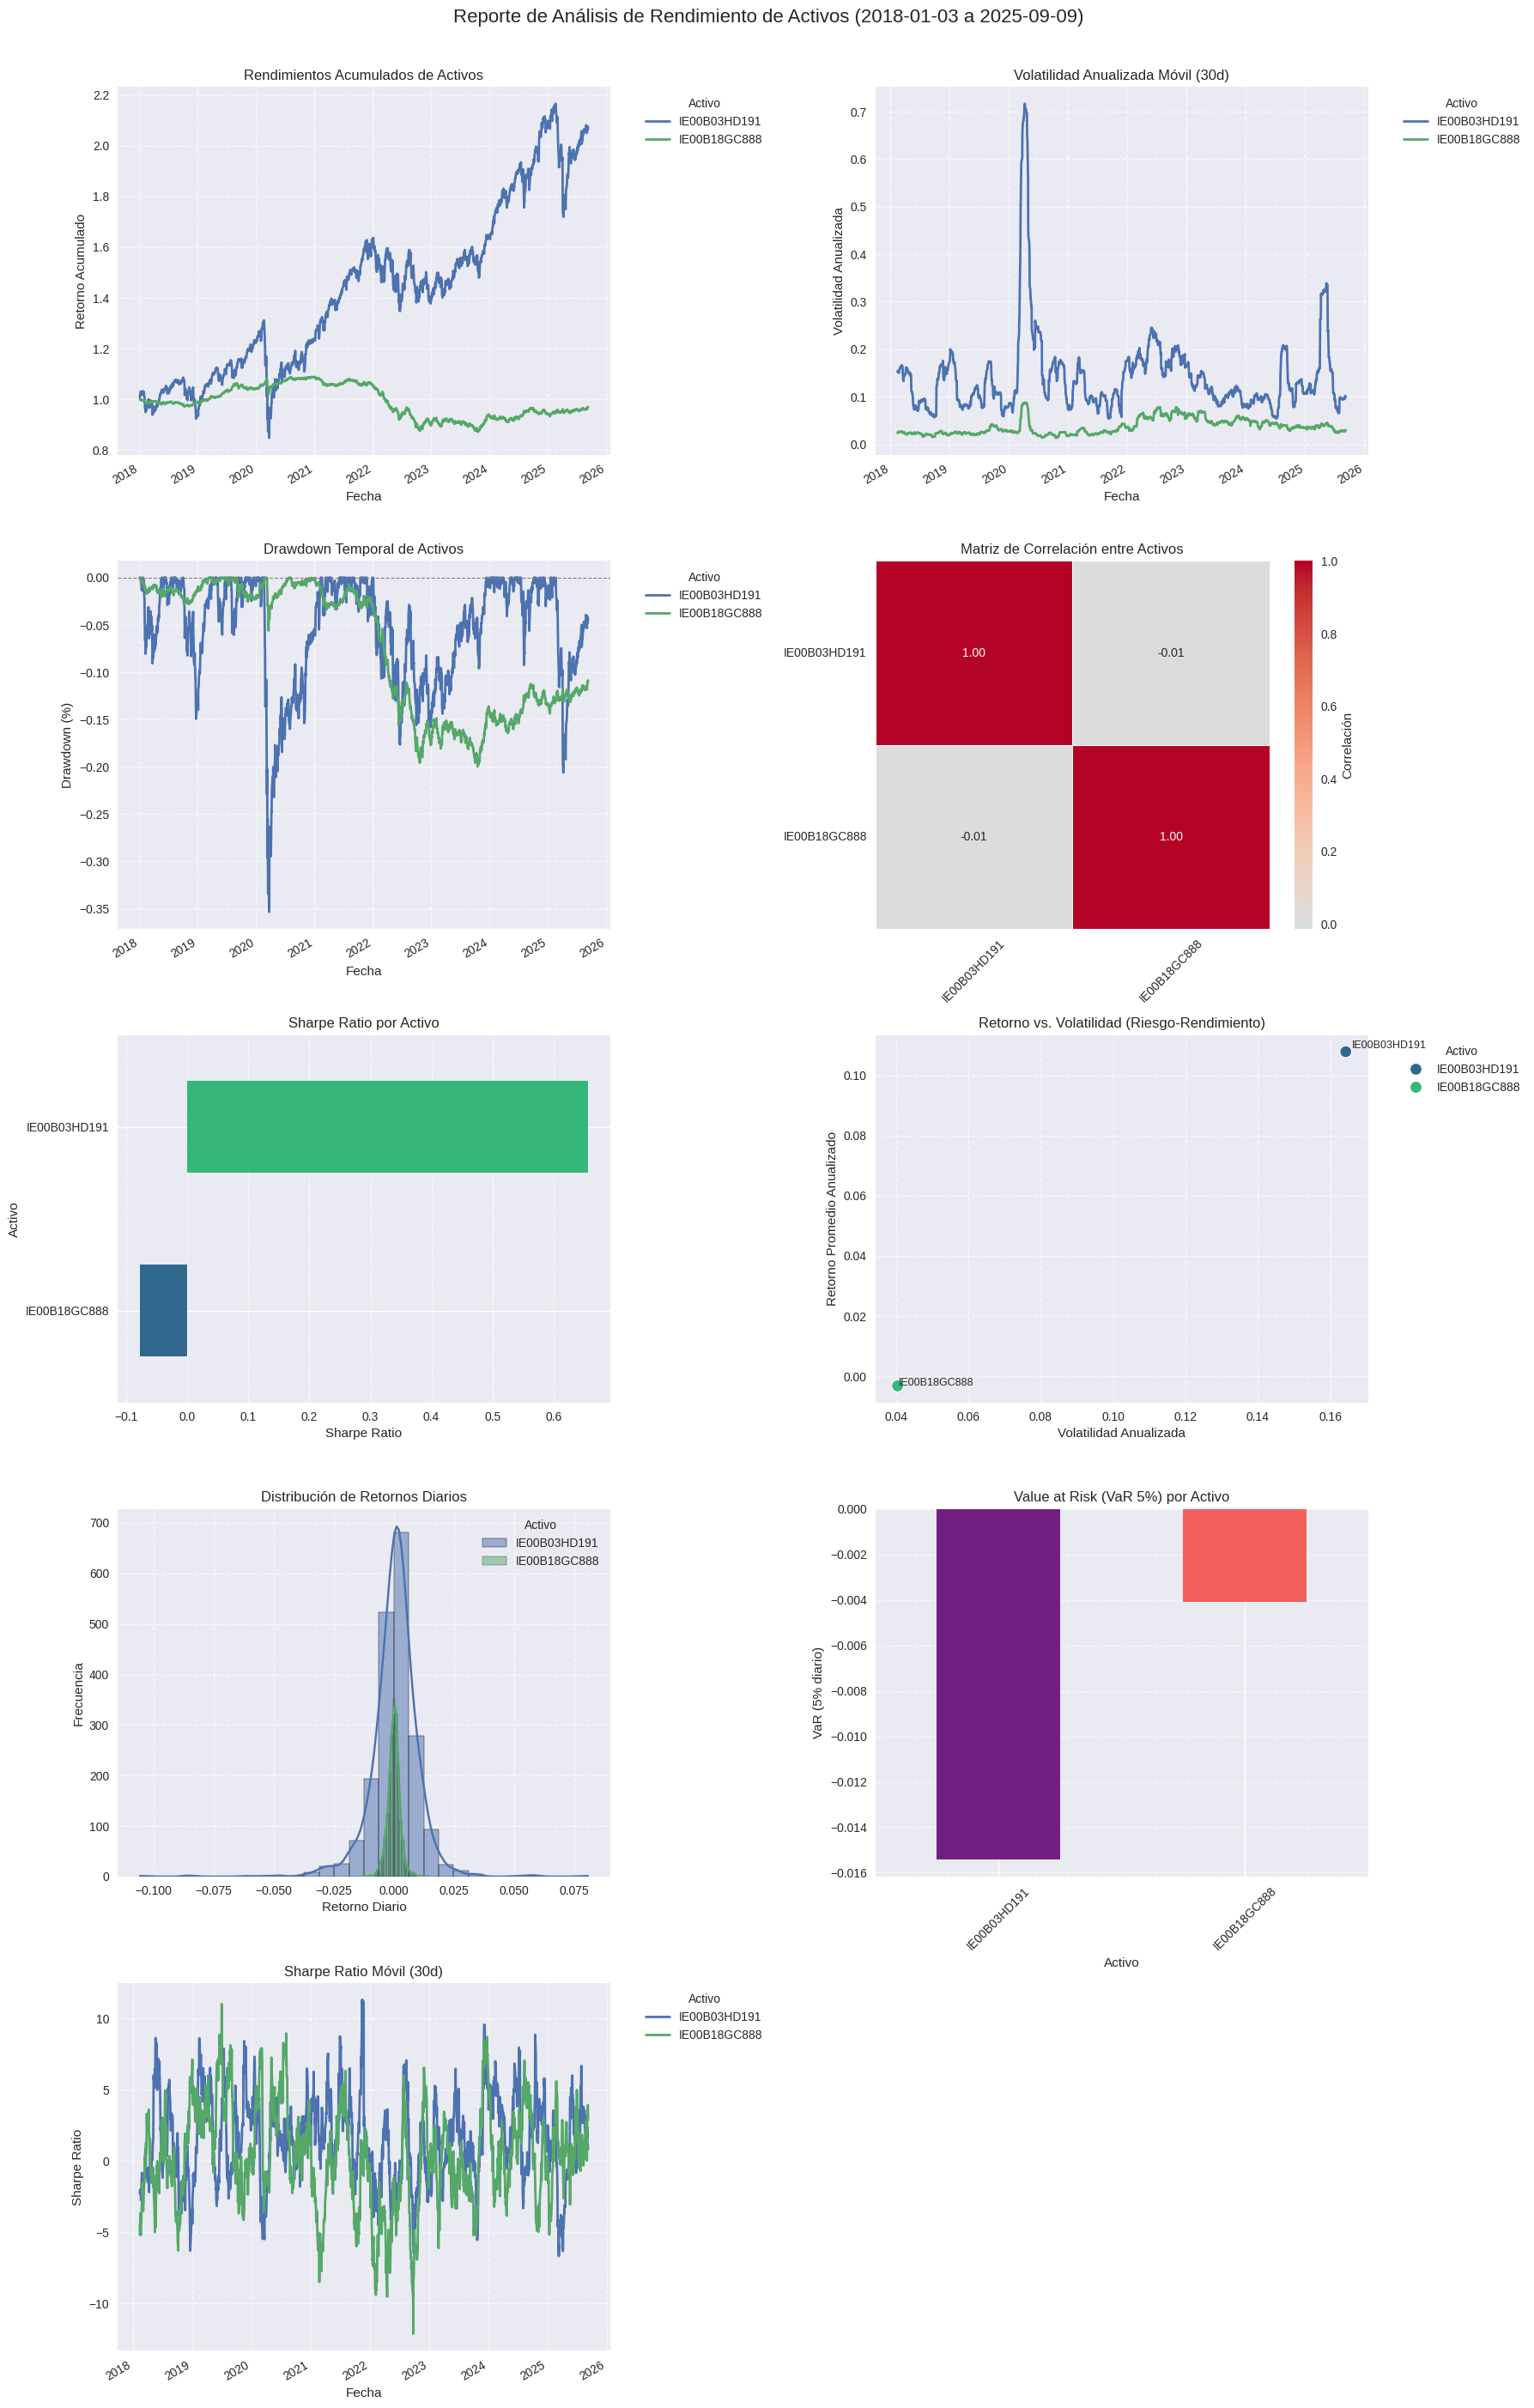

In [ ]:
# Importaciones necesarias
import os
import pprint
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import List, Dict, Optional

import pandas as pd
import os
import csv

from typing import List
from datetime import datetime

class GestorImportaciones:
    def __init__(self, ruta_base):
        self.ruta_base = ruta_base
        self.dataframes = {}
        self.nombres_importados = []
        self.df_dict = {}
        self.fecha_inicio = None
        self.fecha_fin = None

    def solicitar_rango_fechas(self):
        """Solicita al usuario un rango de fechas para filtrar los datos"""
        print("\n📅 Selección de rango de fechas")
        print("💡 Formato recomendado: YYYY-MM-DD (ej: 2023-01-01)")

        while True:
            fecha_inicio_str = input("👉 Fecha de inicio (ENTER para todas las fechas): ").strip()
            if not fecha_inicio_str:
                self.fecha_inicio = None
                break
            try:
                self.fecha_inicio = pd.to_datetime(fecha_inicio_str)
                break
            except:
                print("❌ Formato de fecha no válido. Intenta de nuevo.")

        while True:
            if self.fecha_inicio is not None:
                fecha_fin_str = input("👉 Fecha de fin (ENTER para fecha actual): ").strip()
                if not fecha_fin_str:
                    self.fecha_fin = pd.to_datetime('today')
                    break
            else:
                fecha_fin_str = input("👉 Fecha de fin (solo si especificaste fecha inicio): ").strip()
                if not fecha_fin_str:
                    self.fecha_fin = None
                    break

            try:
                self.fecha_fin = pd.to_datetime(fecha_fin_str)
                if self.fecha_inicio and self.fecha_fin < self.fecha_inicio:
                    print("❌ La fecha fin no puede ser anterior a la fecha inicio.")
                    continue
                break
            except:
                print("❌ Formato de fecha no válido. Intenta de nuevo.")

        print(f"✅ Rango seleccionado: {self.fecha_inicio} - {self.fecha_fin}")

    def filtrar_por_fechas(self, df):
        """Filtra el DataFrame según el rango de fechas seleccionado"""
        if self.fecha_inicio is not None and self.fecha_fin is not None:
            mask = (df.index >= self.fecha_inicio) & (df.index <= self.fecha_fin)
            df_filtrado = df.loc[mask]
            print(f"📊 Datos filtrados: {len(df_filtrado)} de {len(df)} observaciones")
            return df_filtrado
        elif self.fecha_inicio is not None:
            df_filtrado = df[df.index >= self.fecha_inicio]
            print(f"📊 Datos filtrados: {len(df_filtrado)} de {len(df)} observaciones")
            return df_filtrado
        else:
            print("📊 Importando todos los datos disponibles")
            return df

    def listar_subcarpetas(self):
        carpetas = [nombre for nombre in os.listdir(self.ruta_base)
                    if os.path.isdir(os.path.join(self.ruta_base, nombre))]
        print("\n📁 Carpetas disponibles:")
        for i, carpeta in enumerate(carpetas):
            print(f"[{i}] {carpeta}")
        return carpetas

    def seleccionar_carpeta(self, carpetas):
        idx_str = input("\n👉 Selecciona el número de carpeta: ")
        idx = int(idx_str)
        return os.path.join(self.ruta_base, carpetas[idx])

    def listar_csv(self, carpeta_path):
        archivos = [nombre for nombre in os.listdir(carpeta_path)
                    if nombre.endswith(".csv")]
        if not archivos:
            return []
        print("\n📄 CSV disponibles:")
        for i, archivo in enumerate(archivos):
            print(f"[{i}] {archivo}")
        return archivos

    def seleccionar_archivo(self, archivos):
        idx_str = input("\n👉 Selecciona el número de archivo: ")
        idx = int(idx_str)
        return archivos[idx]

    def importar_csv(self, carpeta_path, archivo):
        ruta = os.path.join(carpeta_path, archivo)

        try:
            with open(ruta, 'r', encoding='utf-8') as f:
                muestra = f.read(2048)
                dialecto = csv.Sniffer().sniff(muestra)
                sep_detectado = dialecto.delimiter
                dec_detectado = ',' if sep_detectado != ',' and ',' in muestra else '.'
            print(f"\n🧪 Separador detectado: '{sep_detectado}' | Decimal: '{dec_detectado}'")
        except Exception as e:
            print(f"\n⚠️ No se pudo detectar automáticamente: {e}")
            sep_detectado = input("🧪 Separador (default ','): ") or ','
            dec_detectado = input("🧪 Decimal (default '.'): ") or '.'
            print(f"\n🧪 Usando valores manuales: Separador: '{sep_detectado}' | Decimal: '{dec_detectado}'")

        try:
            df = pd.read_csv(ruta, sep=sep_detectado, decimal=dec_detectado, encoding='utf-8')
        except UnicodeDecodeError:
            print("❌ Error de codificación con UTF-8. Intentando con 'latin-1'...")
            df = pd.read_csv(ruta, sep=sep_detectado, decimal=dec_detectado, encoding='latin-1')

        # Limpiar espacios de los nombres de las columnas
        df.columns = df.columns.str.strip()
        df.dropna(how='all', inplace=True)

        if 'Date' in df.columns:
            df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True, errors='coerce')
            df.dropna(subset=['Date'], inplace=True)
            df.set_index('Date', inplace=True)
            print("✅ Conversión de fecha exitosa.")

            # Aplicar filtro de fechas
            df = self.filtrar_por_fechas(df)

        else:
            print("⚠️ Advertencia: No se encontró la columna 'Date' para convertir a índice de fecha.")
            return None, None

        nombre_df = os.path.splitext(archivo)[0]
        nombre_df = nombre_df.replace(" ", "_").replace("-", "_").replace(".", "").replace("&", "and")

        self.dataframes[nombre_df] = df

        print(f"✅ DataFrame '{nombre_df}' cargado con shape {df.shape}")

        return nombre_df, df

    def importar_multiples_csv(self):
        # Solicitar rango de fechas primero
        self.solicitar_rango_fechas()

        self.nombres_importados = []
        contador = 1
        continuar = 's'

        while continuar == 's':
            print(f"\n📁 Selección {contador}")
            carpetas = self.listar_subcarpetas()
            if not carpetas:
                print("No hay carpetas. Terminando el proceso.")
                break

            try:
                carpeta_path = self.seleccionar_carpeta(carpetas)
            except (ValueError, IndexError):
                print("❌ Selección no válida. Inténtalo de nuevo.")
                continue

            archivos = self.listar_csv(carpeta_path)
            if not archivos:
                print("⚠️ No hay archivos CSV en esta carpeta. Saltando...")
                continue

            try:
                archivo = self.seleccionar_archivo(archivos)
            except (ValueError, IndexError):
                print("❌ Selección no válida. Inténtalo de nuevo.")
                continue

            nombre_df, df = self.importar_csv(carpeta_path, archivo)
            if nombre_df:
                self.nombres_importados.append(nombre_df)

            continuar = input("\n🧭 ¿Deseas importar otro archivo? (s/n): ").strip().lower()
            while continuar not in ['s', 'n']:
                continuar = input("❓ Respuesta no válida. Escribe 's' o 'n': ").strip().lower()

            contador += 1

        self._actualizar_df_dict()

        print("\n📊 DataFrames importados:")
        for nombre in self.nombres_importados:
            try:
                shape = self.dataframes[nombre].shape
                print(f"🔹 '{nombre}' → shape: {shape}")
            except KeyError:
                print(f"🔹 '{nombre}' no pudo ser cargado.")

        print("\n✅ Proceso finalizado.")
        return self.dataframes

    def _actualizar_df_dict(self):
        self.df_dict = {k: v.copy() for k, v in self.dataframes.items()}

    def crear_dataframes_globales(self):
        nombres_dfs_global = []
        for key, value in self.dataframes.items():
            nombre_df = f'df_{key}'
            globals()[nombre_df] = value.copy()
            nombres_dfs_global.append(nombre_df)

        print("\n✅ DataFrames globales creados:")
        print(nombres_dfs_global)
        return nombres_dfs_global

    def mostrar_resumen(self):
        if not self.nombres_importados:
            print("⚠️ No hay DataFrames importados.")
            return

        print(f"\n📊 Resumen de {len(self.nombres_importados)} DataFrames importados:")
        for i, nombre in enumerate(self.nombres_importados):
            df = self.dataframes.get(nombre)
            if df is not None:
                print(f"{i+1}. '{nombre}' → shape: {df.shape} | Índice: {type(df.index).__name__}")

        if self.nombres_importados:
            primer_df_nombre = self.nombres_importados[0]
            primer_df = self.dataframes.get(primer_df_nombre)
            if primer_df is not None:
                print(f"\n🔍 Ejemplo - DataFrame '{primer_df_nombre}' (primeras 5 filas):")
                print(primer_df.head())

    def acceder_dataframe(self, nombre):
        if nombre in self.dataframes:
            return self.dataframes[nombre]
        elif f"df_{nombre}" in self.df_dict:
            return self.df_dict[f"df_{nombre}"]
        else:
            print(f"⚠️ DataFrame '{nombre}' no encontrado.")
            print(f"📋 DataFrames disponibles: {list(self.dataframes.keys())}")
            return None

    def obtener_activos_disponibles(self) -> List[str]:
        return list(self.df_dict.keys())

    def obtener_resumen(self) -> pd.DataFrame:
        resumen_list = []
        for asset, df in self.df_dict.items():
            if not df.empty:
                info = {
                    'Activo': asset,
                    'Observaciones': len(df),
                    'Fecha_Inicio': df.index.min(),
                    'Fecha_Fin': df.index.max(),
                    'Columnas': ', '.join(df.columns)
                }
                resumen_list.append(info)
            else:
                resumen_list.append({'Activo': asset, 'Observaciones': 0, 'Fecha_Inicio': None, 'Fecha_Fin': None, 'Columnas': ''})

        return pd.DataFrame(resumen_list).set_index('Activo')


class AnalizadorRendimiento:
    def __init__(self, gestor, price_column: str = 'Close', activos_seleccionados: Optional[List[str]] = None):
        self.gestor = gestor
        self.price_column = price_column

        if not self.gestor.df_dict:
            raise ValueError("El gestor no contiene datos. Importe archivos primero.")

        if activos_seleccionados is None:
            self.activos_seleccionados = list(gestor.df_dict.keys())
        else:
            self.activos_seleccionados = activos_seleccionados

        activos_disponibles = list(gestor.df_dict.keys())
        activos_invalidos = [a for a in self.activos_seleccionados if a not in activos_disponibles]
        if activos_invalidos:
            raise ValueError(f"Activos no disponibles en el gestor: {activos_invalidos}")

        self.returns_matrix = self._construir_matriz_retornos()
        self.assets = self.returns_matrix.columns.tolist()
        self.dates = self.returns_matrix.index
        self.n_assets = len(self.assets)
        self.n_periods = len(self.returns_matrix)

        self._validar_datos()
        print(f"📊 AnalizadorRendimiento inicializado:")
        print(f"    • Activos: {len(self.assets)} ({', '.join(self.assets)})")
        print(f"    • Periodo: {self.dates.min().strftime('%Y-%m-%d')} a {self.dates.max().strftime('%Y-%m-%d')}")
        print(f"    • Observaciones: {len(self.returns_matrix)}")

    def _construir_matriz_retornos(self) -> pd.DataFrame:
        print("🔧 Construyendo matriz de retornos...")
        price_data = {}
        for asset in self.activos_seleccionados:
            df = self.gestor.df_dict[asset]
            if self.price_column not in df.columns:
                print(f"⚠️ Columna '{self.price_column}' no encontrada en {asset}. Omitiendo.")
                continue
            prices = df[self.price_column].dropna()
            if len(prices) < 2:
                print(f"⚠️ {asset}: Insuficientes datos válidos, omitiendo.")
                continue
            price_data[asset] = prices
            print(f"    ✓ {asset}: {len(prices)} precios válidos")

        if not price_data:
            raise ValueError("No hay suficientes datos válidos para ningún activo.")

        prices_df = pd.DataFrame(price_data).sort_index()
        returns_df = np.log(prices_df / prices_df.shift(1)).dropna()
        print(f"    ✅ Matriz de retornos: {returns_df.shape}")
        return returns_df

    def _validar_datos(self):
        if self.returns_matrix.empty:
            raise ValueError("La matriz de retornos está vacía.")

        if self.returns_matrix.isnull().all().any():
            raise ValueError("Algunos activos tienen todos los valores nulos.")

        null_pct = self.returns_matrix.isnull().sum() / len(self.returns_matrix) * 100
        if null_pct.any():
            print(f"⚠️ Valores nulos encontrados:")
            for asset, pct in null_pct[null_pct > 0].items():
                print(f"    {asset}: {pct:.1f}%")

    def obtener_precios_originales(self) -> pd.DataFrame:
        price_data = {asset: self.gestor.df_dict[asset][self.price_column] for asset in self.assets}
        return pd.DataFrame(price_data).sort_index()

    def actualizar_activos(self, nuevos_activos: List[str]):
        print(f"🔄 Actualizando activos: {nuevos_activos}")

        activos_disponibles = list(self.gestor.df_dict.keys())
        activos_invalidos = [a for a in nuevos_activos if a not in activos_disponibles]
        if activos_invalidos:
            raise ValueError(f"Activos no disponibles: {activos_invalidos}")

        self.activos_seleccionados = nuevos_activos
        self.returns_matrix = self._construir_matriz_retornos()
        self.assets = self.returns_matrix.columns.tolist()
        self.dates = self.returns_matrix.index
        self.n_assets = len(self.assets)
        self.n_periods = len(self.returns_matrix)

        self._validar_datos()
        print("✅ Activos actualizados exitosamente.")

    def calcular_metricas_basicas(self) -> pd.DataFrame:
        metricas = pd.DataFrame(index=self.assets)
        metricas['Retorno_Promedio'] = self.returns_matrix.mean() * 252
        metricas['Volatilidad'] = self.returns_matrix.std() * np.sqrt(252)
        metricas['Sharpe_Ratio'] = metricas['Retorno_Promedio'] / metricas['Volatilidad']
        metricas['Retorno_Acumulado'] = (1 + self.returns_matrix).prod() - 1
        metricas['Max_Drawdown'] = self._calcular_max_drawdown()
        metricas['Sesgo'] = self.returns_matrix.skew()
        metricas['Curtosis'] = self.returns_matrix.kurtosis()
        metricas['VaR_5%'] = self.returns_matrix.quantile(0.05)
        return metricas.round(4)

    def _calcular_max_drawdown(self) -> pd.Series:
        max_dd = pd.Series(index=self.assets)
        for asset in self.assets:
            cum_returns = (1 + self.returns_matrix[asset]).cumprod()
            running_max = cum_returns.expanding().max()
            drawdown = (cum_returns - running_max) / running_max
            max_dd[asset] = drawdown.min()
        return max_dd

    def comparar_activos(self, activos: Optional[List[str]] = None):
        if activos is None:
            activos = self.assets
        if not all(activo in self.assets for activo in activos):
            activos_invalidos = [a for a in activos if a not in self.assets]
            raise ValueError(f"Activos no disponibles para comparación: {activos_invalidos}")

        subset_returns = self.returns_matrix[activos]
        correlacion = subset_returns.corr()
        cum_returns = (1 + subset_returns).cumprod()
        metricas = self.calcular_metricas_basicas().loc[activos]
        ranking = metricas.sort_values('Sharpe_Ratio', ascending=False)
        stats_comparacion = {
            'mejor_rendimiento': metricas['Retorno_Acumulado'].idxmax(),
            'menor_volatilidad': metricas['Volatilidad'].idxmin(),
            'mejor_sharpe': metricas['Sharpe_Ratio'].idxmax(),
            'menor_drawdown': metricas['Max_Drawdown'].idxmax()
        }
        return {
            'correlacion': correlacion,
            'rendimientos_acumulados': cum_returns,
            'ranking': ranking,
            'estadisticas': stats_comparacion,
            'metricas_detalladas': metricas
        }

    def analizar_evolucion_temporal(self, ventana: int = 30):
        volatilidad_movil = self.returns_matrix.rolling(window=ventana).std() * np.sqrt(252)
        retorno_movil = self.returns_matrix.rolling(window=ventana).mean() * 252
        sharpe_movil = retorno_movil / volatilidad_movil
        cum_returns = (1 + self.returns_matrix).cumprod()
        drawdown_temporal = {}
        for asset in self.assets:
            running_max = cum_returns[asset].expanding().max()
            drawdown_temporal[asset] = (cum_returns[asset] - running_max) / running_max
        drawdown_df = pd.DataFrame(drawdown_temporal, index=self.dates)
        vol_promedio = volatilidad_movil.mean()
        regimenes = {
            asset: {
                'alta_volatilidad': (volatilidad_movil[asset] > vol_promedio[asset]).sum(),
                'baja_volatilidad': (volatilidad_movil[asset] <= vol_promedio[asset]).sum()
            }
            for asset in self.assets
        }
        return {
            'volatilidad_movil': volatilidad_movil,
            'retorno_movil': retorno_movil,
            'sharpe_movil': sharpe_movil,
            'rendimientos_acumulados': cum_returns,
            'drawdown_temporal': drawdown_df,
            'regimenes_volatilidad': regimenes
        }

    def generar_reporte_completo(self) -> Dict:
        print("📊 Generando reporte completo...")
        metricas_basicas = self.calcular_metricas_basicas()
        comparacion = self.comparar_activos()
        evolucion = self.analizar_evolucion_temporal()
        info_gestor = self.gestor.obtener_resumen()
        resumen = {
            'mejor_activo_general': metricas_basicas['Sharpe_Ratio'].idxmax(),
            'activo_mas_volatil': metricas_basicas['Volatilidad'].idxmax(),
            'activo_menos_volatil': metricas_basicas['Volatilidad'].idxmin(),
            'mejor_retorno_acumulado': metricas_basicas['Retorno_Acumulado'].idxmax(),
            'correlacion_promedio': comparacion['correlacion'].mean().mean(),
            'periodo_analisis': f"{self.dates.min().strftime('%Y-%m-%d')} a {self.dates.max().strftime('%Y-%m-%d')}",
            'activos_analizados': len(self.assets),
            'observaciones_totales': len(self.returns_matrix)
        }
        return {
            'metricas_basicas': metricas_basicas,
            'comparacion': comparacion,
            'evolucion_temporal': evolucion,
            'info_gestor': info_gestor,
            'resumen_ejecutivo': resumen
        }

    def visualizar_resultados(self, resultado: Dict, mostrar_graficos: bool = True):
        if not mostrar_graficos:
            return
        plt.style.use('seaborn-v0_8')
        fig = plt.figure(figsize=(18, 28))
        metricas = resultado['metricas_basicas']
        cum_returns = resultado['evolucion_temporal']['rendimientos_acumulados']
        vol_movil = resultado['evolucion_temporal']['volatilidad_movil']
        drawdown_temporal = resultado['evolucion_temporal']['drawdown_temporal']
        corr = resultado['comparacion']['correlacion']
        ax1 = plt.subplot(5, 2, 1)
        cum_returns.plot(ax=ax1, title='Rendimientos Acumulados de Activos', linewidth=2)
        ax1.set_ylabel('Retorno Acumulado')
        ax1.set_xlabel('Fecha')
        ax1.legend(title='Activo', bbox_to_anchor=(1.05, 1), loc='upper left')
        ax1.grid(True, linestyle='--', alpha=0.7)
        ax2 = plt.subplot(5, 2, 2)
        vol_movil.plot(ax=ax2, title='Volatilidad Anualizada Móvil (30d)', linewidth=2)
        ax2.set_ylabel('Volatilidad Anualizada')
        ax2.set_xlabel('Fecha')
        ax2.legend(title='Activo', bbox_to_anchor=(1.05, 1), loc='upper left')
        ax2.grid(True, linestyle='--', alpha=0.7)
        ax3 = plt.subplot(5, 2, 3)
        drawdown_temporal.plot(ax=ax3, title='Drawdown Temporal de Activos', linewidth=2)
        ax3.set_ylabel('Drawdown (%)')
        ax3.set_xlabel('Fecha')
        ax3.axhline(0, color='grey', linestyle='--', linewidth=0.8)
        ax3.legend(title='Activo', bbox_to_anchor=(1.05, 1), loc='upper left')
        ax3.grid(True, linestyle='--', alpha=0.7)
        ax4 = plt.subplot(5, 2, 4)
        sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, ax=ax4,
                    fmt=".2f", linewidths=.5, cbar_kws={'label': 'Correlación'})
        ax4.set_title('Matriz de Correlación entre Activos')
        ax4.tick_params(axis='x', rotation=45)
        ax4.tick_params(axis='y', rotation=0)
        ax5 = plt.subplot(5, 2, 5)
        sharpe = metricas['Sharpe_Ratio'].sort_values(ascending=True)
        sharpe.plot(kind='barh', ax=ax5, title='Sharpe Ratio por Activo', color=sns.color_palette("viridis", len(sharpe)))
        ax5.set_xlabel('Sharpe Ratio')
        ax5.set_ylabel('Activo')
        ax5.grid(axis='x', linestyle='--', alpha=0.7)
        ax6 = plt.subplot(5, 2, 6)
        sns.scatterplot(x='Volatilidad', y='Retorno_Promedio', data=metricas, ax=ax6,
                        s=100, hue=metricas.index, palette='viridis')
        for i, activo in enumerate(metricas.index):
            ax6.annotate(activo, (metricas['Volatilidad'].iloc[i] * 1.01, metricas['Retorno_Promedio'].iloc[i] * 1.01),
                         fontsize=9)
        ax6.set_xlabel('Volatilidad Anualizada')
        ax6.set_ylabel('Retorno Promedio Anualizado')
        ax6.set_title('Retorno vs. Volatilidad (Riesgo-Rendimiento)')
        ax6.grid(True, linestyle='--', alpha=0.7)
        ax6.legend(title='Activo', bbox_to_anchor=(1.05, 1), loc='upper left')
        ax7 = plt.subplot(5, 2, 7)
        for asset in self.assets:
            sns.histplot(self.returns_matrix[asset], kde=True, ax=ax7, label=asset, alpha=0.5, bins=30)
        ax7.set_title('Distribución de Retornos Diarios')
        ax7.set_xlabel('Retorno Diario')
        ax7.set_ylabel('Frecuencia')
        ax7.legend(title='Activo')
        ax7.grid(True, linestyle='--', alpha=0.7)
        ax8 = plt.subplot(5, 2, 8)
        var_data = metricas['VaR_5%'].sort_values()
        var_data.plot(kind='bar', ax=ax8, title='Value at Risk (VaR 5%) por Activo',
                      color=sns.color_palette("magma", len(var_data)))
        ax8.set_ylabel('VaR (5% diario)')
        ax8.set_xlabel('Activo')
        ax8.tick_params(axis='x', rotation=45)
        ax8.grid(axis='y', linestyle='--', alpha=0.7)
        ax9 = plt.subplot(5, 2, 9)
        sharpe_movil = resultado['evolucion_temporal']['sharpe_movil']
        sharpe_movil.plot(ax=ax9, title='Sharpe Ratio Móvil (30d)', linewidth=2)
        ax9.set_ylabel('Sharpe Ratio')
        ax9.set_xlabel('Fecha')
        ax9.legend(title='Activo', bbox_to_anchor=(1.05, 1), loc='upper left')
        ax9.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout(rect=[0, 0, 1, 0.98])
        fig.suptitle(f'Reporte de Análisis de Rendimiento de Activos ({self.dates.min().strftime("%Y-%m-%d")} a {self.dates.max().strftime("%Y-%m-%d")})',
                     fontsize=16, y=1.00)
        plt.show()

# Imprimir reporte legible.
def imprimir_reporte_legible(resultado: Dict):
    """
    Imprime un reporte de análisis de rendimiento en un formato legible.
    """
    print("\n" + "="*80)
    print("📊 REPORTE DE ANÁLISIS DE RENDIMIENTO DE ACTIVOS".center(80))
    print("="*80)
    resumen = resultado['resumen_ejecutivo']
    print("\n### 📝 Resumen Ejecutivo")
    print(f"• Periodo de Análisis: {resumen['periodo_analisis']}")
    print(f"• Activo con el mejor rendimiento acumulado: {resumen['mejor_retorno_acumulado']}")
    print(f"• Activo con el mejor Sharpe Ratio: {resumen['mejor_activo_general']}")
    print(f"• Activo más Volátil: {resumen['activo_mas_volatil']}")
    print(f"• Activo menos Volátil: {resumen['activo_menos_volatil']}")
    print(f"• Correlación Promedio entre Activos: {resumen['correlacion_promedio']:.2f}")
    print("\n### 📈 Métricas de Rendimiento por Activo")
    metricas = resultado['metricas_basicas']
    print(metricas.to_markdown(numalign="left", stralign="left"))
    print("\n### 📉 Matriz de Correlación")
    correlacion = resultado['comparacion']['correlacion']
    print(correlacion.to_markdown(numalign="left", stralign="left"))
    print("\n" + "="*80)
    print("✅ Fin del reporte.".center(80))
    print("="*80)

if __name__ == "__main__":
    # Configuración de rutas
    RUTA_BASE_DATOS = '/home/enri/Estrategia_bogleheads/Datos'

    if not os.path.exists(RUTA_BASE_DATOS):
        print(f"⚠️ Error: La ruta base '{RUTA_BASE_DATOS}' no existe.")
        print("Por favor, actualiza la variable RUTA_BASE_DATOS con la ruta correcta.")
    else:
        # === FASE 1: IMPORTACIÓN DE TODOS LOS DATOS (sin filtrar) ===
        print("🚀 Iniciando proceso de importación de datos...")
        gestor = GestorImportaciones(RUTA_BASE_DATOS)
        # Importa los datos, pero no filtres las fechas aquí
        gestor.importar_multiples_csv()
        gestor.mostrar_resumen()

        while True:
            # === FASE 2: SELECCIÓN Y FILTRADO DE RANGO DE ANÁLISIS ===
            print("\n⚙️ Por favor, ingrese el rango de fechas para el análisis:")

            # CORRECCIÓN: Obtener el rango completo de fechas de todos los datos importados
            if not gestor.df_dict:
                print("⛔ No se encontraron datos importados. Terminando la ejecución.")
                break

            # Calcular correctamente las fechas mínimas y máximas
            fechas_min = [df.index.min() for df in gestor.df_dict.values()]
            fechas_max = [df.index.max() for df in gestor.df_dict.values()]

            fecha_min_disponible = min(fechas_min)
            fecha_max_disponible = max(fechas_max)

            print(f"Rango de datos disponibles: desde {fecha_min_disponible.date()} hasta {fecha_max_disponible.date()}")

            try:
                inicio_str = input(f"Fecha de inicio (YYYY-MM-DD) [por defecto: {fecha_min_disponible.date()}]: ") or str(fecha_min_disponible.date())
                fin_str = input(f"Fecha de fin (YYYY-MM-DD) [por defecto: {fecha_max_disponible.date()}]: ") or str(fecha_max_disponible.date())

                inicio = pd.to_datetime(inicio_str)
                fin = pd.to_datetime(fin_str)

                if inicio > fin:
                    print("❌ Error: La fecha de inicio debe ser anterior a la fecha de fin. Inténtelo de nuevo.")
                    continue

                if inicio < fecha_min_disponible or fin > fecha_max_disponible:
                    print(f"❌ Error: Rango de fechas fuera de los datos disponibles ({fecha_min_disponible.date()} - {fecha_max_disponible.date()}). Inténtelo de nuevo.")
                    continue

            except Exception as e:
                print(f"❌ Error: Formato de fecha incorrecto. Detalle: {e}. Inténtelo de nuevo.")
                continue

            # Filtrar los datos del gestor con el rango de fechas seleccionado
            gestor_filtrado = GestorImportaciones(gestor.ruta_base)
            gestor_filtrado.df_dict = {
                activo: df.loc[inicio:fin]
                for activo, df in gestor.df_dict.items()
            }

            # === FASE 3: ANÁLISIS DEL RENDIMIENTO ===
            try:
                analizador = AnalizadorRendimiento(gestor_filtrado)

                # === FASE 4: GENERACIÓN Y VISUALIZACIÓN DEL REPORTE ===
                reporte = analizador.generar_reporte_completo()
                imprimir_reporte_legible(reporte)
                analizador.visualizar_resultados(reporte)

            except ValueError as ve:
                print(f"❌ Error de análisis: {ve}")

            # Preguntar al usuario si desea realizar otro análisis
            continuar = input("\n¿Desea realizar otro análisis? (s/n): ").lower()
            if continuar != 's':
                print("👋 ¡Hasta luego!")
                break

# Rebalanceo automático versus Buy & Hold.

📊 Comparador de Estrategias inicializado

💰 CONFIGURACIÓN DE INVERSIÓN


Ingrese la inversión inicial (€):  10000



📅 CONFIGURACIÓN DE FRECUENCIA
Opciones disponibles:
1. monthly (mensual)
2. quarterly (trimestral) - RECOMENDADO
3. yearly (anual)


Seleccione frecuencia (1/2/3) o escriba directamente:  2



💸 CONFIGURACIÓN DE COSTOS


Costo de transacción (%) [default: 0.15%]:  0.15



📅 SELECCIÓN DE RANGO DE FECHAS
📆 Rango disponible: 2018-01-02 hasta 2025-09-04


Ingrese fecha de inicio (YYYY-MM-DD):  2018-01-02
Ingrese fecha de fin (YYYY-MM-DD):  2025-09-04



🎯 CONFIGURACIÓN DE PESOS OBJETIVO
Valores disponibles: ['vliq_IE00B03HD191', 'vliq_IE00B18GC888']



Ingrese el peso para vliq_IE00B03HD191 (0-1, peso restante: 1.00):  0.25



📊 Peso automático para vliq_IE00B18GC888: 0.7500 (peso restante)

✅ Pesos objetivo finales:
   vliq_IE00B03HD191: 0.2500 (25.00%)
   vliq_IE00B18GC888: 0.7500 (75.00%)

🎯 COMPARANDO ESTRATEGIAS
📅 Período: 2018-01-02 a 2025-09-04
💰 Inversión inicial: €10,000.0
🎯 Pesos objetivo: {'vliq_IE00B03HD191': 0.25, 'vliq_IE00B18GC888': 0.75}

🔍 Preparando datos desde 2018-01-02 hasta 2025-09-04...
✅ vliq_IE00B03HD191: 1946 días
✅ vliq_IE00B18GC888: 1946 días
📊 Datos preparados: 1946 días, 2 fondos

💎 SIMULANDO BUY & HOLD...
   vliq_IE00B03HD191: €2,496 → 109.37 participaciones
   vliq_IE00B18GC888: €7,489 → 73.06 participaciones

⚖️ SIMULANDO REBALANCEO (QUARTERLY)...

📊 RESULTADOS COMPARATIVOS
MÉTRICA                   BUY & HOLD      REBALANCEO      DIFERENCIA     
--------------------------------------------------------------------------------
Capital Final             €       13,035 €       12,329 €         -705
Rentabilidad Total                 30.3%          23.3%          -7.1%
Rentabili

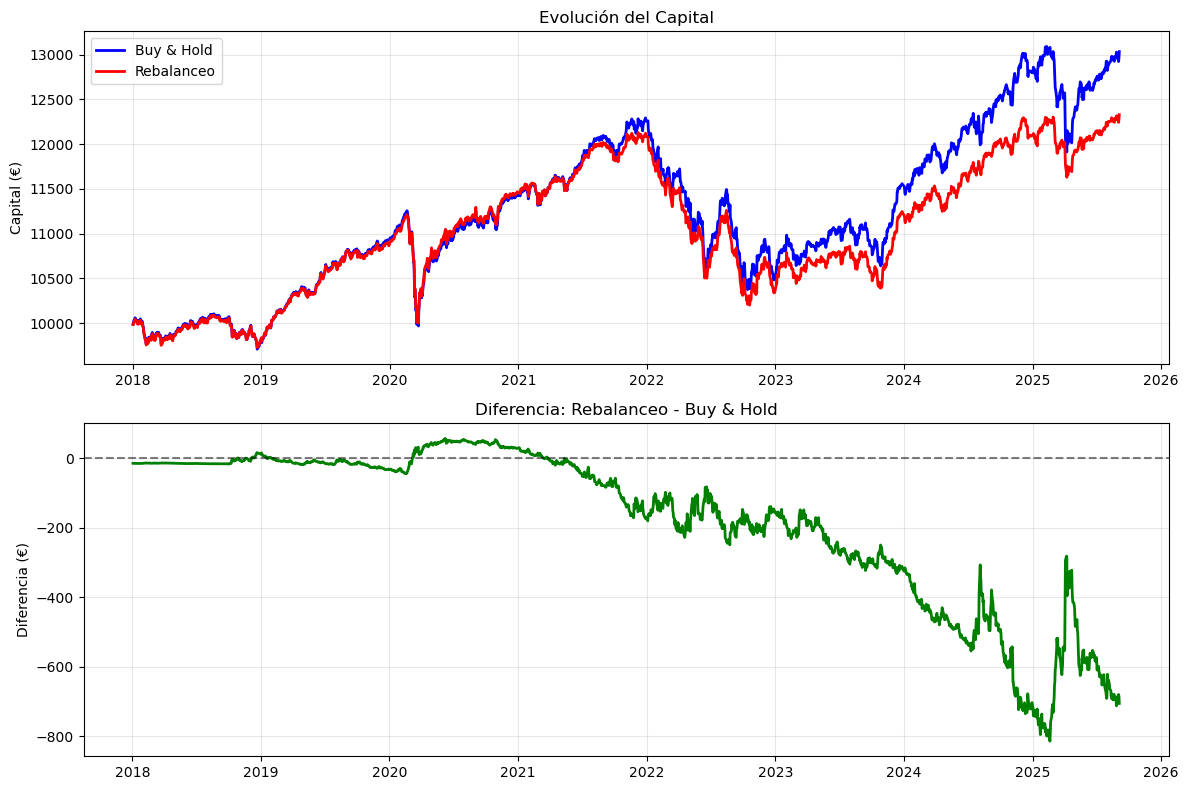

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from typing import Dict, List, Optional
import warnings
warnings.filterwarnings('ignore')

class ComparadorEstrategias:
    def __init__(self, gestor):
        """
        Clase para comparar estrategia de rebalanceo vs Buy & Hold
        """
        self.gestor = gestor
        self.df_dict = gestor.df_dict
        print("📊 Comparador de Estrategias inicializado")

    def solicitar_rango_fechas(self) -> tuple:
        """
        Pide al usuario el rango de fechas para el análisis (copiado de tu código original).
        """
        print("\n📅 SELECCIÓN DE RANGO DE FECHAS")
        print("=" * 40)

        # Encontrar fechas mínimas y máximas disponibles
        todas_fechas = []
        for df in self.df_dict.values():
            if not df.empty and hasattr(df, 'index'):
                todas_fechas.extend(df.index)

        if not todas_fechas:
            raise ValueError("❌ No hay fechas disponibles en los datos")

        fecha_min = pd.to_datetime(min(todas_fechas)).strftime('%Y-%m-%d')
        fecha_max = pd.to_datetime(max(todas_fechas)).strftime('%Y-%m-%d')

        print(f"📆 Rango disponible: {fecha_min} hasta {fecha_max}")

        while True:
            try:
                inicio = input("Ingrese fecha de inicio (YYYY-MM-DD): ").strip()
                fin = input("Ingrese fecha de fin (YYYY-MM-DD): ").strip()

                inicio_dt = pd.to_datetime(inicio)
                fin_dt = pd.to_datetime(fin)

                if inicio_dt >= fin_dt:
                    print("❌ La fecha de inicio debe ser anterior a la fecha de fin")
                    continue

                if inicio_dt < pd.to_datetime(fecha_min) or fin_dt > pd.to_datetime(fecha_max):
                    print(f"❌ Fechas fuera del rango disponible: {fecha_min} a {fecha_max}")
                    continue

                return inicio_dt, fin_dt

            except ValueError:
                print("❌ Formato de fecha incorrecto. Use YYYY-MM-DD")

    def solicitar_pesos_objetivo(self):
        """
        Solicita al usuario los pesos objetivo para cada valor (copiado de tu código original).
        """
        disponibles = list(self.df_dict.keys())
        print(f"\n🎯 CONFIGURACIÓN DE PESOS OBJETIVO")
        print("=" * 40)
        print("Valores disponibles:", disponibles)

        pesos_objetivo = {}
        peso_restante = 1.0

        for i, valor in enumerate(disponibles):
            if i < len(disponibles) - 1:
                while True:
                    try:
                        peso = float(input(f"\nIngrese el peso para {valor} (0-1, peso restante: {peso_restante:.2f}): "))
                        if 0 <= peso <= peso_restante:
                            pesos_objetivo[valor] = peso
                            peso_restante -= peso
                            break
                        else:
                            print(f"❌ Peso debe estar entre 0 y {peso_restante:.2f}")
                    except ValueError:
                        print("❌ Por favor ingrese un número válido")
            else:
                pesos_objetivo[valor] = peso_restante
                print(f"\n📊 Peso automático para {valor}: {peso_restante:.4f} (peso restante)")

        # Normalizar
        total = sum(pesos_objetivo.values())
        if not np.isclose(total, 1.0):
            pesos_objetivo = {k: v/total for k, v in pesos_objetivo.items()}

        print(f"\n✅ Pesos objetivo finales:")
        for valor, peso in pesos_objetivo.items():
            print(f"   {valor}: {peso:.4f} ({peso*100:.2f}%)")

        return pesos_objetivo

    def preparar_datos(self, inicio: datetime, fin: datetime, fondos: List[str]) -> pd.DataFrame:
        """
        Prepara los datos de precios para el análisis
        """
        print(f"\n🔍 Preparando datos desde {inicio.strftime('%Y-%m-%d')} hasta {fin.strftime('%Y-%m-%d')}...")

        precios = pd.DataFrame()

        for fondo in fondos:
            if fondo in self.df_dict and not self.df_dict[fondo].empty:
                df_fondo = self.df_dict[fondo]
                df_filtrado = df_fondo.loc[(df_fondo.index >= inicio) & (df_fondo.index <= fin)]

                if 'Close' in df_filtrado.columns:
                    precios[fondo] = df_filtrado['Close']
                    print(f"✅ {fondo}: {len(df_filtrado)} días")
                else:
                    print(f"❌ {fondo}: No tiene columna 'Close'")
            else:
                print(f"❌ {fondo}: No encontrado")

        precios.dropna(inplace=True)
        precios.sort_index(inplace=True)

        print(f"📊 Datos preparados: {len(precios)} días, {len(precios.columns)} fondos")
        return precios

    def estrategia_buy_hold(self, precios: pd.DataFrame, pesos: Dict[str, float],
                           inversion_inicial: float, costo_transaccion: float = 0.0015) -> Dict:
        """
        Simula estrategia Buy & Hold (comprar y mantener)
        """
        print("\n💎 SIMULANDO BUY & HOLD...")

        # Costo inicial de compra
        costo_inicial = inversion_inicial * costo_transaccion
        capital_invertido = inversion_inicial - costo_inicial

        # Inversión inicial por fondo
        fondos = list(pesos.keys())
        inversion_por_fondo = {}
        acciones_por_fondo = {}

        precio_inicial = precios.iloc[0]

        for fondo in fondos:
            inversion_fondo = capital_invertido * pesos[fondo]
            acciones_fondo = inversion_fondo / precio_inicial[fondo]

            inversion_por_fondo[fondo] = inversion_fondo
            acciones_por_fondo[fondo] = acciones_fondo

            print(f"   {fondo}: €{inversion_fondo:,.0f} → {acciones_fondo:,.2f} participaciones")

        # Evolución del portafolio día a día
        evolucion_capital = pd.Series(index=precios.index, dtype=float)

        for fecha in precios.index:
            precios_fecha = precios.loc[fecha]
            valor_total = sum(acciones_por_fondo[fondo] * precios_fecha[fondo]
                            for fondo in fondos)
            evolucion_capital[fecha] = valor_total

        capital_final = evolucion_capital.iloc[-1]
        rentabilidad_total = (capital_final / inversion_inicial - 1) * 100

        dias = len(precios)
        rentabilidad_anualizada = ((capital_final / inversion_inicial) ** (252 / dias) - 1) * 100

        return {
            'estrategia': 'Buy & Hold',
            'capital_inicial': inversion_inicial,
            'capital_final': capital_final,
            'rentabilidad_total': rentabilidad_total,
            'rentabilidad_anualizada': rentabilidad_anualizada,
            'costos_transaccion': costo_inicial,
            'evolucion_capital': evolucion_capital,
            'rebalanceos': 0,
            'acciones_por_fondo': acciones_por_fondo,
            'inversion_por_fondo': inversion_por_fondo
        }

    def estrategia_rebalanceo(self, precios: pd.DataFrame, pesos: Dict[str, float],
                             inversion_inicial: float, frecuencia: str = 'quarterly',
                             costo_transaccion: float = 0.0015) -> Dict:
        """
        Simula estrategia con rebalanceo periódico
        """
        print(f"\n⚖️ SIMULANDO REBALANCEO ({frecuencia.upper()})...")

        # Calcular rendimientos logarítmicos
        rendimientos = np.log(precios / precios.shift(1)).dropna()

        # Fechas de rebalanceo
        if frecuencia == 'monthly':
            fechas_rebalanceo = pd.to_datetime(rendimientos.index).to_period('M').unique().to_timestamp()
        elif frecuencia == 'quarterly':
            fechas_rebalanceo = pd.to_datetime(rendimientos.index).to_period('Q').unique().to_timestamp()
        elif frecuencia == 'yearly':
            fechas_rebalanceo = pd.to_datetime(rendimientos.index).to_period('Y').unique().to_timestamp()

        # Variables de simulación
        evolucion_capital = pd.Series(index=rendimientos.index, dtype=float)
        capital_actual = inversion_inicial
        costos_totales = 0
        contador_rebalanceos = 0

        fondos = list(pesos.keys())
        pesos_array = np.array([pesos[fondo] for fondo in fondos])

        # Simulación día a día
        for i, fecha in enumerate(rendimientos.index):
            if i == 0:
                # Día inicial: invertir según pesos objetivo
                costo_inicial = inversion_inicial * costo_transaccion
                capital_actual -= costo_inicial
                costos_totales += costo_inicial
                contador_rebalanceos += 1

                valores_activos = pd.Series((inversion_inicial - costo_inicial) * pesos_array,
                                          index=fondos)
            else:
                # Actualizar valores con rendimientos del día
                rendimientos_dia = rendimientos.loc[fecha]
                valores_activos = valores_activos * np.exp(rendimientos_dia)
                capital_actual = valores_activos.sum()

                # Rebalancear si corresponde
                if fecha in fechas_rebalanceo and i > 0:
                    valores_objetivo = capital_actual * pesos_array
                    monto_rebalanceo = np.abs(valores_objetivo - valores_activos).sum()

                    costo_rebalanceo = monto_rebalanceo * costo_transaccion
                    costos_totales += costo_rebalanceo
                    contador_rebalanceos += 1

                    valores_activos = pd.Series(valores_objetivo, index=fondos)
                    capital_actual -= costo_rebalanceo

            evolucion_capital[fecha] = capital_actual

        capital_final = evolucion_capital.iloc[-1]
        rentabilidad_total = (capital_final / inversion_inicial - 1) * 100

        dias = len(rendimientos)
        rentabilidad_anualizada = ((capital_final / inversion_inicial) ** (252 / dias) - 1) * 100

        return {
            'estrategia': f'Rebalanceo {frecuencia}',
            'capital_inicial': inversion_inicial,
            'capital_final': capital_final,
            'rentabilidad_total': rentabilidad_total,
            'rentabilidad_anualizada': rentabilidad_anualizada,
            'costos_transaccion': costos_totales,
            'evolucion_capital': evolucion_capital,
            'rebalanceos': contador_rebalanceos,
            'fechas_rebalanceo': fechas_rebalanceo
        }

    def comparar_estrategias(self, inicio: datetime = None, fin: datetime = None,
                           pesos: Dict[str, float] = None, inversion_inicial: float = 100000,
                           frecuencia: str = 'quarterly', costo_transaccion: float = 0.0015) -> Dict:
        """
        Compara ambas estrategias y muestra resultados
        """
        # Solicitar fechas si no se proporcionan
        if inicio is None or fin is None:
            inicio, fin = self.solicitar_rango_fechas()

        # Solicitar pesos si no se proporcionan
        if pesos is None:
            pesos = self.solicitar_pesos_objetivo()

        print(f"\n🎯 COMPARANDO ESTRATEGIAS")
        print("=" * 60)
        print(f"📅 Período: {inicio.strftime('%Y-%m-%d')} a {fin.strftime('%Y-%m-%d')}")
        print(f"💰 Inversión inicial: €{inversion_inicial:,}")
        print(f"🎯 Pesos objetivo: {pesos}")

        fondos = list(pesos.keys())

        # Preparar datos
        precios = self.preparar_datos(inicio, fin, fondos)

        if precios.empty:
            raise ValueError("❌ No hay datos disponibles para el período seleccionado")

        # Ejecutar ambas estrategias
        resultado_buy_hold = self.estrategia_buy_hold(precios, pesos, inversion_inicial, costo_transaccion)
        resultado_rebalanceo = self.estrategia_rebalanceo(precios, pesos, inversion_inicial, frecuencia, costo_transaccion)

        # Mostrar resultados comparativos
        self._mostrar_comparacion(resultado_buy_hold, resultado_rebalanceo)

        # Crear gráfico
        self._crear_grafico_comparacion(resultado_buy_hold, resultado_rebalanceo)

        return {
            'buy_hold': resultado_buy_hold,
            'rebalanceo': resultado_rebalanceo,
            'precios': precios,
            'periodo': {'inicio': inicio, 'fin': fin}
        }

    def _mostrar_comparacion(self, buy_hold: Dict, rebalanceo: Dict):
        """
        Muestra tabla comparativa de resultados
        """
        print(f"\n📊 RESULTADOS COMPARATIVOS")
        print("=" * 80)

        print(f"{'MÉTRICA':<25} {'BUY & HOLD':<15} {'REBALANCEO':<15} {'DIFERENCIA':<15}")
        print("-" * 80)

        # Capital final
        diff_capital = rebalanceo['capital_final'] - buy_hold['capital_final']
        print(f"{'Capital Final':<25} €{buy_hold['capital_final']:>13,.0f} €{rebalanceo['capital_final']:>13,.0f} €{diff_capital:>13,.0f}")

        # Rentabilidad total
        diff_rent_total = rebalanceo['rentabilidad_total'] - buy_hold['rentabilidad_total']
        print(f"{'Rentabilidad Total':<25} {buy_hold['rentabilidad_total']:>13.1f}% {rebalanceo['rentabilidad_total']:>13.1f}% {diff_rent_total:>13.1f}%")

        # Rentabilidad anualizada
        diff_rent_anual = rebalanceo['rentabilidad_anualizada'] - buy_hold['rentabilidad_anualizada']
        print(f"{'Rentabilidad Anualizada':<25} {buy_hold['rentabilidad_anualizada']:>13.1f}% {rebalanceo['rentabilidad_anualizada']:>13.1f}% {diff_rent_anual:>13.1f}%")

        # Costos de transacción
        diff_costos = rebalanceo['costos_transaccion'] - buy_hold['costos_transaccion']
        print(f"{'Costos Transacción':<25} €{buy_hold['costos_transaccion']:>13,.0f} €{rebalanceo['costos_transaccion']:>13,.0f} €{diff_costos:>13,.0f}")

        # Rebalanceos
        print(f"{'Rebalanceos':<25} {buy_hold['rebalanceos']:>13} {rebalanceo['rebalanceos']:>13} {rebalanceo['rebalanceos'] - buy_hold['rebalanceos']:>13}")

        print("-" * 80)

        # Veredicto
        if diff_capital > 0:
            ganador = "🏆 REBALANCEO GANA"
            ventaja = f"€{diff_capital:,.0f} más ({diff_rent_total:.1f}% adicional)"
        elif diff_capital < 0:
            ganador = "🏆 BUY & HOLD GANA"
            ventaja = f"€{abs(diff_capital):,.0f} más ({abs(diff_rent_total):.1f}% adicional)"
        else:
            ganador = "🤝 EMPATE"
            ventaja = "Mismo resultado"

        print(f"\n{ganador}")
        print(f"Ventaja: {ventaja}")

    def _crear_grafico_comparacion(self, buy_hold: Dict, rebalanceo: Dict):
        """
        Crea gráfico comparativo de evolución
        """
        plt.figure(figsize=(12, 8))

        # Evolución de capital
        plt.subplot(2, 1, 1)
        plt.plot(buy_hold['evolucion_capital'].index, buy_hold['evolucion_capital'],
                label='Buy & Hold', linewidth=2, color='blue')
        plt.plot(rebalanceo['evolucion_capital'].index, rebalanceo['evolucion_capital'],
                label='Rebalanceo', linewidth=2, color='red')
        plt.title('Evolución del Capital')
        plt.ylabel('Capital (€)')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # Diferencia acumulada
        plt.subplot(2, 1, 2)
        diferencia = rebalanceo['evolucion_capital'] - buy_hold['evolucion_capital']
        plt.plot(diferencia.index, diferencia, linewidth=2, color='green')
        plt.title('Diferencia: Rebalanceo - Buy & Hold')
        plt.ylabel('Diferencia (€)')
        plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

# Función para modo interactivo completo
def comparacion_interactiva(gestor):
    """
    Función interactiva que pide fechas, pesos e inversión al usuario
    """
    comparador = ComparadorEstrategias(gestor)

    # Solicitar parámetros adicionales
    print(f"\n💰 CONFIGURACIÓN DE INVERSIÓN")
    print("=" * 40)

    while True:
        try:
            inversion = float(input("Ingrese la inversión inicial (€): "))
            if inversion > 0:
                break
            else:
                print("❌ La inversión debe ser mayor que 0")
        except ValueError:
            print("❌ Por favor ingrese un número válido")

    print(f"\n📅 CONFIGURACIÓN DE FRECUENCIA")
    print("=" * 40)
    print("Opciones disponibles:")
    print("1. monthly (mensual)")
    print("2. quarterly (trimestral) - RECOMENDADO")
    print("3. yearly (anual)")

    while True:
        opcion = input("Seleccione frecuencia (1/2/3) o escriba directamente: ").strip().lower()
        if opcion in ['1', 'monthly']:
            frecuencia = 'monthly'
            break
        elif opcion in ['2', 'quarterly', '']:
            frecuencia = 'quarterly'
            break
        elif opcion in ['3', 'yearly']:
            frecuencia = 'yearly'
            break
        else:
            print("❌ Opción no válida")

    print(f"\n💸 CONFIGURACIÓN DE COSTOS")
    print("=" * 40)
    while True:
        try:
            costo_input = input("Costo de transacción (%) [default: 0.15%]: ").strip()
            if costo_input == "":
                costo = 0.0015
                break
            else:
                costo = float(costo_input) / 100
                if 0 <= costo <= 0.05:  # Máximo 5%
                    break
                else:
                    print("❌ Costo debe estar entre 0% y 5%")
        except ValueError:
            print("❌ Por favor ingrese un número válido")

    # Ejecutar comparación con parámetros interactivos
    resultados = comparador.comparar_estrategias(
        inversion_inicial=inversion,
        frecuencia=frecuencia,
        costo_transaccion=costo
    )

    return resultados
# Función para usar con parámetros específicos (si necesitas automatizar)
def comparar_con_parametros(gestor, inicio_str: str, fin_str: str,
                           pesos: Dict[str, float], inversion: float = 100000):
    """
    Función para comparar estrategias con parámetros específicos (uso programático)
    """
    comparador = ComparadorEstrategias(gestor)

    inicio = pd.to_datetime(inicio_str)
    fin = pd.to_datetime(fin_str)

    resultados = comparador.comparar_estrategias(
        inicio=inicio,
        fin=fin,
        pesos=pesos,
        inversion_inicial=inversion,
        frecuencia='quarterly'
    )

    return resultados

if __name__ == "__main__":
    # Modo completamente interactivo - te pedirá todos los parámetros
    comparacion_interactiva(gestor)  # Reemplaza 'gestor' por tu gestor cargado

## Análisis de las gráficas:**
Este gráfico compara el rendimiento de dos estrategias de inversión a lo largo del tiempo: "Buy & Hold" (comprar y mantener) y "Rebalanceo" (rebalanceo automático). La primera estrategia, representada por la línea azul, implica comprar una cartera de activos y no hacer nada más. La segunda, la línea roja, ajusta periódicamente la cartera para mantener la asignación de activos original.

Análisis de la gráfica superior: Evolución del Capital

La gráfica superior, titulada "Evolución del Capital", muestra cómo ha cambiado el valor de una cartera de 10.000 € desde principios de 2018 hasta finales de 2025 bajo ambas estrategias.

    Rendimiento inicial (2018-2020): Ambas líneas, azul (Buy & Hold) y roja (Rebalanceo), se mueven de manera muy similar. Esto sugiere que las fluctuaciones del mercado durante este período afectaron a ambas estrategias de manera parecida. La diferencia entre ellas es mínima.

    Volatilidad y divergencia (2020-2022): A partir de 2020, la línea roja (Rebalanceo) parece suavizar un poco las caídas más bruscas, aunque las tendencias generales siguen siendo las mismas. Es en este período cuando las líneas comienzan a separarse más notablemente.

    Divergencia significativa (2022-2025): Desde 2022 en adelante, la estrategia de "Buy & Hold" (línea azul) supera consistentemente a la de "Rebalanceo". La diferencia de capital se vuelve cada vez más grande, especialmente a partir de mediados de 2024, cuando la línea azul sube significativamente mientras que la roja lucha por mantenerse al mismo ritmo.

    Resultados finales: A finales de 2025, la cartera de "Buy & Hold" ha alcanzado un valor superior a los 13.000 €, mientras que la de "Rebalanceo" se queda por debajo de los 12.500 €.

Análisis de la gráfica inferior: Diferencia: Rebalanceo - Buy & Hold

La gráfica inferior es clave para entender el porqué de esta divergencia. Muestra la diferencia de rendimiento entre las dos estrategias (Rebalanceo menos Buy & Hold). Un valor positivo indica que el rebalanceo está superando al Buy & Hold, mientras que un valor negativo muestra lo contrario.

    Inicio (2018-2020): La línea verde se mantiene cerca de cero, confirmando que las diferencias entre ambas estrategias eran mínimas al principio.

    Primeras diferencias (2020): Hay un pico positivo a principios de 2020, lo que sugiere que en una caída del mercado, el rebalanceo pudo haber ayudado a mitigar las pérdidas temporalmente. Sin embargo, esta ventaja fue muy corta.

    Deterioro constante (2021-2025): A partir de 2021, la línea verde cae constantemente a territorio negativo, lo que demuestra que la estrategia de rebalanceo está perdiendo valor de forma continua en comparación con la de "Buy & Hold". La caída se acelera drásticamente a partir de 2024, llegando a una diferencia de casi -800 €.

En conclusión, este gráfico muestra un claro ejemplo donde la estrategia de "Buy & Hold" supera significativamente a la de "Rebalanceo". Esto podría deberse a que, en el período analizado, los activos de la cartera "Buy & Hold" que han tenido el mejor rendimiento han sido los que han crecido más, mientras que el rebalanceo automático ha forzado a vender esos activos ganadores para comprar otros de menor rendimiento, limitando así el potencial de crecimiento de la cartera.

# Simulación con Montecarlo de  la evolución de los rendimientos.
El código es una implementación sólida y completa de una simulación de Monte Carlo para la evolución de una cartera de inversión. Utiliza técnicas avanzadas para proporcionar una imagen más realista de los posibles resultados futuros que la mayoría de los modelos simples.

Características principales:

Simulación Monte Carlo completa: 100 simulaciones para cada estrategia de inversión  
Múltiples estrategias: Conservador, Balanceado y Agresivo  
Análisis comparativo: Gráficos de distribución, box plots, evolución temporal y riesgo-retorno  
Métricas avanzadas: Cálculo de ratios Sharpe, percentiles, volatilidad  
Recomendaciones automáticas: Identifica la mejor estrategia según diferentes criterios  

Avanzado: Análisis completo Monte Carlo con múltiples estrategias  
Interactivo: Versión simplificada para pruebas rápidas  



🚀 Iniciando proceso de importación de datos...

📅 Selección de rango de fechas
💡 Formato recomendado: YYYY-MM-DD (ej: 2023-01-01)


👉 Fecha de inicio (ENTER para todas las fechas):  2018-01-02
👉 Fecha de fin (ENTER para fecha actual):  2025-09-04


✅ Rango seleccionado: 2018-01-02 00:00:00 - 2025-09-04 00:00:00

📁 Selección 1

📁 Carpetas disponibles:
[0] Ficheros_bogleheads
[1] Descargas_R4_vanguard



👉 Selecciona el número de carpeta:  0



📄 CSV disponibles:
[0] vliq_IE00BDCXSH02.csv
[1] vliq_MSCI world.csv
[2] vliq_IE00BH65QP47.csv
[3] vliq_IE00B42W4L06.csv
[4] vliq_IE00B03HD191.csv
[5] vliq_IE00B18GC888.csv
[6] vliq_LU0080237943.csv
[7] vliq_IE0031786142.csv



👉 Selecciona el número de archivo:  4



🧪 Separador detectado: ',' | Decimal: '.'
✅ Conversión de fecha exitosa.
📊 Datos filtrados: 1946 de 1946 observaciones
✅ DataFrame 'vliq_IE00B03HD191' cargado con shape (1946, 5)



🧭 ¿Deseas importar otro archivo? (s/n):  s



📁 Selección 2

📁 Carpetas disponibles:
[0] Ficheros_bogleheads
[1] Descargas_R4_vanguard



👉 Selecciona el número de carpeta:  0



📄 CSV disponibles:
[0] vliq_IE00BDCXSH02.csv
[1] vliq_MSCI world.csv
[2] vliq_IE00BH65QP47.csv
[3] vliq_IE00B42W4L06.csv
[4] vliq_IE00B03HD191.csv
[5] vliq_IE00B18GC888.csv
[6] vliq_LU0080237943.csv
[7] vliq_IE0031786142.csv



👉 Selecciona el número de archivo:  5



🧪 Separador detectado: ',' | Decimal: '.'
✅ Conversión de fecha exitosa.
📊 Datos filtrados: 1946 de 1946 observaciones
✅ DataFrame 'vliq_IE00B18GC888' cargado con shape (1946, 5)



🧭 ¿Deseas importar otro archivo? (s/n):  n



📊 DataFrames importados:
🔹 'vliq_IE00B03HD191' → shape: (1946, 5)
🔹 'vliq_IE00B18GC888' → shape: (1946, 5)

✅ Proceso finalizado.

= 📅 ANÁLISIS DE RANGOS DE FECHAS =
📊 vliq_IE00B03HD191: 2018-01-02 a 2025-09-04 (1946 filas)
📊 vliq_IE00B18GC888: 2018-01-02 a 2025-09-04 (1946 filas)

📅 RANGO COMÚN DISPONIBLE:
    Desde: 2018-01-02
    Hasta: 2025-09-04

= 📅 SELECCIÓN DE RANGO DE FECHAS =
Rango disponible: 2018-01-02 a 2025-09-04
🔹 Presiona Enter para usar todo el rango disponible
🔹 Escribe 'salir' para cancelar



Fecha de inicio (YYYY-MM-DD) [2018-01-02]:  
Fecha de fin (YYYY-MM-DD) [2025-09-04]:  


✅ Rango seleccionado: 2018-01-02 a 2025-09-04

= 🔍 FILTRANDO DATOS POR FECHAS =
✅ vliq_IE00B03HD191: 1946 filas en el rango seleccionado
✅ vliq_IE00B18GC888: 1946 filas en el rango seleccionado

✅ DataFrames filtrados: 2

= 🔍 FILTRANDO DATOS POR FECHAS =
✅ vliq_IE00B03HD191: 1946 filas en el rango seleccionado
✅ vliq_IE00B18GC888: 1946 filas en el rango seleccionado

✅ DataFrames filtrados: 2

--- 📊 Asigna el % GLOBAL a cada fondo (debe sumar 100%) ---
🔹 Escribe 'fin' para cancelar.


    - Peso de 'vliq_IE00B03HD191' (% del total):  25
    - Peso de 'vliq_IE00B18GC888' (% del total):  75


🔍 Calculando retornos históricos para calibrar Monte Carlo...
✅ vliq_IE00B03HD191: 1945 retornos mensuales
    Retorno anual: 0.58%
    Volatilidad anual: 3.57%
✅ vliq_IE00B18GC888: 1945 retornos mensuales
    Retorno anual: -0.01%
    Volatilidad anual: 0.88%
🎲 Ejecutando 1,000 simulaciones Monte Carlo...
📊 Usando parámetros históricos reales
🔗 Usando correlaciones independientes
  Progreso: 0/1000 (0.0%)
  Progreso: 200/1000 (20.0%)
  Progreso: 400/1000 (40.0%)
  Progreso: 600/1000 (60.0%)
  Progreso: 800/1000 (80.0%)
✅ Simulación completada: 1,000 escenarios


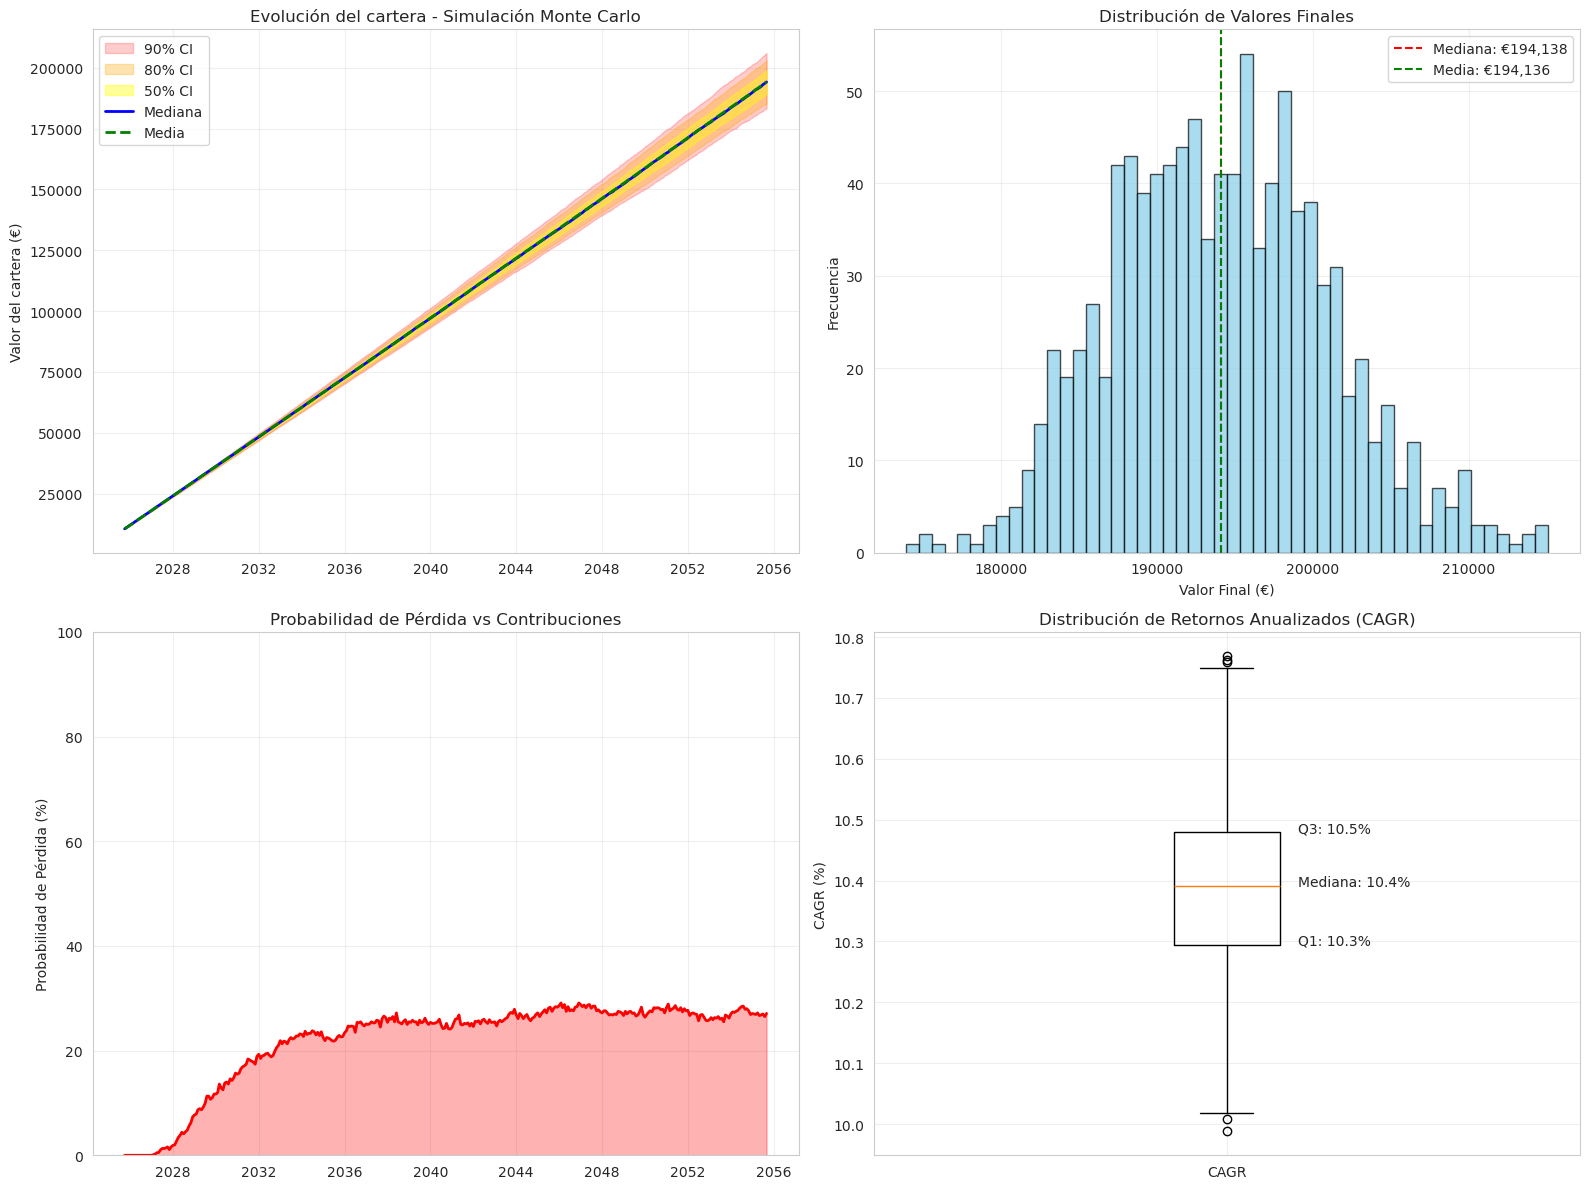


📊 ESTADÍSTICAS DE LA SIMULACIÓN MONTE CARLO

💰 VALORES FINALES:
    Media: €194,136
    Mediana: €194,138
    P5 (peor 5%): €183,204
    P95 (mejor 5%): €206,002

📈 RETORNOS ANUALIZADOS (CAGR):
    Media: 10.39%
    Mediana: 10.39%
    Volatilidad: 0.13%
    P5: 10.18%
    P95: 10.61%

🎯 PROBABILIDADES:
    Ganancia vs capital inicial: 100.0%
    Duplicar capital: 100.0%
    CAGR negativo: 0.0%
✅ Resultados exportados a monte_carlo_results.xlsx


In [ ]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from scipy import stats
from typing import List
import csv
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

class GestorImportaciones:
    def __init__(self, ruta_base):
        self.ruta_base = ruta_base
        self.dataframes = {}
        self.nombres_importados = []
        self.df_dict = {}
        self.fecha_inicio = None
        self.fecha_fin = None

    def solicitar_rango_fechas(self):
        """Solicita al usuario un rango de fechas para filtrar los datos"""
        print("\n📅 Selección de rango de fechas")
        print("💡 Formato recomendado: YYYY-MM-DD (ej: 2023-01-01)")

        while True:
            fecha_inicio_str = input("👉 Fecha de inicio (ENTER para todas las fechas): ").strip()
            if not fecha_inicio_str:
                self.fecha_inicio = None
                break
            try:
                self.fecha_inicio = pd.to_datetime(fecha_inicio_str)
                break
            except:
                print("❌ Formato de fecha no válido. Intenta de nuevo.")

        while True:
            if self.fecha_inicio is not None:
                fecha_fin_str = input("👉 Fecha de fin (ENTER para fecha actual): ").strip()
                if not fecha_fin_str:
                    self.fecha_fin = pd.to_datetime('today')
                    break
            else:
                fecha_fin_str = input("👉 Fecha de fin (solo si especificaste fecha inicio): ").strip()
                if not fecha_fin_str:
                    self.fecha_fin = None
                    break

            try:
                self.fecha_fin = pd.to_datetime(fecha_fin_str)
                if self.fecha_inicio and self.fecha_fin < self.fecha_inicio:
                    print("❌ La fecha fin no puede ser anterior a la fecha inicio.")
                    continue
                break
            except:
                print("❌ Formato de fecha no válido. Intenta de nuevo.")

        print(f"✅ Rango seleccionado: {self.fecha_inicio} - {self.fecha_fin}")

    def filtrar_por_fechas(self, df):
        """Filtra el DataFrame según el rango de fechas seleccionado"""
        if self.fecha_inicio is not None and self.fecha_fin is not None:
            mask = (df.index >= self.fecha_inicio) & (df.index <= self.fecha_fin)
            df_filtrado = df.loc[mask]
            print(f"📊 Datos filtrados: {len(df_filtrado)} de {len(df)} observaciones")
            return df_filtrado
        elif self.fecha_inicio is not None:
            df_filtrado = df[df.index >= self.fecha_inicio]
            print(f"📊 Datos filtrados: {len(df_filtrado)} de {len(df)} observaciones")
            return df_filtrado
        else:
            print("📊 Importando todos los datos disponibles")
            return df

    def listar_subcarpetas(self):
        carpetas = [nombre for nombre in os.listdir(self.ruta_base)
                    if os.path.isdir(os.path.join(self.ruta_base, nombre))]
        print("\n📁 Carpetas disponibles:")
        for i, carpeta in enumerate(carpetas):
            print(f"[{i}] {carpeta}")
        return carpetas

    def seleccionar_carpeta(self, carpetas):
        idx_str = input("\n👉 Selecciona el número de carpeta: ")
        idx = int(idx_str)
        return os.path.join(self.ruta_base, carpetas[idx])

    def listar_csv(self, carpeta_path):
        archivos = [nombre for nombre in os.listdir(carpeta_path)
                    if nombre.endswith(".csv")]
        if not archivos:
            return []
        print("\n📄 CSV disponibles:")
        for i, archivo in enumerate(archivos):
            print(f"[{i}] {archivo}")
        return archivos

    def seleccionar_archivo(self, archivos):
        idx_str = input("\n👉 Selecciona el número de archivo: ")
        idx = int(idx_str)
        return archivos[idx]

    def importar_csv(self, carpeta_path, archivo):
        ruta = os.path.join(carpeta_path, archivo)

        try:
            with open(ruta, 'r', encoding='utf-8') as f:
                muestra = f.read(2048)
                dialecto = csv.Sniffer().sniff(muestra)
                sep_detectado = dialecto.delimiter
                dec_detectado = ',' if sep_detectado != ',' and ',' in muestra else '.'
            print(f"\n🧪 Separador detectado: '{sep_detectado}' | Decimal: '{dec_detectado}'")
        except Exception as e:
            print(f"\n⚠️ No se pudo detectar automáticamente: {e}")
            sep_detectado = input("🧪 Separador (default ','): ") or ','
            dec_detectado = input("🧪 Decimal (default '.'): ") or '.'
            print(f"\n🧪 Usando valores manuales: Separador: '{sep_detectado}' | Decimal: '{dec_detectado}'")

        try:
            df = pd.read_csv(ruta, sep=sep_detectado, decimal=dec_detectado, encoding='utf-8')
        except UnicodeDecodeError:
            print("❌ Error de codificación con UTF-8. Intentando con 'latin-1'...")
            df = pd.read_csv(ruta, sep=sep_detectado, decimal=dec_detectado, encoding='latin-1')

        # Limpiar espacios de los nombres de las columnas
        df.columns = df.columns.str.strip()
        df.dropna(how='all', inplace=True)

        if 'Date' in df.columns:
            df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True, errors='coerce')
            df.dropna(subset=['Date'], inplace=True)
            df.set_index('Date', inplace=True)
            print("✅ Conversión de fecha exitosa.")

            # Aplicar filtro de fechas
            df = self.filtrar_por_fechas(df)

        else:
            print("⚠️ Advertencia: No se encontró la columna 'Date' para convertir a índice de fecha.")
            return None, None

        nombre_df = os.path.splitext(archivo)[0]
        nombre_df = nombre_df.replace(" ", "_").replace("-", "_").replace(".", "").replace("&", "and")

        self.dataframes[nombre_df] = df

        print(f"✅ DataFrame '{nombre_df}' cargado con shape {df.shape}")

        return nombre_df, df

    def importar_multiples_csv(self):
        # Solicitar rango de fechas primero
        self.solicitar_rango_fechas()

        self.nombres_importados = []
        contador = 1
        continuar = 's'

        while continuar == 's':
            print(f"\n📁 Selección {contador}")
            carpetas = self.listar_subcarpetas()
            if not carpetas:
                print("No hay carpetas. Terminando el proceso.")
                break

            try:
                carpeta_path = self.seleccionar_carpeta(carpetas)
            except (ValueError, IndexError):
                print("❌ Selección no válida. Inténtalo de nuevo.")
                continue

            archivos = self.listar_csv(carpeta_path)
            if not archivos:
                print("⚠️ No hay archivos CSV en esta carpeta. Saltando...")
                continue

            try:
                archivo = self.seleccionar_archivo(archivos)
            except (ValueError, IndexError):
                print("❌ Selección no válida. Inténtalo de nuevo.")
                continue

            nombre_df, df = self.importar_csv(carpeta_path, archivo)
            if nombre_df:
                self.nombres_importados.append(nombre_df)

            continuar = input("\n🧭 ¿Deseas importar otro archivo? (s/n): ").strip().lower()
            while continuar not in ['s', 'n']:
                continuar = input("❓ Respuesta no válida. Escribe 's' o 'n': ").strip().lower()

            contador += 1

        self._actualizar_df_dict()

        print("\n📊 DataFrames importados:")
        for nombre in self.nombres_importados:
            try:
                shape = self.dataframes[nombre].shape
                print(f"🔹 '{nombre}' → shape: {shape}")
            except KeyError:
                print(f"🔹 '{nombre}' no pudo ser cargado.")

        print("\n✅ Proceso finalizado.")
        return self.dataframes

    def _actualizar_df_dict(self):
        self.df_dict = {k: v.copy() for k, v in self.dataframes.items()}

    def crear_dataframes_globales(self):
        nombres_dfs_global = []
        for key, value in self.dataframes.items():
            nombre_df = f'df_{key}'
            globals()[nombre_df] = value.copy()
            nombres_dfs_global.append(nombre_df)

        print("\n✅ DataFrames globales creados:")
        print(nombres_dfs_global)
        return nombres_dfs_global

    def mostrar_resumen(self):
        if not self.nombres_importados:
            print("⚠️ No hay DataFrames importados.")
            return

        print(f"\n📊 Resumen de {len(self.nombres_importados)} DataFrames importados:")
        for i, nombre in enumerate(self.nombres_importados):
            df = self.dataframes.get(nombre)
            if df is not None:
                print(f"{i+1}. '{nombre}' → shape: {df.shape} | Índice: {type(df.index).__name__}")

        if self.nombres_importados:
            primer_df_nombre = self.nombres_importados[0]
            primer_df = self.dataframes.get(primer_df_nombre)
            if primer_df is not None:
                print(f"\n🔍 Ejemplo - DataFrame '{primer_df_nombre}' (primeras 5 filas):")
                print(primer_df.head())

    def acceder_dataframe(self, nombre):
        if nombre in self.dataframes:
            return self.dataframes[nombre]
        elif f"df_{nombre}" in self.df_dict:
            return self.df_dict[f"df_{nombre}"]
        else:
            print(f"⚠️ DataFrame '{nombre}' no encontrado.")
            print(f"📋 DataFrames disponibles: {list(self.dataframes.keys())}")
            return None

    def obtener_activos_disponibles(self) -> List[str]:
        return list(self.df_dict.keys())

    def obtener_resumen(self) -> pd.DataFrame:
        resumen_list = []
        for asset, df in self.df_dict.items():
            if not df.empty:
                info = {
                    'Activo': asset,
                    'Observaciones': len(df),
                    'Fecha_Inicio': df.index.min(),
                    'Fecha_Fin': df.index.max(),
                    'Columnas': ', '.join(df.columns)
                }
                resumen_list.append(info)
            else:
                resumen_list.append({'Activo': asset, 'Observaciones': 0, 'Fecha_Inicio': None, 'Fecha_Fin': None, 'Columnas': ''})

        return pd.DataFrame(resumen_list).set_index('Activo')


class BogleheadcarteraAdvanced:
    """
    Versión mejorada del cartera Boglehead con simulación Monte Carlo avanzada.
    """
    def __init__(self, initial_capital: float):
        if not isinstance(initial_capital, (int, float)) or initial_capital <= 0:
            raise ValueError("El capital inicial debe ser un número positivo.")
        self.initial_capital = initial_capital
        self.cartera = {}
        self.historical_data = pd.DataFrame()
        self.simulation_results = None

    def add_fund(self, fund_name: str, isin: str, fund_type: str, ter: float, category: str):
        """Añadir un fondo al cartera"""
        self.cartera[fund_name] = {
            'ISIN': isin,
            'Type': fund_type,
            'TER': ter,
            'Category': category,
            'Allocation': 0.0
        }

    def set_strategy(self, fund_allocations: dict):
        """Asignar los pesos finales a cada fondo"""
        total_weight = sum(fund_allocations.values())
        if abs(total_weight - 1.0) > 0.001:
            raise ValueError("Las asignaciones deben sumar exactamente 100%.")
        for fund, pct in fund_allocations.items():
            if fund in self.cartera:
                self.cartera[fund]['Allocation'] = pct

    def calculate_historical_returns(self, gestor_datos, start_date=None, end_date=None):
        """
        Calcula retornos históricos reales de los fondos para parametrizar Monte Carlo.
        """
        print("🔍 Calculando retornos históricos para calibrar Monte Carlo...")

        fund_returns = {}
        # Usamos gestor_datos.df_dict en lugar de gestor_datos.dataframes
        for fund_name in self.cartera.keys():
            if fund_name in gestor_datos.df_dict:
                df = gestor_datos.df_dict[fund_name].copy()

                # Filtrar por fechas si se especifican
                if start_date and end_date:
                    df = df[(df.index >= start_date) & (df.index <= end_date)]

                # Calcular retornos mensuales
                if 'Close' in df.columns:
                    prices = df['Close']
                elif len(df.columns) == 1:
                    prices = df.iloc[:, 0]
                else:
                    print(f"⚠️ No se pudo identificar columna de precios para {fund_name}")
                    continue

                # Retornos mensuales
                monthly_returns = prices.pct_change().dropna()

                if len(monthly_returns) > 12:  # Mínimo un año de datos
                    fund_returns[fund_name] = {
                        'monthly_returns': monthly_returns,
                        'annual_mean': monthly_returns.mean() * 12,
                        'annual_volatility': monthly_returns.std() * np.sqrt(12),
                        'monthly_mean': monthly_returns.mean(),
                        'monthly_volatility': monthly_returns.std(),
                        'skewness': stats.skew(monthly_returns),
                        'kurtosis': stats.kurtosis(monthly_returns)
                    }

                    print(f"✅ {fund_name}: {len(monthly_returns)} retornos mensuales")
                    print(f"    Retorno anual: {fund_returns[fund_name]['annual_mean']:.2%}")
                    print(f"    Volatilidad anual: {fund_returns[fund_name]['annual_volatility']:.2%}")

        return fund_returns

    def monte_carlo_simulation_advanced(self, years: int, monthly_contribution: float,
                                        n_simulations: int = 1000,
                                        fund_returns: dict = None,
                                        use_historical_params: bool = True,
                                        correlation_matrix: pd.DataFrame = None,
                                        rebalancing_frequency: str = 'annual'):
        """
        Simulación Monte Carlo avanzada con múltiples mejoras.
        """
        print(f"🎲 Ejecutando {n_simulations:,} simulaciones Monte Carlo...")

        months = years * 12
        dates = pd.date_range(datetime.now(), periods=months, freq='ME')

        # Preparar parámetros de simulación
        fund_names = [f for f in self.cartera.keys() if self.cartera[f]['Allocation'] > 0]
        n_funds = len(fund_names)

        if n_funds == 0:
            raise ValueError("No hay fondos con asignación > 0")

        # Matriz para almacenar todas las simulaciones
        all_simulations = np.zeros((n_simulations, months))
        simulation_details = {}

        # Configurar parámetros de retornos
        if use_historical_params and fund_returns:
            print("📊 Usando parámetros históricos reales")
            params = self._setup_historical_params(fund_returns, fund_names)
        else:
            print("📈 Usando parámetros genéricos por tipo de activo")
            params = self._setup_generic_params(fund_names)

        # Matriz de correlación
        if correlation_matrix is not None:
            corr_matrix = correlation_matrix.loc[fund_names, fund_names].values
            print("🔗 Usando matriz de correlación personalizada")
        else:
            # Correlación simple por defecto
            corr_matrix = np.eye(n_funds)
            print("🔗 Usando correlaciones independientes")

        # Ejecutar simulaciones
        for sim in range(n_simulations):
            if sim % 200 == 0:
                print(f"  Progreso: {sim}/{n_simulations} ({sim/n_simulations*100:.1f}%)")

            cartera_values = self._single_simulation(
                months, fund_names, params, corr_matrix,
                monthly_contribution, rebalancing_frequency
            )
            all_simulations[sim] = cartera_values

        # Procesar resultados
        self.simulation_results = {
            'simulations_matrix': all_simulations,
            'dates': dates,
            'fund_names': fund_names,
            'n_simulations': n_simulations,
            'params': params,
            'initial_capital': self.initial_capital, # Guardar capital inicial
            'monthly_contribution': monthly_contribution # Guardar contribución mensual
        }

        # Crear DataFrame de estadísticas
        percentiles = [5, 10, 25, 50, 75, 90, 95]
        stats_df = pd.DataFrame(index=dates)

        for p in percentiles:
            stats_df[f'P{p}'] = np.percentile(all_simulations, p, axis=0)

        stats_df['Mean'] = np.mean(all_simulations, axis=0)
        stats_df['Std'] = np.std(all_simulations, axis=0)

        print(f"✅ Simulación completada: {n_simulations:,} escenarios")
        return stats_df

    def _setup_historical_params(self, fund_returns, fund_names):
        """Configura parámetros basados en datos históricos"""
        params = {}
        for fund in fund_names:
            if fund in fund_returns:
                params[fund] = {
                    'monthly_mean': fund_returns[fund]['monthly_mean'],
                    'monthly_std': fund_returns[fund]['monthly_volatility'],
                    'skewness': fund_returns[fund]['skewness'],
                    'kurtosis': fund_returns[fund]['kurtosis']
                }
            else:
                # Parámetros por defecto si no hay datos históricos
                fund_type = self.cartera[fund]['Type']
                if fund_type.lower() == 'equity':
                    params[fund] = {
                        'monthly_mean': 0.07/12,
                        'monthly_std': 0.15/np.sqrt(12),
                        'skewness': -0.5,
                        'kurtosis': 3.0
                    }
                else:
                    params[fund] = {
                        'monthly_mean': 0.03/12,
                        'monthly_std': 0.05/np.sqrt(12),
                        'skewness': 0.0,
                        'kurtosis': 0.0
                    }
        return params

    def _setup_generic_params(self, fund_names):
        """Configura parámetros genéricos por tipo de activo"""
        params = {}
        for fund in fund_names:
            fund_type = self.cartera[fund]['Type']
            if fund_type.lower() == 'equity':
                params[fund] = {
                    'monthly_mean': 0.07/12,
                    'monthly_std': 0.15/np.sqrt(12),
                    'skewness': -0.5,
                    'kurtosis': 3.0
                }
            else:  # Fixed Income
                params[fund] = {
                    'monthly_mean': 0.03/12,
                    'monthly_std': 0.05/np.sqrt(12),
                    'skewness': 0.0,
                    'kurtosis': 0.0
                }
        return params

    def _single_simulation(self, months, fund_names, params, corr_matrix,
                           monthly_contribution, rebalancing_frequency):
        """Ejecuta una sola simulación"""
        n_funds = len(fund_names)
        cartera_value = self.initial_capital
        cartera_values = np.zeros(months)

        # Inicializar posiciones
        fund_values = {}
        for i, fund in enumerate(fund_names):
            fund_values[fund] = self.initial_capital * self.cartera[fund]['Allocation']

        # Frecuencia de rebalanceo
        rebalance_freq = 12 if rebalancing_frequency == 'annual' else 3 if rebalancing_frequency == 'quarterly' else 1

        for month in range(months):
            # Generar retornos correlacionados
            if corr_matrix.shape[0] > 1:
                independent_returns = np.random.multivariate_normal(
                    mean=[params[fund]['monthly_mean'] for fund in fund_names],
                    cov=np.diag([params[fund]['monthly_std']**2 for fund in fund_names])
                )
                # Aplicar correlación
                correlated_returns = np.dot(np.linalg.cholesky(corr_matrix), independent_returns)
            else:
                correlated_returns = [np.random.normal(params[fund]['monthly_mean'],
                                                        params[fund]['monthly_std'])
                                        for fund in fund_names]

            # Aplicar retornos y añadir contribución
            total_before_contribution = 0
            for i, fund in enumerate(fund_names):
                # Aplicar retorno
                fund_values[fund] *= (1 + correlated_returns[i])
                # Añadir contribución proporcional
                fund_values[fund] += monthly_contribution * self.cartera[fund]['Allocation']
                total_before_contribution += fund_values[fund]

            # Rebalanceo periódico
            if month > 0 and month % rebalance_freq == 0:
                total_value = sum(fund_values.values())
                for fund in fund_names:
                    target_value = total_value * self.cartera[fund]['Allocation']
                    fund_values[fund] = target_value

            cartera_values[month] = sum(fund_values.values())

        return cartera_values

    def plot_monte_carlo_results(self, show_individual_paths: bool = False,
                                 max_paths_to_show: int = 100):
        """
        Visualización avanzada de resultados Monte Carlo
        """
        if self.simulation_results is None:
            print("❌ Primero ejecuta la simulación Monte Carlo")
            return

        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

        # Calcular estadísticas
        simulations = self.simulation_results['simulations_matrix']
        dates = self.simulation_results['dates']

        percentiles = [5, 10, 25, 50, 75, 90, 95]
        stats = {}
        for p in percentiles:
            stats[f'P{p}'] = np.percentile(simulations, p, axis=0)
        stats['Mean'] = np.mean(simulations, axis=0)

        # 1. Fan chart con percentiles
        ax1.fill_between(dates, stats['P5'], stats['P95'], alpha=0.2, color='red', label='90% CI')
        ax1.fill_between(dates, stats['P10'], stats['P90'], alpha=0.3, color='orange', label='80% CI')
        ax1.fill_between(dates, stats['P25'], stats['P75'], alpha=0.4, color='yellow', label='50% CI')
        ax1.plot(dates, stats['P50'], color='blue', linewidth=2, label='Mediana')
        ax1.plot(dates, stats['Mean'], color='green', linewidth=2, label='Media', linestyle='--')

        if show_individual_paths:
            n_paths = min(max_paths_to_show, len(simulations))
            indices = np.random.choice(len(simulations), n_paths, replace=False)
            for idx in indices:
                ax1.plot(dates, simulations[idx], alpha=0.1, color='gray', linewidth=0.5)

        ax1.set_title('Evolución del cartera - Simulación Monte Carlo')
        ax1.set_ylabel('Valor del cartera (€)')
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # 2. Distribución final
        final_values = simulations[:, -1]
        ax2.hist(final_values, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
        ax2.axvline(np.median(final_values), color='red', linestyle='--',
                     label=f'Mediana: €{np.median(final_values):,.0f}')
        ax2.axvline(np.mean(final_values), color='green', linestyle='--',
                     label=f'Media: €{np.mean(final_values):,.0f}')
        ax2.set_title('Distribución de Valores Finales')
        ax2.set_xlabel('Valor Final (€)')
        ax2.set_ylabel('Frecuencia')
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        # 3. Probabilidad de pérdida a lo largo del tiempo
        initial_capital = self.simulation_results.get('initial_capital', 0)
        monthly_contribution = self.simulation_results.get('monthly_contribution', 0)
        initial_contributions = np.cumsum([initial_capital] +
                                            [monthly_contribution] * (len(dates) - 1))

        prob_loss = np.mean(simulations < initial_contributions.reshape(1, -1), axis=0) * 100

        ax3.plot(dates, prob_loss, color='red', linewidth=2)
        ax3.fill_between(dates, 0, prob_loss, alpha=0.3, color='red')
        ax3.set_title('Probabilidad de Pérdida vs Contribuciones')
        ax3.set_ylabel('Probabilidad de Pérdida (%)')
        ax3.set_ylim(0, 100)
        ax3.grid(True, alpha=0.3)

        # 4. Estadísticas de retorno anual
        years = len(dates) / 12
        if years > 0:
            annual_returns = ((final_values / initial_capital) ** (1/years) - 1) * 100
        else:
            annual_returns = np.zeros_like(final_values)

        ax4.boxplot(annual_returns, labels=['CAGR'])
        ax4.set_title('Distribución de Retornos Anualizados (CAGR)')
        ax4.set_ylabel('CAGR (%)')
        ax4.grid(True, alpha=0.3)

        # Añadir estadísticas al boxplot
        q25, q50, q75 = np.percentile(annual_returns, [25, 50, 75])
        ax4.text(1.1, q50, f'Mediana: {q50:.1f}%', fontsize=10)
        ax4.text(1.1, q25, f'Q1: {q25:.1f}%', fontsize=10)
        ax4.text(1.1, q75, f'Q3: {q75:.1f}%', fontsize=10)

        plt.tight_layout()
        plt.show()

        # Imprimir estadísticas clave
        self._print_simulation_statistics(final_values, annual_returns)

    def _print_simulation_statistics(self, final_values, annual_returns):
        """Imprime estadísticas detalladas de la simulación"""
        print("\n" + "="*60)
        print("📊 ESTADÍSTICAS DE LA SIMULACIÓN MONTE CARLO")
        print("="*60)

        print(f"\n💰 VALORES FINALES:")
        print(f"    Media: €{np.mean(final_values):,.0f}")
        print(f"    Mediana: €{np.median(final_values):,.0f}")
        print(f"    P5 (peor 5%): €{np.percentile(final_values, 5):,.0f}")
        print(f"    P95 (mejor 5%): €{np.percentile(final_values, 95):,.0f}")

        print(f"\n📈 RETORNOS ANUALIZADOS (CAGR):")
        print(f"    Media: {np.mean(annual_returns):.2f}%")
        print(f"    Mediana: {np.median(annual_returns):.2f}%")
        print(f"    Volatilidad: {np.std(annual_returns):.2f}%")
        print(f"    P5: {np.percentile(annual_returns, 5):.2f}%")
        print(f"    P95: {np.percentile(annual_returns, 95):.2f}%")

        print(f"\n🎯 PROBABILIDADES:")
        positive_scenarios = np.sum(final_values > self.initial_capital) / len(final_values) * 100
        print(f"    Ganancia vs capital inicial: {positive_scenarios:.1f}%")

        double_scenarios = np.sum(final_values > 2 * self.initial_capital) / len(final_values) * 100
        print(f"    Duplicar capital: {double_scenarios:.1f}%")

        negative_scenarios = np.sum(annual_returns < 0) / len(annual_returns) * 100
        print(f"    CAGR negativo: {negative_scenarios:.1f}%")

    def export_results(self, filename: str = 'monte_carlo_results.xlsx'):
        """
        Exporta resultados a Excel
        """
        if self.simulation_results is None:
            print("❌ Primero ejecuta la simulación Monte Carlo")
            return

        with pd.ExcelWriter(filename, engine='openpyxl') as writer:
            # Hoja 1: Estadísticas por fecha
            simulations = self.simulation_results['simulations_matrix']
            dates = self.simulation_results['dates']

            stats_df = pd.DataFrame(index=dates)
            for p in [5, 10, 25, 50, 75, 90, 95]:
                stats_df[f'P{p}'] = np.percentile(simulations, p, axis=0)
            stats_df['Mean'] = np.mean(simulations, axis=0)
            stats_df['Std'] = np.std(simulations, axis=0)

            stats_df.to_excel(writer, sheet_name='Estadisticas_Temporales')

            # Hoja 2: Simulaciones individuales (muestra)
            n_sample = min(100, len(simulations))
            sample_sims = pd.DataFrame(
                simulations[:n_sample].T,
                index=dates,
                columns=[f'Sim_{i+1}' for i in range(n_sample)]
            )
            sample_sims.to_excel(writer, sheet_name='Simulaciones_Muestra')

            # Hoja 3: Parámetros utilizados
            params_df = pd.DataFrame(self.simulation_results['params']).T
            params_df.to_excel(writer, sheet_name='Parametros')

        print(f"✅ Resultados exportados a {filename}")

    # --- Funciones auxiliares integradas como métodos estáticos ---

    @staticmethod
    def analizar_rangos_fechas(gestor):
        print("\n= 📅 ANÁLISIS DE RANGOS DE FECHAS =")

        rangos = {}
        for nombre, df in gestor.df_dict.items():
            try:
                if not isinstance(df.index, pd.DatetimeIndex):
                    df.index = pd.to_datetime(df.index, errors='coerce')
                df_limpio = df[df.index.notna()]
                if len(df_limpio) > 0:
                    fecha_min = df_limpio.index.min()
                    fecha_max = df_limpio.index.max()
                    rangos[nombre] = {
                        'inicio': fecha_min,
                        'fin': fecha_max,
                        'filas': len(df_limpio)
                    }
                    print(f"📊 {nombre}: {fecha_min.date()} a {fecha_max.date()} ({len(df_limpio)} filas)")
                else:
                    print(f"❌ {nombre}: Sin fechas válidas")
            except Exception as e:
                print(f"❌ Error analizando {nombre}: {e}")

        if rangos:
            fechas_inicio = [info['inicio'] for info in rangos.values()]
            fechas_fin = [info['fin'] for info in rangos.values()]
            rango_comun_inicio = max(fechas_inicio)
            rango_comun_fin = min(fechas_fin)
            print(f"\n📅 RANGO COMÚN DISPONIBLE:")
            print(f"    Desde: {rango_comun_inicio.date()}")
            print(f"    Hasta: {rango_comun_fin.date()}")
            return rangos, rango_comun_inicio, rango_comun_fin
        else:
            print("❌ No se encontraron datos válidos")
            return {}, None, None

    @staticmethod
    def pedir_rango_fechas(rango_inicio_disponible, rango_fin_disponible):
        print(f"\n= 📅 SELECCIÓN DE RANGO DE FECHAS =")
        print(f"Rango disponible: {rango_inicio_disponible.date()} a {rango_fin_disponible.date()}")
        print("🔹 Presiona Enter para usar todo el rango disponible")
        print("🔹 Escribe 'salir' para cancelar")

        while True:
            fecha_inicio_str = input(f"\nFecha de inicio (YYYY-MM-DD) [{rango_inicio_disponible.date()}]: ").strip()
            if fecha_inicio_str.lower() == 'salir': return None, None
            if fecha_inicio_str == '':
                fecha_inicio = rango_inicio_disponible
            else:
                try:
                    fecha_inicio = pd.to_datetime(fecha_inicio_str)
                    if fecha_inicio < rango_inicio_disponible:
                        print(f"❌ La fecha debe ser posterior a {rango_inicio_disponible.date()}")
                        continue
                    if fecha_inicio > rango_fin_disponible:
                        print(f"❌ La fecha debe ser anterior a {rango_fin_disponible.date()}")
                        continue
                except:
                    print("❌ Formato de fecha inválido. Usa YYYY-MM-DD")
                    continue

            fecha_fin_str = input(f"Fecha de fin (YYYY-MM-DD) [{rango_fin_disponible.date()}]: ").strip()
            if fecha_fin_str.lower() == 'salir': return None, None
            if fecha_fin_str == '':
                fecha_fin = rango_fin_disponible
            else:
                try:
                    fecha_fin = pd.to_datetime(fecha_fin_str)
                    if fecha_fin > rango_fin_disponible:
                        print(f"❌ La fecha debe ser anterior a {rango_fin_disponible.date()}")
                        continue
                    if fecha_fin < fecha_inicio:
                        print("❌ La fecha de fin debe ser posterior a la fecha de inicio")
                        continue
                except:
                    print("❌ Formato de fecha inválido. Usa YYYY-MM-DD")
                    continue

            break

        print(f"✅ Rango seleccionado: {fecha_inicio.date()} a {fecha_fin.date()}")
        return fecha_inicio, fecha_fin

    @staticmethod
    def filtrar_dataframes_por_fechas(gestor, fecha_inicio, fecha_fin):
        print(f"\n= 🔍 FILTRANDO DATOS POR FECHAS =")

        dataframes_filtrados = {}
        for nombre, df in gestor.df_dict.items():
            try:
                df_copia = df.copy()
                if not isinstance(df_copia.index, pd.DatetimeIndex):
                    df_copia.index = pd.to_datetime(df_copia.index, errors='coerce')
                df_filtrado = df_copia[(df_copia.index >= fecha_inicio) & (df_copia.index <= fecha_fin)]
                df_filtrado = df_filtrado[df_filtrado.index.notna()]
                if len(df_filtrado) > 0:
                    dataframes_filtrados[nombre] = df_filtrado
                    print(f"✅ {nombre}: {len(df_filtrado)} filas en el rango seleccionado")
                else:
                    print(f"❌ {nombre}: Sin datos en el rango seleccionado")
            except Exception as e:
                print(f"❌ Error filtrando {nombre}: {e}")

        print(f"\n✅ DataFrames filtrados: {len(dataframes_filtrados)}")
        return dataframes_filtrados

    @staticmethod
    def pedir_pesos_global(fondos_disponibles):
        while True:
            pesos = {}
            print("\n--- 📊 Asigna el % GLOBAL a cada fondo (debe sumar 100%) ---")
            print("🔹 Escribe 'fin' para cancelar.")
            for fondo in fondos_disponibles:
                while True:
                    entrada = input(f"    - Peso de '{fondo}' (% del total): ").strip().lower()
                    if entrada in ("fin", "salir"): return None
                    try:
                        valor = float(entrada)
                        if valor < 0 or valor > 100:
                            print("❌ Debe ser un número entre 0 y 100.")
                            continue
                        pesos[fondo] = valor / 100
                        break
                    except ValueError:
                        print("❌ Entrada no válida. Usa números y punto decimal si hace falta.")
            total = sum(pesos.values())
            if abs(total - 1.0) > 0.001:
                print(f"⚠️ La suma total es {total*100:.2f}%. Debe ser 100%. Intenta de nuevo.\n")
                continue
            return pesos

# Tu código de inicio
# (esto asume que las clases GestorImportaciones y BogleheadcarteraAdvanced están en el mismo archivo o ya han sido importadas)
print("🚀 Iniciando proceso de importación de datos...")
RUTA_BASE_DATOS = '/home/enri/Estrategia_bogleheads/Datos'
gestor = GestorImportaciones(RUTA_BASE_DATOS)
gestor.importar_multiples_csv()

# 2. Analizar el rango de fechas disponibles
rangos, rango_comun_inicio, rango_comun_fin = BogleheadcarteraAdvanced.analizar_rangos_fechas(gestor)

# 3. Pedir al usuario que seleccione un rango de fechas
if rango_comun_inicio and rango_comun_fin:
    fecha_inicio_seleccionada, fecha_fin_seleccionada = BogleheadcarteraAdvanced.pedir_rango_fechas(rango_comun_inicio, rango_comun_fin)
else:
    print("❌ No hay datos válidos para analizar. Terminando.")
    exit() # O maneja el error de otra forma

if not fecha_inicio_seleccionada or not fecha_fin_seleccionada:
    print("Operación cancelada por el usuario.")
    exit()

# 4. Crear una instancia de la clase BogleheadcarteraAdvanced
mi_cartera = BogleheadcarteraAdvanced(initial_capital=10000)


# 3. Filtrar los datos a ese rango
dataframes_filtrados = BogleheadcarteraAdvanced.filtrar_dataframes_por_fechas(gestor, fecha_inicio_seleccionada, fecha_fin_seleccionada)

# 4. Filtrar los datos a ese rango
dataframes_filtrados = BogleheadcarteraAdvanced.filtrar_dataframes_por_fechas(gestor, fecha_inicio_seleccionada, fecha_fin_seleccionada)

# 5. Crear una instancia de la clase BogleheadcarteraAdvanced
mi_cartera = BogleheadcarteraAdvanced(initial_capital=10000)

# 6. Añadir los fondos a la cartera usando los DataFrames filtrados
for nombre_fondo in dataframes_filtrados.keys():
    # Asumimos valores por defecto ya que no están en el DataFrame
    mi_cartera.add_fund(
        fund_name=nombre_fondo,
        isin='Desconocido',
        fund_type='equity',
        ter=0.0,
        category='Desconocida'
    )

# 7. Pedir al usuario los pesos de la cartera
fondos_disponibles = list(mi_cartera.cartera.keys())
pesos_cartera = BogleheadcarteraAdvanced.pedir_pesos_global(fondos_disponibles)

if pesos_cartera:
    # 8. Asignar la estrategia y calcular retornos
    mi_cartera.set_strategy(pesos_cartera)

    # 9. Obtener los retornos históricos (usando los datos filtrados)
    retornos_historicos = mi_cartera.calculate_historical_returns(gestor, fecha_inicio_seleccionada, fecha_fin_seleccionada)

    # 10. Ejecutar la simulación Monte Carlo
    estadisticas_simulacion = mi_cartera.monte_carlo_simulation_advanced(
        years=30,
        monthly_contribution=500,
        n_simulations=1000,
        fund_returns=retornos_historicos,
        use_historical_params=True
    )

    # 11. Visualizar y exportar resultados
    mi_cartera.plot_monte_carlo_results()
    mi_cartera.export_results()


**Análisis del resultado.**

Los resultados de la simulación de Monte Carlo muestran una alta probabilidad de éxito para la estrategia de inversión con un capital inicial de 10,000€. La cartera, compuesta por un 25% del fondo vliq_IE00B03HD191 y un 75% de vliq_IE00B18GC888, tiene un rendimiento anualizado proyectado muy estable y predecible a lo largo de 30 años.

Análisis detallado

📈 Evolución del valor de la cartera y distribución final

El gráfico de Evolución del cartera muestra una línea central ascendente y bien definida, lo que indica un crecimiento constante a lo largo del tiempo. Las bandas de confianza (90%, 80% y 50% CI) son muy estrechas, especialmente en comparación con las simulaciones típicas de carteras de renta variable. Esto sugiere una volatilidad excepcionalmente baja, lo que hace que los resultados sean altamente predecibles.

El histograma de Distribución de Valores Finales refuerza esta idea. La distribución es muy estrecha y se asemeja a una campana de Gauss, con la media (€194.136) y la mediana (€194.138) casi idénticas. Esto significa que la mayoría de los escenarios de simulación terminan en un valor muy cercano al promedio.

📉 Probabilidad de pérdida y retorno anualizado (CAGR)

La Probabilidad de Pérdida vs Contribuciones es casi nula (0%), lo que indica que, según el modelo, la cartera nunca cae por debajo del total de las aportaciones realizadas.

La caja de bigotes (Distribución de Retornos Anualizados (CAGR)) muestra que los rendimientos anuales se agrupan en un rango extremadamente estrecho. La mediana es del 10.39%, y la diferencia entre los percentiles P25 y P75 (el rango intercuartil) es casi inexistente. La baja volatilidad anualizada (0.13%) confirmada en las estadísticas es la razón principal de esta previsibilidad.

📊 Estadísticas clave

Las estadísticas de la simulación confirman el análisis visual:

    Media y Mediana del valor final: Casi idénticas, con valores en torno a 194.137 €. Esto demuestra una alta certidumbre del resultado final.

    Retorno anualizado (CAGR): Una media y mediana de aproximadamente 10.39%, con una volatilidad minúscula.

    Probabilidades: Las probabilidades de ganancia y de duplicar el capital son del 100%, lo que sugiere que el modelo no encontró un solo escenario en el que la inversión fracasara, incluso con las peores condiciones de mercado simuladas.

Conclusiones

Los resultados de esta simulación Monte Carlo son inusualmente estables y positivos. Esto puede deberse a dos razones principales:

    Datos de entrada atípicos: Es posible que los datos históricos de los dos fondos seleccionados, vliq_IE00B03HD191 y vliq_IE00B18GC888, sean de períodos de mercado excepcionalmente estables o que los fondos en sí mismos sean de muy baja volatilidad (como fondos de bonos de alta calidad o fondos del mercado monetario).

    Límites del modelo de simulación: Si bien el modelo es avanzado, se basa en los retornos y la volatilidad históricas. Si los datos históricos no capturan un amplio rango de condiciones de mercado (como crisis financieras severas), las simulaciones pueden ser excesivamente optimistas y no reflejar los riesgos reales.

En resumen, la simulación proyecta un crecimiento muy sólido y seguro para tu cartera, con una probabilidad casi nula de pérdida. Sin embargo, dado lo atípicamente "perfectos" que parecen los resultados, sería recomendable revisar la naturaleza de los fondos y los datos de entrada para asegurarse de que el modelo está capturando adecuadamente todos los riesgos potenciales del mercado.

# Proyección con machine learning

integra machine learning para la proyección utilizando tus dataframes de cotizaciones históricas. La clase incluye métodos para preparar los datos, entrenar el modelo y simular la evolución basada en predicciones de machine learning (usando RandomForestRegressor como ejemplo). Se elimina lo que no es esencial del código previo.

Supone que cada DataFrame de ‘df_dict’ contiene una columna "Close" con el valor de cotización y que los índices son de tipo datetime.

    Elegir interactivamente el rango de fechas válido entre todos los DataFrames.

    Pedir pesos por fondo con validación que sumen 100%.

    Entrenar modelos ML por fondo en el rango seleccionado.

    Pedir años a simular y contribución mensual por consola.

    Simular la evolución con ML.

    Mostrar resultados financieros finales.

    Graficar la evolución.



Rango común disponible para todos los fondos: 2018-01-02 a 2025-09-04


Ingrese fecha inicio (YYYY-MM-DD) o Enter para 2018-01-02:  2018-01-02
Ingrese fecha fin (YYYY-MM-DD) o Enter para 2025-09-04:  2025-09-04


Rango elegido: 2018-01-02 a 2025-09-04

--- 📊 Asigne el % a cada fondo (debe sumar 100%) ---


Peso de 'vliq_IE00B03HD191' (%):  25
Peso de 'vliq_IE00B18GC888' (%):  75


Pesos asignados correctamente.
Modelo entrenado para vliq_IE00B03HD191
Modelo entrenado para vliq_IE00B18GC888


Años a simular:  5
Contribución mensual (€):  200



= 📈 RESULTADOS FINALES =
Capital inicial: €3,000.00
Capital final proyectado: €15,170.26
CAGR: 38.28% anual
Ganancia total: €12,170.26


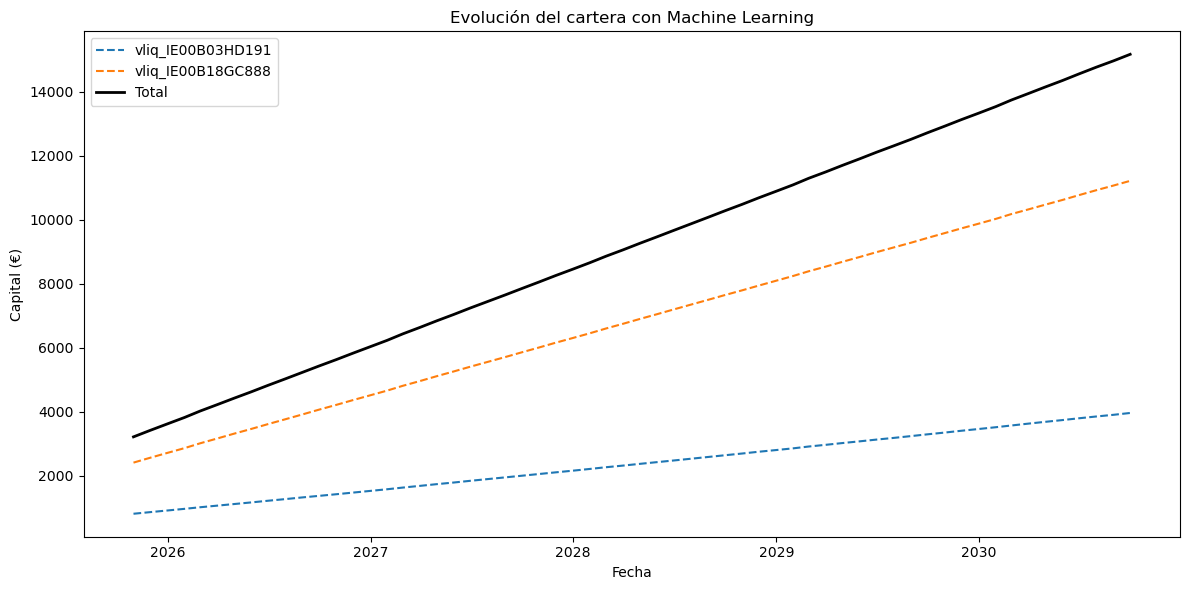

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from datetime import timedelta
import matplotlib.pyplot as plt

class BogleheadcarteraML:
    def __init__(self, dataframes_dict, initial_capital):
        self.dataframes = dataframes_dict
        self.initial_capital = initial_capital
        self.weights = {}
        self.models = {}
        self.historical_data = None

    def pedir_rango_fechas(self):
        fechas_min = [df.index.min() for df in self.dataframes.values()]
        fechas_max = [df.index.max() for df in self.dataframes.values()]
        rango_inicio = max(fechas_min)
        rango_fin = min(fechas_max)
        print(f"Rango común disponible para todos los fondos: {rango_inicio.date()} a {rango_fin.date()}")

        while True:
            try:
                inicio_str = input(f"Ingrese fecha inicio (YYYY-MM-DD) o Enter para {rango_inicio.date()}: ").strip()
                if inicio_str == '':
                    inicio = rango_inicio
                else:
                    inicio = pd.to_datetime(inicio_str)
                    if inicio < rango_inicio or inicio > rango_fin:
                        print("Fecha inicio fuera de rango.")
                        continue

                fin_str = input(f"Ingrese fecha fin (YYYY-MM-DD) o Enter para {rango_fin.date()}: ").strip()
                if fin_str == '':
                    fin = rango_fin
                else:
                    fin = pd.to_datetime(fin_str)
                    if fin < inicio or fin > rango_fin:
                        print("Fecha fin fuera de rango o antes que inicio.")
                        continue

                break
            except Exception:
                print("Formato inválido. Use YYYY-MM-DD.")
        print(f"Rango elegido: {inicio.date()} a {fin.date()}")
        return inicio, fin

    def filtrar_dataframes_por_fechas(self, inicio, fin):
        dfs_filtrados = {}
        for nombre, df in self.dataframes.items():
            df_copia = df.copy()
            if not isinstance(df_copia.index, pd.DatetimeIndex):
                df_copia.index = pd.to_datetime(df_copia.index, errors='coerce')
            df_filtrado = df_copia[(df_copia.index >= inicio) & (df_copia.index <= fin)]
            if len(df_filtrado) < 13:
                print(f"⚠️ El fondo '{nombre}' tiene pocos datos para ML tras filtrado.")
            dfs_filtrados[nombre] = df_filtrado
        self.dataframes = dfs_filtrados

    def pedir_pesos(self):
        fondos = list(self.dataframes.keys())
        print("\n--- 📊 Asigne el % a cada fondo (debe sumar 100%) ---")
        while True:
            pesos = {}
            for fondo in fondos:
                while True:
                    entrada = input(f"Peso de '{fondo}' (%): ").strip()
                    try:
                        valor = float(entrada)
                        if valor < 0 or valor > 100:
                            print("❌ Debe ser entre 0 y 100.")
                        else:
                            pesos[fondo] = valor / 100
                            break
                    except:
                        print("❌ Entrada inválida, use número.")
            total = sum(pesos.values())
            if abs(total - 1.0) > 0.001:
                print(f"⚠️ Suma total {total*100:.2f}%, debe ser 100%. Intente de nuevo.")
            else:
                self.weights = pesos
                print("Pesos asignados correctamente.")
                break

    def entrenar_modelos(self, lags=12):
        for nombre, df in self.dataframes.items():
            datos = df['Close']
            returns = datos.pct_change().dropna()
            X, y = [], []
            for i in range(lags, len(returns) - 1):
                X.append(returns.iloc[i-lags:i].values)
                y.append(returns.iloc[i+1])
            X, y = np.array(X), np.array(y)
            if len(X) == 0:
                print(f"⚠️ No se pudo entrenar modelo para {nombre} por falta de datos.")
                continue
            modelo = RandomForestRegressor(n_estimators=100, random_state=42)
            modelo.fit(X, y)
            self.models[nombre] = {
                'model': modelo,
                'last_returns': X[-1]
            }
            print(f"Modelo entrenado para {nombre}")

    def simular_cartera_ml(self, years, monthly_contribution):
        months = years * 12
        last_date = max(df.index[-1] for df in self.dataframes.values())
        fechas_sim = pd.date_range(last_date + timedelta(days=30), periods=months, freq='ME')

        cols = list(self.dataframes.keys()) + ["Capital"]
        results = pd.DataFrame(index=fechas_sim, columns=cols, dtype=float)
        capitales = {nom: self.initial_capital * self.weights[nom] for nom in self.dataframes}
        last_returns = {nom: v['last_returns'] for nom, v in self.models.items()}

        for fecha in fechas_sim:
            for nombre in self.dataframes:
                if nombre not in self.models:
                    continue
                model = self.models[nombre]['model']
                pred = model.predict(last_returns[nombre].reshape(1, -1))[0]
                capitales[nombre] *= (1 + pred)
                capitales[nombre] += monthly_contribution * self.weights[nombre]
                results.at[fecha, nombre] = capitales[nombre]
                last_returns[nombre] = np.roll(last_returns[nombre], -1)
                last_returns[nombre][-1] = pred
            results.at[fecha, "Capital"] = sum([capitales[n] for n in self.dataframes if n in self.models])

        self.historical_data = results
        return results

    def mostrar_resultados_finales(self, years):
        final_capital = self.historical_data['Capital'].iloc[-1]
        cagr = (final_capital / self.initial_capital) ** (1 / years) - 1
        ganancia_total = final_capital - self.initial_capital
        print("\n= 📈 RESULTADOS FINALES =")
        print(f"Capital inicial: €{self.initial_capital:,.2f}")
        print(f"Capital final proyectado: €{final_capital:,.2f}")
        print(f"CAGR: {cagr:.2%} anual")
        print(f"Ganancia total: €{ganancia_total:,.2f}")

    def graficar_simulacion(self):
        if self.historical_data is None or self.historical_data.empty:
            print("No hay datos para mostrar.")
            return
        plt.figure(figsize=(12, 6))
        for fondo in self.dataframes.keys():
            if fondo in self.historical_data.columns:
                plt.plot(self.historical_data.index,
                         self.historical_data[fondo],
                         linestyle='--', label=fondo)
        plt.plot(self.historical_data.index,
                 self.historical_data['Capital'],
                 color='black', linewidth=2, label='Total')
        plt.xlabel("Fecha")
        plt.ylabel("Capital (€)")
        plt.title("Evolución del cartera con Machine Learning")
        plt.legend()
        plt.tight_layout()
        plt.show()

cartera = BogleheadcarteraML(gestor.dataframes, initial_capital=3000)
inicio, fin = cartera.pedir_rango_fechas()
cartera.filtrar_dataframes_por_fechas(inicio, fin)
cartera.pedir_pesos()
cartera.entrenar_modelos()
years_to_simulate = int(input("Años a simular: "))
monthly_contrib = float(input("Contribución mensual (€): "))
cartera.simular_cartera_ml(years_to_simulate, monthly_contrib)
cartera.mostrar_resultados_finales(years_to_simulate)
cartera.graficar_simulacion()


# Advertencia legal y financiera.
<font color='blue'>

Los contenidos, datos, análisis y herramientas disponibles en este sitio web tienen un propósito **exclusivamente educativo e informativo**. No constituyen asesoramiento financiero, recomendación personalizada de inversión ni oferta de compra o venta de valores.

Aunque se ha procurado ofrecer información clara, útil y actualizada, **no se garantiza la precisión, integridad ni vigencia** El uso de scripts en Python y de las estrategias de gestión presentadas es **responsabilidad exclusiva del usuario.**

El autor de esta web no asume ninguna responsabilidad por decisiones de inversión, pérdidas económicas o daños derivados del uso de la información, herramientas o estrategias aquí expuestas.

📉 **El rendimiento pasado no garantiza resultados futuros.** Toda inversión en mercados financieros conlleva riesgos, y ninguna estrategia —por sofisticada que sea— puede asegurar beneficios. Es esencial aplicar una adecuada gestión del capital y evaluar cuidadosamente cada decisión.

Se recomienda **consultar con profesionales financieros cualificados** antes de tomar decisiones relevantes de inversión o trading.
    </font>